# Taller 3: Multicolinealidad en Modelos Lineales

Este taller forma parte de una serie de 10 talleres sobre modelos lineales, enfocándose en los aspectos teóricos y prácticos de la multicolinealidad en el contexto de la regresión lineal múltiple.

**Objetivos de aprendizaje:**
- Comprender el concepto formal de multicolinealidad y sus implicaciones matemáticas y estadísticas
- Implementar y aplicar métricas de diagnóstico desde cero usando Python
- Analizar la multicolinealidad mediante descomposición en valores singulares (SVD) y otras técnicas computacionales
- Evaluar el impacto de la multicolinealidad en la estimación de parámetros, sus errores estándar e intervalos de confianza
- Desarrollar intuición geométrica y algebraica sobre las causas y consecuencias de la multicolinealidad

**Prerrequisitos:**
- Conocimientos básicos de álgebra lineal (espacios vectoriales, valores y vectores propios, descomposiciones matriciales)
- Fundamentos de regresión lineal múltiple
- Conocimientos básicos de Python para análisis de datos

---

## Sección 1: Fundamentos Teóricos de la Multicolinealidad

En esta sección exploraremos los aspectos teóricos fundamentales de la multicolinealidad, su definición formal tanto desde perspectivas estadísticas como algebraicas, sus efectos en la estimación de parámetros, y su relación con el condicionamiento numérico de matrices.

La multicolinealidad es uno de los problemas más comunes y desafiantes en el análisis de regresión, afectando no solo la interpretación de los resultados sino también la estabilidad y precisión de las estimaciones. Comprender en profundidad este fenómeno es esencial para cualquier analista de datos o estadístico.

---

### Definición y Contexto

#### Definición Formal

La multicolinealidad es una condición en la que dos o más variables predictoras en un modelo de regresión están altamente correlacionadas, lo que significa que una variable puede ser predicha linealmente a partir de las otras con un grado significativo de precisión.

Matemáticamente, si tenemos un modelo de regresión lineal:

$$y = X\beta + \varepsilon$$

Donde:
- $y$ es un vector $n \times 1$ de observaciones de la variable dependiente
- $X$ es una matriz $n \times p$ de variables predictoras (también llamada matriz de diseño)
- $\beta$ es un vector $p \times 1$ de coeficientes desconocidos
- $\varepsilon$ es un vector $n \times 1$ de términos de error aleatorios, típicamente asumidos como $\varepsilon \sim N(0, \sigma^2 I)$

La multicolinealidad ocurre cuando existe una relación lineal aproximada entre las columnas de $X$:

$$c_1X_1 + c_2X_2 + ... + c_pX_p \approx 0$$

Donde $c_1, c_2, ..., c_p$ son constantes no todas iguales a cero, y $X_1, X_2, ..., X_p$ son las columnas de la matriz $X$.

En el caso extremo de multicolinealidad perfecta, esta relación es exacta:

$$c_1X_1 + c_2X_2 + ... + c_pX_p = 0$$

Lo que significa que al menos una de las columnas de $X$ puede expresarse como combinación lineal exacta de las otras.

#### Perspectiva Algebraica

Desde una perspectiva de álgebra lineal, la multicolinealidad implica:

1. **Dependencia lineal aproximada**: Las columnas de la matriz $X$ están cerca de ser linealmente dependientes, lo que significa que el rango efectivo de la matriz es menor que su rango nominal.

2. **Espacio columna degradado**: El espacio columna de $X$ está cerca de tener una dimensión menor que $p$ (el número de predictores), lo que crea un subespacio donde múltiples vectores $\beta$ pueden producir resultados muy similares.

3. **Valores singulares pequeños**: Al menos uno de los valores singulares de $X$ es cercano a cero. Si realizamos la descomposición en valores singulares (SVD): $X = UDV^T$, al menos un elemento de la matriz diagonal $D$ es muy pequeño.

4. **Matriz casi singular**: La matriz $X^TX$ está cerca de ser singular, lo que significa:
   - Su determinante es cercano a cero: $\det(X^TX) \approx 0$
   - Su inversa $(X^TX)^{-1}$ tiene valores muy grandes en algunos elementos
   - El proceso de inversión de esta matriz es numéricamente inestable

5. **Espacios nulos significativos**: La dimensión del espacio nulo (nullspace) de $X$ está efectivamente incrementada, lo que significa que hay direcciones adicionales en el espacio de parámetros a lo largo de las cuales hay poca o ninguna variación en la predicción.

#### Perspectiva Geométrica

Geométricamente, la multicolinealidad puede entenderse como:

1. **Vectores casi coplanares**: Los vectores columna de $X$ están cerca de yacer en un subespacio de dimensión reducida (un hiperplano). En términos simples, los predictores apuntan en direcciones casi idénticas en el espacio de datos.

2. **Elipsoide de confianza deformado**: El elipsoide de confianza para los parámetros $\beta$ se vuelve extremadamente alargado en la dirección de la dependencia lineal, como se muestra en la siguiente figura conceptual:

![Elipsoide deformado](https://www.researchgate.net/profile/Muhammad-Ali-291/publication/348558181/figure/fig2/AS:980991724249089@1610898061633/ndividual-confidence-intervals-for-b2-and-b3-and-joint-confidence-interval-ellipse-for.ppm)

3. **Hiperplano de soluciones**: Cuando hay multicolinealidad, existe casi un "hiperplano de soluciones" igualmente buenas para $\beta$, lo que significa que muchos vectores de coeficientes diferentes pueden producir predicciones casi idénticas.

4. **Inestabilidad direccional**: Pequeños cambios en los datos pueden causar grandes rotaciones en los vectores de coeficientes estimados, aunque el hiperplano de soluciones permanece relativamente estable.

#### Medidas de Correlación y su Relación con la Multicolinealidad

La correlación bivariada, medida por el coeficiente de correlación de Pearson:

$$r_{ij} = \frac{\sum_{k=1}^{n}(x_{ki} - \bar{x_i})(x_{kj} - \bar{x_j})}{\sqrt{\sum_{k=1}^{n}(x_{ki} - \bar{x_i})^2\sum_{k=1}^{n}(x_{kj} - \bar{x_j})^2}}$$

Es un indicador de multicolinealidad entre dos variables, pero tiene limitaciones:

1. No captura relaciones lineales entre más de dos variables.
2. No considera el efecto conjunto de todas las variables en el modelo.
3. Una correlación bivariada alta no siempre implica multicolinealidad problemática en el modelo completo.
4. Las correlaciones bivariadas bajas no garantizan la ausencia de multicolinealidad.

Por tanto, aunque útil como primer diagnóstico, la matriz de correlación no es suficiente para evaluar completamente la multicolinealidad.

#### Ejemplos Intuitivos de Multicolinealidad

**Ejemplo 1: Variables redundantes**
Si en un modelo de precios de viviendas incluimos tanto el área en metros cuadrados como el área en pies cuadrados, tendríamos multicolinealidad perfecta, ya que:
$$\text{Área (pies cuadrados)} = 10.764 \times \text{Área (metros cuadrados)}$$

**Ejemplo 2: Suma constante**
En un modelo con variables dummy (indicadoras) para categorías exhaustivas y mutuamente excluyentes (por ejemplo, niveles educativos: primaria, secundaria, terciaria), si se incluyen todas las categorías más una constante, se crea multicolinealidad perfecta, ya que:
$$\text{Primaria} + \text{Secundaria} + \text{Terciaria} = 1 = \text{Constante}$$

**Ejemplo 3: Predictores correlacionados en datos económicos**
En estudios económicos, variables como ingreso, educación, y tipo de ocupación suelen estar altamente correlacionadas, creando multicolinealidad imperfecta pero problemática.

### Efectos de la Multicolinealidad

La presencia de multicolinealidad tiene diversos efectos negativos en el modelo de regresión lineal que afectan tanto la estimación como la inferencia estadística.

#### 1. Inflación de la Varianza de los Estimadores

El estimador de mínimos cuadrados ordinarios (OLS) de $\beta$ está dado por:

$$\hat{\beta} = (X^TX)^{-1}X^Ty$$

La matriz de covarianza de $\hat{\beta}$ es:

$$\text{Var}(\hat{\beta}) = \sigma^2(X^TX)^{-1}$$

Donde $\sigma^2$ es la varianza del error.

**Factor de Inflación de Varianza (VIF)**

Para cuantificar este efecto, se define el Factor de Inflación de Varianza para el coeficiente $j$-ésimo como:

$$\text{VIF}_j = \frac{1}{1-R_j^2}$$

Donde $R_j^2$ es el coeficiente de determinación obtenido al regresar la variable $X_j$ sobre todas las demás variables independientes.

El VIF representa cuánto se "infla" la varianza del coeficiente estimado debido a la multicolinealidad:

$$\text{Var}(\hat{\beta}_j) = \sigma^2 \frac{1}{\sum_{i=1}^{n}(x_{ij} - \bar{x}_j)^2} \times \text{VIF}_j$$

Interpretación:
- VIF = 1: No hay multicolinealidad
- 1 < VIF < 5: Multicolinealidad moderada
- 5 < VIF < 10: Multicolinealidad considerable
- VIF > 10: Multicolinealidad severa

Las consecuencias prácticas de esta inflación de varianza son:
- Intervalos de confianza más amplios para los coeficientes
- Menor poder estadístico para detectar efectos significativos
- Mayor probabilidad de errores Tipo II (falsos negativos)
- Tests estadísticos menos confiables (valores-p menos precisos)

**Demostración matemática de la inflación de varianza**

Si tenemos dos predictores con correlación $r$, se puede demostrar que:

$$\text{VIF} = \frac{1}{1-r^2}$$

Con correlaciones altas, el VIF crece rápidamente:
- $r = 0.5 \Rightarrow \text{VIF} = 1.33$
- $r = 0.7 \Rightarrow \text{VIF} = 1.96$
- $r = 0.9 \Rightarrow \text{VIF} = 5.26$
- $r = 0.95 \Rightarrow \text{VIF} = 10.26$
- $r = 0.99 \Rightarrow \text{VIF} = 50.25$

#### 2. Estimaciones Inestables y Sensibles

La multicolinealidad hace que las estimaciones de los coeficientes sean extremadamente sensibles a pequeños cambios en los datos o en la especificación del modelo.

**Inestabilidad matemática**

Si tenemos un sistema ligeramente perturbado:
$$(X^TX + \Delta)\beta = X^Ty$$

El error relativo en la solución puede ser hasta $\kappa(X^TX)$ veces el error relativo en los datos, donde $\kappa$ es el número de condición.

Esto se traduce en:
- Coeficientes que cambian drásticamente con la adición o eliminación de unas pocas observaciones
- Coeficientes que pueden tener signos contraintuitivos o magnitudes no razonables
- Gran sensibilidad a errores de redondeo o medición
- La suma de efectos individuales puede ser muy diferente del efecto conjunto

**Ejemplo numérico de inestabilidad**

Considere dos modelos con datos ligeramente diferentes:

*Modelo 1:*
$\hat{\beta}_1 = 2.5$, $\hat{\beta}_2 = 1.8$

*Modelo 2 (con datos ligeramente modificados):*
$\hat{\beta}_1 = -1.2$, $\hat{\beta}_2 = 5.3$

A pesar de la similitud en los datos, los coeficientes son radicalmente diferentes, aunque ambos modelos pueden tener un ajuste ($R^2$) similar.

#### 3. Dificultad en la Interpretación

La multicolinealidad hace difícil determinar la contribución individual de cada predictor, comprometiendo la interpretabilidad del modelo.

**Interpretación confusa de coeficientes**

- Los coeficientes no representan fielmente el efecto "puro" de cada variable
- El efecto parcial estimado depende fuertemente de qué otras variables están incluidas en el modelo
- Los signos de los coeficientes pueden ser contraintuitivos (por ejemplo, negativos cuando se espera una relación positiva)
- La magnitud de los coeficientes no refleja la importancia relativa de las variables

**Tests de significancia engañosos**

- Variables conjuntamente significativas pueden aparecer como individualmente no significativas
- El modelo en conjunto puede tener un alto $R^2$ mientras que pocos o ninguno de los coeficientes son estadísticamente significativos
- Se pueden obtener conclusiones erróneas sobre la importancia relativa de las variables

**Ejemplo de interpretación problemática**

En un modelo de salario que incluye años de educación, experiencia laboral y edad (variables típicamente correlacionadas):
- El coeficiente de educación podría ser no significativo aunque es un determinante clave
- El efecto estimado de la educación podría ser mucho menor que su efecto real
- Podríamos concluir incorrectamente que la educación no afecta el salario

#### 4. Problemas Computacionales y Numéricos

La multicolinealidad puede causar problemas computacionales significativos:

**Problemas de precisión numérica**

- Errores de redondeo amplificados durante la inversión de $X^TX$
- Soluciones numéricamente inexactas debido a la acumulación de errores
- Posible fallo de algoritmos de estimación cuando la multicolinealidad es severa

**Desafíos algorítmicos**

- Convergencia lenta o falta de convergencia en algoritmos iterativos
- Soluciones subóptimas en problemas de optimización numérica
- Dificultad para determinar el rango efectivo de la matriz $X$

**Consecuencias prácticas**

- Diferentes paquetes estadísticos pueden producir respuestas ligeramente diferentes
- Resultados inconsistentes entre diferentes métodos de estimación
- Mayor sensibilidad a la escala de las variables y a la precisión computacional

#### 5. Efectos en la Predicción y Extrapolación

Contraintuitivamente, la multicolinealidad no necesariamente afecta la capacidad predictiva del modelo dentro del rango de los datos observados, pero:

- Hace que las predicciones sean extremadamente riesgosas fuera del rango observado (extrapolación)
- Aumenta la varianza de las predicciones
- Crea predicciones inestables cuando los patrones de correlación en nuevos datos difieren de los datos de entrenamiento

#### 6. Impacto en la Selección de Variables

La multicolinealidad dificulta los procedimientos automáticos de selección de variables:

- Métodos como la selección paso a paso (stepwise) se vuelven inestables
- Variables importantes pueden ser excluidas erróneamente
- Variables redundantes pueden ser retenidas mientras variables útiles son eliminadas
- Los resultados de la selección pueden cambiar drásticamente con pequeñas perturbaciones en los datos

### Conexión con el Condicionamiento Numérico

La multicolinealidad está estrechamente relacionada con el condicionamiento numérico de la matriz $X^TX$ en el modelo de regresión. El condicionamiento numérico ofrece una perspectiva matemática rigurosa para entender y cuantificar la severidad de la multicolinealidad.

#### Valores Propios y Multicolinealidad

Para una matriz simétrica definida positiva como $X^TX$, los valores propios $\lambda_1, \lambda_2, ..., \lambda_p$ proporcionan información valiosa sobre la multicolinealidad:

- Si todos los valores propios son de magnitud similar, no hay multicolinealidad.
- Si algunos valores propios son mucho más pequeños que otros, hay multicolinealidad.
- Si algún valor propio es cero, hay multicolinealidad perfecta.

**Descomposición en valores propios**

La matriz $X^TX$ puede ser descompuesta como:

$$X^TX = V \Lambda V^T$$

Donde:
- $V$ es una matriz ortogonal cuyas columnas son los vectores propios de $X^TX$
- $\Lambda$ es una matriz diagonal cuyos elementos son los valores propios de $X^TX$

Los vectores propios correspondientes a valores propios pequeños indican las direcciones de multicolinealidad (combinaciones lineales de variables que están casi perfectamente correlacionadas).

**Relación con la estimación**

La matriz de covarianza del estimador OLS puede expresarse en términos de esta descomposición:

$$\text{Var}(\hat{\beta}) = \sigma^2(X^TX)^{-1} = \sigma^2 V \Lambda^{-1} V^T$$

Los valores propios pequeños conducen a elementos grandes en $\Lambda^{-1}$, resultando en varianzas altas para ciertas combinaciones lineales de los parámetros.

#### Número de Condición y su Interpretación

El número de condición de una matriz es una medida formal de su estabilidad numérica y, en el contexto de regresión, de la severidad de la multicolinealidad.

**Definición del número de condición**

Para la matriz $X$, el número de condición basado en la norma espectral (o norma-2) se define como:

$$\kappa(X) = \frac{\sigma_{\max}}{\sigma_{\min}}$$

Donde $\sigma_{\max}$ y $\sigma_{\min}$ son los valores singulares máximo y mínimo de $X$.

Para la matriz $X^TX$, el número de condición es:

$$\kappa(X^TX) = \kappa(X)^2 = \frac{\lambda_{\max}}{\lambda_{\min}}$$

Donde $\lambda_{\max}$ y $\lambda_{\min}$ son los valores propios máximo y mínimo de $X^TX$.

**Interpretación y umbrales**

El número de condición cuantifica qué tan "cerca" está la matriz de ser singular:

- $\kappa = 1$: No hay multicolinealidad (las columnas de $X$ son ortogonales)
- $1 < \kappa < 10$: Multicolinealidad débil
- $10 \leq \kappa < 30$: Multicolinealidad moderada
- $30 \leq \kappa < 100$: Multicolinealidad moderada a fuerte
- $100 \leq \kappa < 1000$: Multicolinealidad fuerte
- $\kappa \geq 1000$: Multicolinealidad extrema

**Índices de condición**

Para un diagnóstico más detallado, se calculan los índices de condición individuales:

$$\eta_j = \sqrt{\frac{\lambda_{\max}}{\lambda_j}}$$

Donde $\lambda_j$ es el $j$-ésimo valor propio de $X^TX$.

Un índice de condición mayor a 30 se considera indicativo de multicolinealidad problemática para el componente correspondiente.

#### Descomposición en Valores Singulares (SVD) y Multicolinealidad

La descomposición en valores singulares (SVD) proporciona una herramienta poderosa para analizar la multicolinealidad:

$$X = UDV^T$$

Donde:
- $U$ es una matriz $n \times n$ ortogonal
- $D$ es una matriz $n \times p$ diagonal con valores singulares en orden decreciente
- $V$ es una matriz $p \times p$ ortogonal

**SVD y estimación**

El estimador OLS puede expresarse en términos de la SVD:

$$\hat{\beta} = V D^{-1} U^T y$$

Donde $D^{-1}$ implica tomar la inversa de los valores singulares no nulos.

Valores singulares pequeños resultan en elementos grandes en $D^{-1}$, amplificando el ruido en ciertas direcciones del espacio de parámetros.

**Análisis de los vectores singulares derechos**

Las columnas de $V$ correspondientes a valores singulares pequeños revelan las combinaciones lineales de variables que causan multicolinealidad.

Ejemplo: Si el último valor singular $d_p$ es muy pequeño, la última columna de $V$ ($v_p$) indica qué combinación de variables está causando el problema:

$$v_p = [v_{1p}, v_{2p}, ..., v_{pp}]^T$$

Coeficientes grandes en $v_p$ identifican las variables involucradas en la relación de multicolinealidad.

#### Relación con la Precisión Numérica y Estabilidad

La relación entre el número de condición y la precisión numérica es directa:

**Pérdida de precisión**

Si $\kappa(X^TX) = 10^k$, entonces se pueden perder hasta $k$ dígitos de precisión durante la solución del sistema de ecuaciones normales.

Por ejemplo, si $\kappa = 10^6$ y estamos trabajando con precisión doble (aproximadamente 15-16 dígitos decimales), podríamos tener solo 9-10 dígitos correctos en la solución.

**Amplificación de errores**

Si el error relativo en los datos de entrada es $\varepsilon$, el error relativo en la solución puede ser hasta $\kappa \times \varepsilon$.

**Estabilidad de algoritmos**

Algoritmos numéricamente estables como la descomposición QR o SVD son preferibles a la inversión directa de $X^TX$ cuando hay multicolinealidad.

#### Determinante y Multicolinealidad

El determinante de $X^TX$ también sirve como indicador de multicolinealidad:

$$\det(X^TX) = \prod_{i=1}^{p} \lambda_i$$

**Interpretación del determinante**

- Un determinante cercano a cero indica multicolinealidad, ya que al menos uno de los valores propios es cercano a cero.
- El logaritmo del determinante, $\log(\det(X^TX))$, a veces se usa como medida de multicolinealidad general.

**Relación con volumen**

Geométricamente, $\sqrt{\det(X^TX)}$ representa el volumen del paralelepípedo formado por las columnas de $X$. Un volumen pequeño indica que los vectores están cerca de ser coplanares (multicolinealidad).

#### Diagnóstico Mediante Transformaciones Ortogonales

Las transformaciones ortogonales de las variables predictoras pueden ayudar a identificar la estructura de la multicolinealidad:

**Componentes principales y multicolinealidad**

El análisis de componentes principales (PCA) de la matriz $X$ puede revelar la estructura de la multicolinealidad:

1. Los componentes con valores propios pequeños corresponden a direcciones de multicolinealidad.
2. Los coeficientes (cargas) de estos componentes indican qué variables están involucradas.

**Regresión en componentes principales**

La regresión en componentes principales aborda la multicolinealidad mediante:

1. Transformación de las variables originales a componentes principales.
2. Eliminación de componentes con valores propios pequeños.
3. Regresión sobre los componentes principales restantes.
4. Transformación inversa para interpretar los resultados en términos de las variables originales.

### Tipos de Multicolinealidad

La multicolinealidad puede clasificarse de diferentes maneras según su origen, severidad, y estructura. Comprender los distintos tipos ayuda a diagnosticar y abordar el problema más efectivamente.

#### Por Severidad

1. **Multicolinealidad Perfecta (o Exacta)**
   - Existe una relación lineal exacta entre predictores: $c_1X_1 + c_2X_2 + ... + c_pX_p = 0$
   - La matriz $X^TX$ es singular y no invertible
   - El modelo no puede estimarse mediante OLS convencional
   - Al menos un valor propio de $X^TX$ es exactamente cero
   - El rango de la matriz $X$ es menor que $p$

   **Ejemplo matemático**: Incluir tanto $X$ como $2X$ en el mismo modelo crea multicolinealidad perfecta.

   **Detección**: Fallo al invertir $X^TX$ o determinante exactamente igual a cero.

2. **Multicolinealidad Imperfecta (o casi perfecta)**
   - Existe una relación lineal aproximada entre predictores
   - La matriz $X^TX$ es casi singular pero técnicamente invertible
   - El modelo puede estimarse, pero con consecuencias negativas en la precisión e interpretación
   - Al menos un valor propio de $X^TX$ es cercano a cero
   - El rango efectivo de la matriz $X$ es menor que su rango nominal

   **Subtipos** por grado de severidad:

   a) **Multicolinealidad Débil** ($1 < \kappa < 10$, VIF < 5)
      - Tiene efectos mínimos en la estimación e inferencia
      - Generalmente no requiere corrección

   b) **Multicolinealidad Moderada** ($10 \leq \kappa < 100$, 5 ≤ VIF < 10)
      - Comienza a afectar la precisión de las estimaciones
      - Puede requerir atención si se necesita inferencia precisa

   c) **Multicolinealidad Fuerte** ($100 \leq \kappa < 1000$, VIF ≥ 10)
      - Afecta significativamente las estimaciones e inferencia
      - Requiere medidas correctivas

   d) **Multicolinealidad Extrema** ($\kappa \geq 1000$, VIF >> 10)
      - Estimaciones muy inestables, casi tan problemáticas como la multicolinealidad perfecta
      - Requiere medidas correctivas inmediatas

#### Por Origen

1. **Multicolinealidad Estructural o Inherente**
   - Surge de la naturaleza intrínseca de las variables o del diseño del modelo
   - No depende de los datos específicos utilizados
   - Generalmente no puede resolverse mediante mayor recolección de datos

   **Ejemplos**:

   a) **Redundancia en la especificación del modelo**:
      - Incluir $X$ y $X^2$ en el mismo modelo (altamente correlacionados para valores grandes de $X$)
      - Incluir una variable y su logaritmo: $X$ y $\ln(X)$
      - Incluir medidas muy similares del mismo fenómeno (por ejemplo, dos índices de inteligencia diferentes)

   b) **Restricciones lineales**:
      - Incluir todas las variables dummy para todas las categorías junto con un intercepto
      - Variables que suman una constante (por ejemplo, porcentajes que suman 100%)

   c) **Transformaciones inadecuadas**:
      - Escalado inapropiado que crea correlaciones artificiales
      - Transformaciones no lineales de variables ya correlacionadas

2. **Multicolinealidad por Muestreo o Incidental**
   - Surge debido a las características particulares de la muestra utilizada
   - No es inherente al modelo teórico ni a la naturaleza de las variables
   - Puede reducirse con un diseño de muestreo mejorado o mayor tamaño de muestra

   **Causas comunes**:

   a) **Muestreo en rangos restringidos**:
      - Variables que naturalmente varían juntas pero fueron muestreadas en un rango limitado
      - Ejemplos: estatura y peso medidos solo en adultos de cierta edad

   b) **Muestras pequeñas**:
      - Correlaciones espurias que surgen en muestras pequeñas
      - Pueden desaparecer con mayor cantidad de datos

   c) **Outliers o valores atípicos**:
      - Observaciones extremas que inducen correlaciones artificiales
      - Pueden distorsionar la estructura de correlación de la muestra

3. **Multicolinealidad de Datos**
   - Causada por las características inherentes a los tipos específicos de datos analizados
   - Común en ciertos campos y tipos de estudios

   **Tipos específicos**:

   a) **Multicolinealidad temporal**:
      - Presente en datos de series temporales donde muchas variables tienen tendencias o estacionalidad similares
      - Ejemplo: variables económicas que crecen conjuntamente con el tiempo

   b) **Multicolinealidad espacial**:
      - Presente en datos geoespaciales donde localizaciones cercanas tienen características similares
      - Ejemplo: índices socioeconómicos de áreas geográficas próximas

   c) **Multicolinealidad en datos socioeconómicos**:
      - Variables como educación, ingreso, y estatus ocupacional tienden a estar correlacionadas
      - Difícil de eliminar porque refleja correlaciones reales en la población

#### Por Estructura

1. **Multicolinealidad Bivariada**
   - Correlación alta entre dos variables individuales
   - Relativamente fácil de detectar mediante una matriz de correlación
   - Puede abordarse eliminando una de las variables o combinándolas

   **Detección**: Coeficientes de correlación bivariada altos (típicamente |r| > 0.7)

2. **Multicolinealidad Multivariada**
   - Relación lineal entre tres o más variables
   - No necesariamente detectable en correlaciones bivariadas
   - Puede existir incluso cuando todas las correlaciones bivariadas son bajas

   **Ejemplo**: Variables $X_1$, $X_2$ y $X_3$ donde $X_3 \approx 0.5X_1 + 0.5X_2$ pero las correlaciones $r_{12}$, $r_{13}$ y $r_{23}$ son moderadas

   **Detección**: Requiere análisis de VIF, número de condición, o descomposición en valores propios

3. **Multicolinealidad Local**
   - Presente solo en un subconjunto de las observaciones
   - Puede no ser evidente en el análisis de todo el conjunto de datos
   - Puede variar en diferentes regiones del espacio de datos

   **Ejemplo**: Variables que están correlacionadas solo para valores altos o bajos

   **Detección**: Análisis de multicolinealidad en subconjuntos de datos o técnicas de diagnóstico local

4. **Multicolinealidad Latente**
   - Asociada con factores subyacentes no observados que afectan a múltiples variables
   - Refleja una estructura causal común
   - Difícil de eliminar sin modificar la estructura del modelo

   **Ejemplo**: Múltiples indicadores de un constructo latente como "inteligencia" o "desarrollo económico"

   **Abordaje**: Técnicas de variables latentes como análisis factorial o modelos de ecuaciones estructurales

#### Implicaciones para el Tratamiento

El tipo de multicolinealidad tiene implicaciones directas para su tratamiento:

1. **Multicolinealidad estructural**: 
   - Solución: Reformular el modelo o usar métodos de estimación especializados
   - Ejemplo: Centrar variables antes de crear términos de interacción o cuadráticos

2. **Multicolinealidad por muestreo**: 
   - Solución: Mejorar el diseño de muestreo o aumentar el tamaño de muestra
   - Ejemplo: Asegurar suficiente variabilidad en las variables predictoras

3. **Multicolinealidad bivariada**: 
   - Solución: Eliminar o combinar variables altamente correlacionadas
   - Ejemplo: Crear un índice compuesto a partir de variables similares

4. **Multicolinealidad multivariada**: 
   - Solución: Técnicas como regresión en componentes principales o métodos de regularización
   - Ejemplo: Utilizar ridge regression o lasso para estabilizar las estimaciones

En el próximo taller, exploraremos en detalle las soluciones a la multicolinealidad, incluyendo métodos de regularización, selección de variables, y técnicas de reducción de dimensionalidad.

### Resumen de Fundamentos Teóricos

En esta sección hemos explorado los aspectos teóricos fundamentales de la multicolinealidad:

1. **Definición formal y contexto**: La multicolinealidad es una condición en la que existe una relación lineal aproximada entre variables predictoras, afectando la estabilidad y precisión de las estimaciones en modelos de regresión.

2. **Efectos de la multicolinealidad**: 
   - Inflación de varianza de los estimadores
   - Estimaciones inestables y sensibles a pequeños cambios
   - Dificultad en la interpretación de coeficientes
   - Problemas computacionales y numéricos
   - Impacto en la predicción, extrapolación y selección de variables

3. **Conexión con el condicionamiento numérico**: 
   - El número de condición como medida formal de multicolinealidad
   - Relación con valores propios y singulares
   - Diagnóstico mediante descomposición espectral y SVD
   - Implicaciones para la precisión numérica

4. **Tipos de multicolinealidad**: 
   - Por severidad: perfecta vs. imperfecta
   - Por origen: estructural, por muestreo, o de datos
   - Por estructura: bivariada, multivariada, local, o latente

En la siguiente sección, implementaremos métodos computacionales para diagnosticar la multicolinealidad, comenzando con el cálculo del Factor de Inflación de Varianza (VIF) y el análisis del número de condición.

## Sección 2: Implementación Computacional - Diagnóstico de Multicolinealidad

En esta sección implementaremos desde cero los principales métodos para diagnosticar la multicolinealidad en modelos de regresión lineal. Comenzaremos importando las bibliotecas necesarias para nuestro análisis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Configuración para visualizaciones
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Configuración para reproducibilidad
np.random.seed(42)

# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore')

print("Bibliotecas importadas correctamente.")

Bibliotecas importadas correctamente.


### Factor de Inflación de Varianza (VIF)

El Factor de Inflación de Varianza (VIF) es una de las medidas más utilizadas para diagnosticar la multicolinealidad. Para cada variable independiente $X_j$, el VIF cuantifica la severidad de la multicolinealidad en un análisis de regresión.

#### Definición matemática

El VIF para la variable $X_j$ se define como:

$$\text{VIF}_j = \frac{1}{1-R_j^2}$$

donde $R_j^2$ es el coeficiente de determinación obtenido al regresar la variable $X_j$ sobre todas las demás variables independientes.

#### Interpretación

- VIF = 1: No hay multicolinealidad
- 1 < VIF < 5: Multicolinealidad moderada
- 5 < VIF < 10: Multicolinealidad considerable
- VIF > 10: Multicolinealidad severa

A continuación, implementaremos una función para calcular el VIF desde cero, sin depender de bibliotecas especializadas.

Factores de Inflación de Varianza (VIF):
              Variable        VIF
0  Estatus_Ocupacional  41.728912
1              Ingreso  39.185161
2            Educación   8.203249
3                 Edad   1.032764


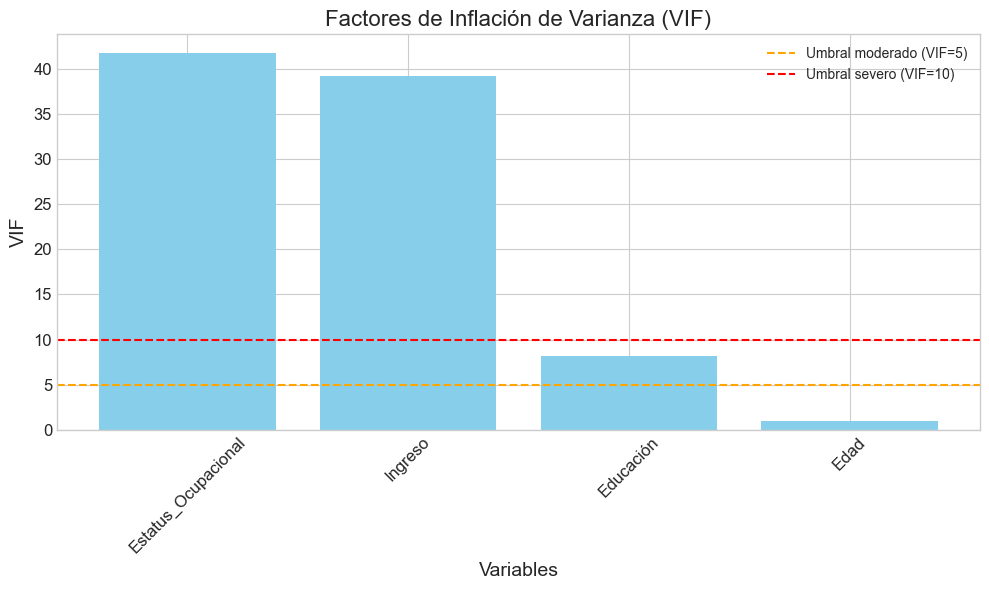

In [2]:
def calcular_vif(X, nombres_variables=None):
    """
    Calcula el Factor de Inflación de Varianza (VIF) para cada variable independiente.

    Parámetros:
    -----------
    X : numpy.ndarray o pandas.DataFrame
        Matriz de variables independientes (sin intercepto)
    nombres_variables : list, opcional
        Nombres de las variables. Si X es un DataFrame, se usan sus columnas.

    Retorna:
    --------
    pandas.DataFrame
        DataFrame con los valores VIF para cada variable
    """
    # Convertir a numpy array si es un DataFrame
    if isinstance(X, pd.DataFrame):
        if nombres_variables is None:
            nombres_variables = X.columns.tolist()
        X = X.values
    elif nombres_variables is None:
        nombres_variables = [f'X{i+1}' for i in range(X.shape[1])]

    # Número de variables
    n_vars = X.shape[1]

    # Inicializar vector de VIF
    vif_values = np.zeros(n_vars)

    # Calcular VIF para cada variable
    for i in range(n_vars):
        # Variables predictoras (todas excepto la i-ésima)
        X_predictores = np.delete(X, i, axis=1)

        # Variable objetivo (la i-ésima)
        y = X[:, i]

        # Añadir intercepto a las predictoras
        X_predictores = sm.add_constant(X_predictores)

        # Ajustar modelo de regresión
        try:
            modelo = sm.OLS(y, X_predictores).fit()

            # Calcular R² y VIF
            r_squared = modelo.rsquared
            vif_values[i] = 1.0 / (1.0 - r_squared)
        except:
            # En caso de error (p.ej., multicolinealidad perfecta)
            vif_values[i] = float('inf')

    # Crear DataFrame con resultados
    resultado = pd.DataFrame({
        'Variable': nombres_variables,
        'VIF': vif_values
    })

    # Ordenar por VIF en orden descendente
    resultado = resultado.sort_values('VIF', ascending=False).reset_index(drop=True)

    return resultado

# Ejemplo de uso
np.random.seed(42)

# Crear un conjunto de datos sintético con multicolinealidad moderada
n = 100  # número de observaciones
X1 = np.random.normal(0, 1, n)
X2 = np.random.normal(0, 1, n)
X3 = 0.7 * X1 + 0.3 * X2 + np.random.normal(0, 0.1, n)  # correlacionada con X1 y X2
X4 = np.random.normal(0, 1, n)  # independiente

# Crear matriz X
X = np.column_stack((X1, X2, X3, X4))
df = pd.DataFrame(X, columns=['Ingreso', 'Educación', 'Estatus_Ocupacional', 'Edad'])

# Calcular VIF
vif_resultado = calcular_vif(df)
print("Factores de Inflación de Varianza (VIF):")
print(vif_resultado)

# Visualización de VIF
plt.figure(figsize=(10, 6))
plt.bar(vif_resultado['Variable'], vif_resultado['VIF'], color='skyblue')
plt.axhline(y=5, color='orange', linestyle='--', label='Umbral moderado (VIF=5)')
plt.axhline(y=10, color='red', linestyle='--', label='Umbral severo (VIF=10)')
plt.title('Factores de Inflación de Varianza (VIF)')
plt.xlabel('Variables')
plt.ylabel('VIF')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Número de Condición basado en SVD

El número de condición es otra medida importante para diagnosticar la multicolinealidad, basada en la descomposición en valores singulares (SVD) de la matriz de variables independientes.

#### Definición matemática

Si $X$ es la matriz de variables independientes, su descomposición SVD es:

$$X = UDV^T$$

donde:
- $U$ es una matriz ortogonal $n \times n$
- $D$ es una matriz diagonal $n \times p$ con valores singulares
- $V$ es una matriz ortogonal $p \times p$

El número de condición se define como:

$$\kappa(X) = \frac{\sigma_{\max}}{\sigma_{\min}}$$

donde $\sigma_{\max}$ y $\sigma_{\min}$ son los valores singulares máximo y mínimo de $X$.

#### Interpretación

- $\kappa = 1$: No hay multicolinealidad
- $1 < \kappa < 10$: Multicolinealidad débil
- $10 \leq \kappa < 30$: Multicolinealidad moderada
- $30 \leq \kappa < 100$: Multicolinealidad moderada a fuerte
- $100 \leq \kappa < 1000$: Multicolinealidad fuerte
- $\kappa \geq 1000$: Multicolinealidad extrema

A continuación, implementaremos una función para calcular el número de condición y los índices de condición mediante SVD.

Número de condición: 13.14
Índices de condición y proporciones de varianza:
              Índice Condición  Intercepto   Ingreso  Educación  \
Componente 1          1.000000    0.000000  0.000000        1.0   
Componente 2          1.351226    0.448226  0.073915        0.0   
Componente 3          1.403297    0.012960  0.899403        0.0   
Componente 4          1.446782    0.482277  0.018786        0.0   
Componente 5         13.138054    0.056537  0.007896        0.0   

              Estatus_Ocupacional      Edad  
Componente 1             0.000000  0.000000  
Componente 2             0.034604  0.443255  
Componente 3             0.003682  0.083955  
Componente 4             0.026173  0.472764  
Componente 5             0.935541  0.000026  


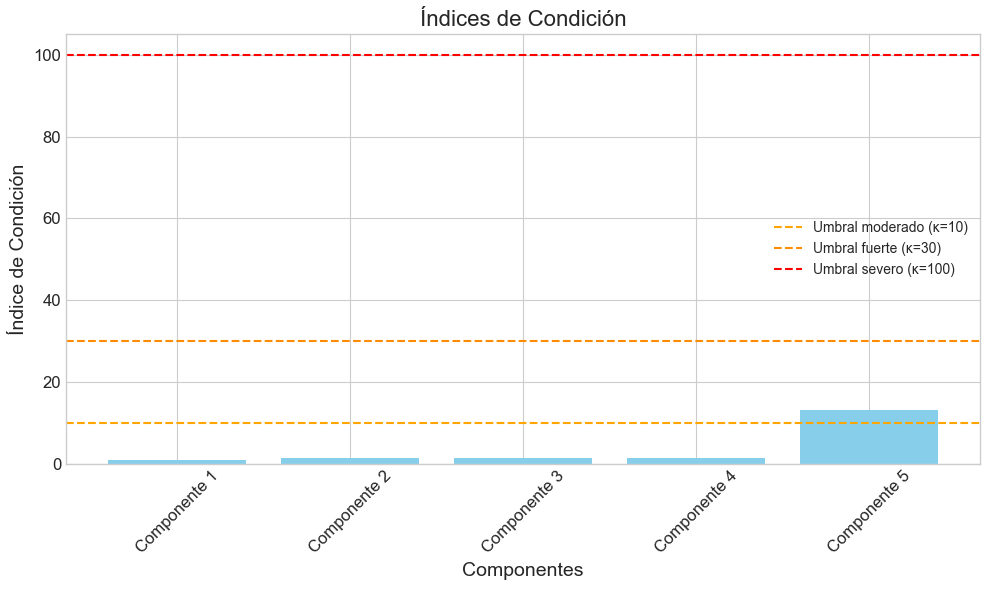

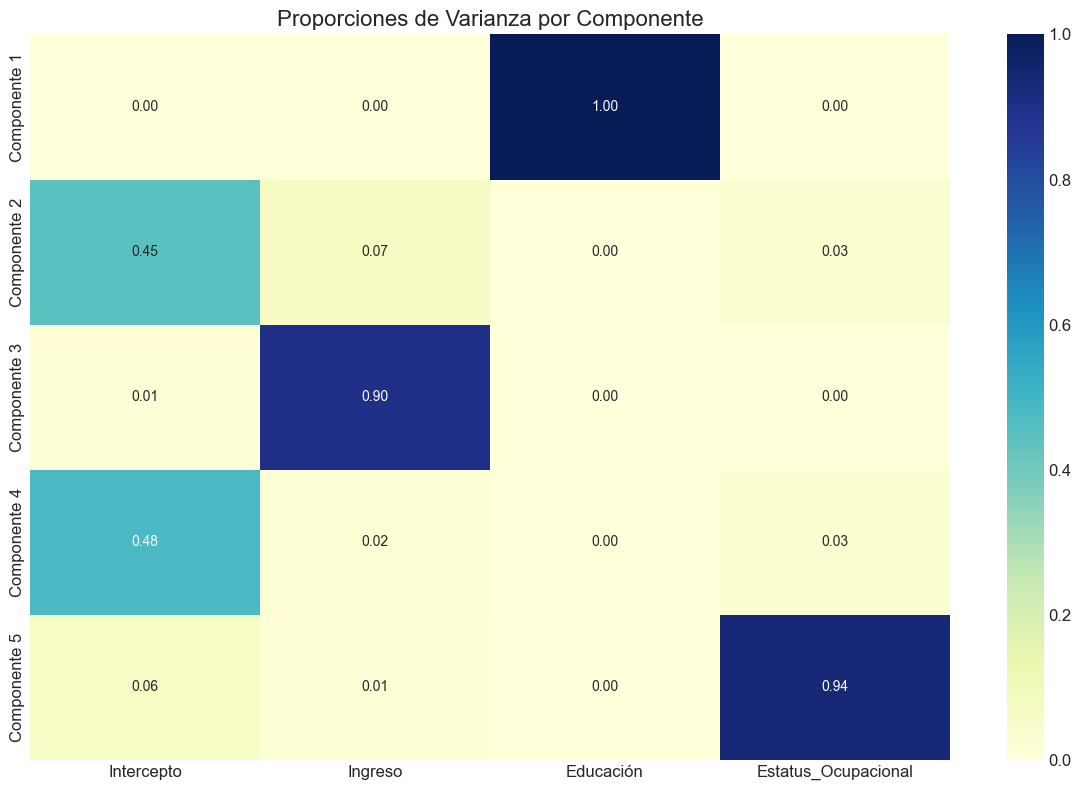

In [3]:
def calcular_indices_condicion(X, nombres_variables=None, estandarizar=True):
    """
    Calcula el número de condición e índices de condición basados en SVD para diagnóstico de multicolinealidad.

    Parámetros:
    -----------
    X : numpy.ndarray o pandas.DataFrame
        Matriz de variables independientes (sin intercepto)
    nombres_variables : list, opcional
        Nombres de las variables. Si X es un DataFrame, se usan sus columnas.
    estandarizar : bool, default=True
        Si es True, estandariza las variables antes del análisis

    Retorna:
    --------
    tuple
        (número de condición, DataFrame con índices de condición y proporciones de varianza)
    """
    # Convertir a numpy array si es un DataFrame
    if isinstance(X, pd.DataFrame):
        if nombres_variables is None:
            nombres_variables = X.columns.tolist()
        X = X.values
    elif nombres_variables is None:
        nombres_variables = [f'X{i+1}' for i in range(X.shape[1])]

    # Estandarizar si se especifica
    if estandarizar:
        scaler = StandardScaler()
        X = scaler.fit_transform(X)

    # Añadir una columna de unos para el intercepto
    X_con_intercepto = sm.add_constant(X)

    # Realizar la descomposición SVD
    U, s, Vt = np.linalg.svd(X_con_intercepto, full_matrices=False)

    # Calcular el número de condición
    numero_condicion = s[0] / s[-1]

    # Calcular los índices de condición
    indices_condicion = s[0] / s

    # Calcular las proporciones de varianza
    V = Vt.T  # Convertir Vt a V (transpuesta)
    V_squared = V ** 2

    # Normalizar para obtener proporciones
    proporciones_varianza = V_squared / np.sum(V_squared, axis=0)

    # Crear DataFrame con resultados
    nombres_completos = ['Intercepto'] + nombres_variables
    resultado = pd.DataFrame(proporciones_varianza, 
                            columns=nombres_completos, 
                            index=[f'Componente {i+1}' for i in range(len(s))])

    # Añadir índices de condición como columna
    resultado['Índice Condición'] = indices_condicion

    # Reordenar columnas para tener el índice de condición primero
    columnas = ['Índice Condición'] + nombres_completos
    resultado = resultado[columnas]

    return numero_condicion, resultado

# Ejemplo de uso con el mismo conjunto de datos
numero_condicion, tabla_indices = calcular_indices_condicion(df)

print(f"Número de condición: {numero_condicion:.2f}")
print("Índices de condición y proporciones de varianza:")
print(tabla_indices)

# Visualización de índices de condición
plt.figure(figsize=(10, 6))
plt.bar(tabla_indices.index, tabla_indices['Índice Condición'], color='skyblue')
plt.axhline(y=10, color='orange', linestyle='--', label='Umbral moderado (κ=10)')
plt.axhline(y=30, color='darkorange', linestyle='--', label='Umbral fuerte (κ=30)')
plt.axhline(y=100, color='red', linestyle='--', label='Umbral severo (κ=100)')
plt.title('Índices de Condición')
plt.xlabel('Componentes')
plt.ylabel('Índice de Condición')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Mapa de calor para proporciones de varianza
plt.figure(figsize=(12, 8))
sns.heatmap(tabla_indices.iloc[:, 1:-1], annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Proporciones de Varianza por Componente')
plt.tight_layout()
plt.show()

### Análisis y Visualización de Correlaciones

Aunque las correlaciones bivariadas no capturan completamente la multicolinealidad, especialmente la multivariada, proporcionan una primera aproximación útil para identificar posibles problemas. A continuación, implementaremos visualizaciones mejoradas de matrices de correlación.

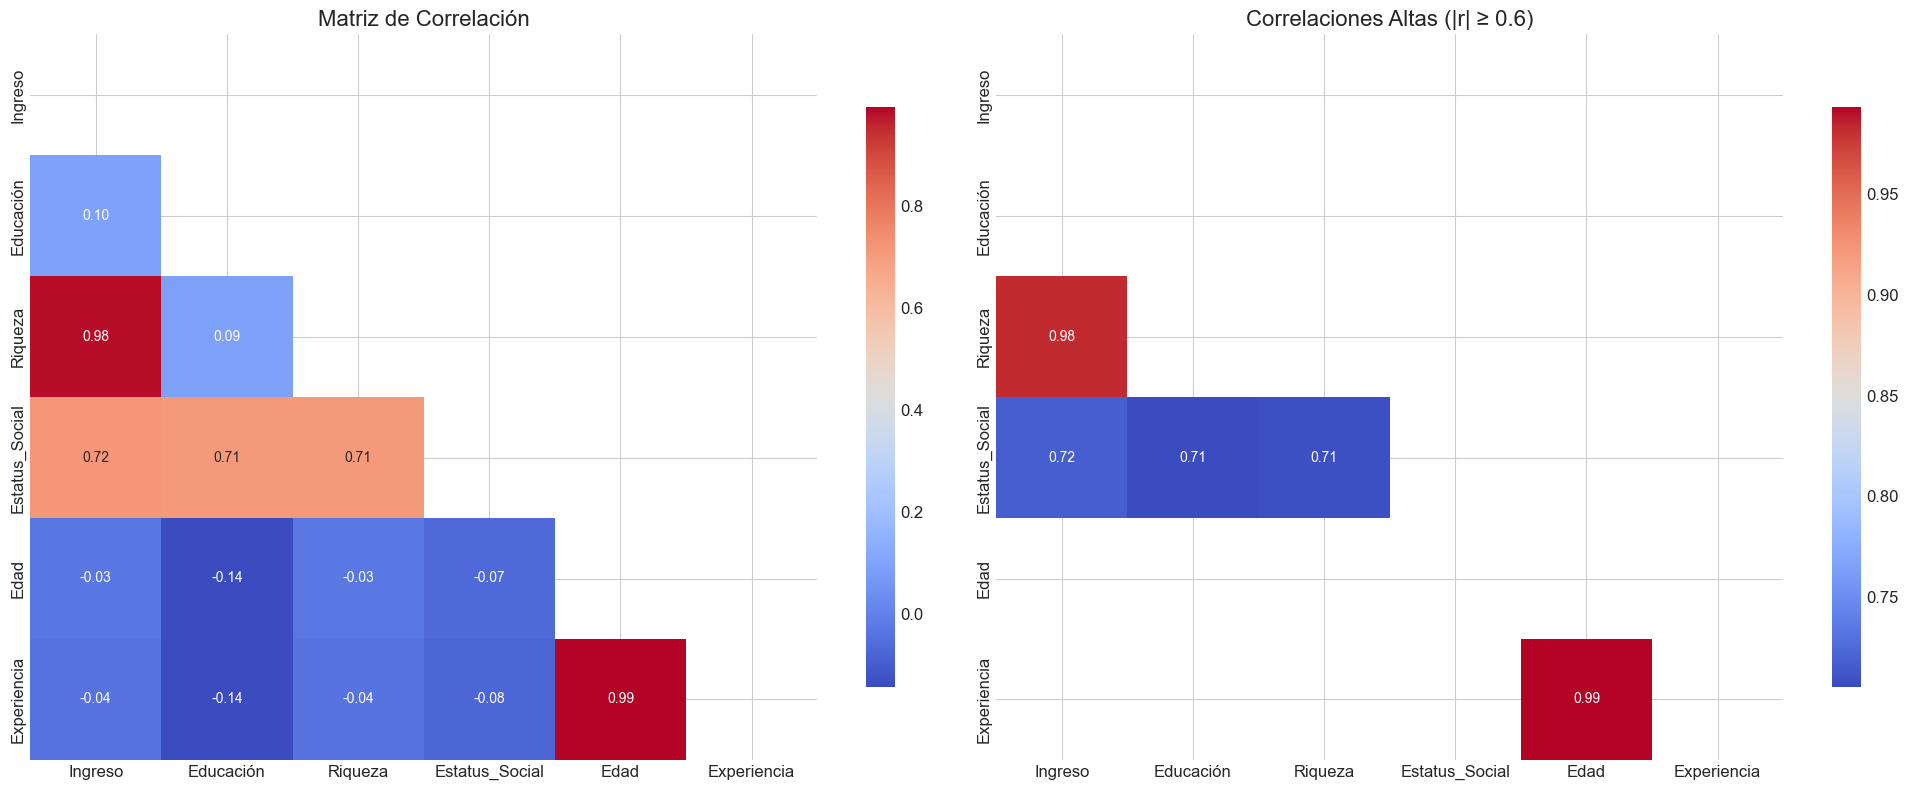

Pares de variables con alta correlación:
Riqueza - Ingreso: 0.982
Estatus_Social - Ingreso: 0.717
Estatus_Social - Educación: 0.705
Estatus_Social - Riqueza: 0.708
Experiencia - Edad: 0.993


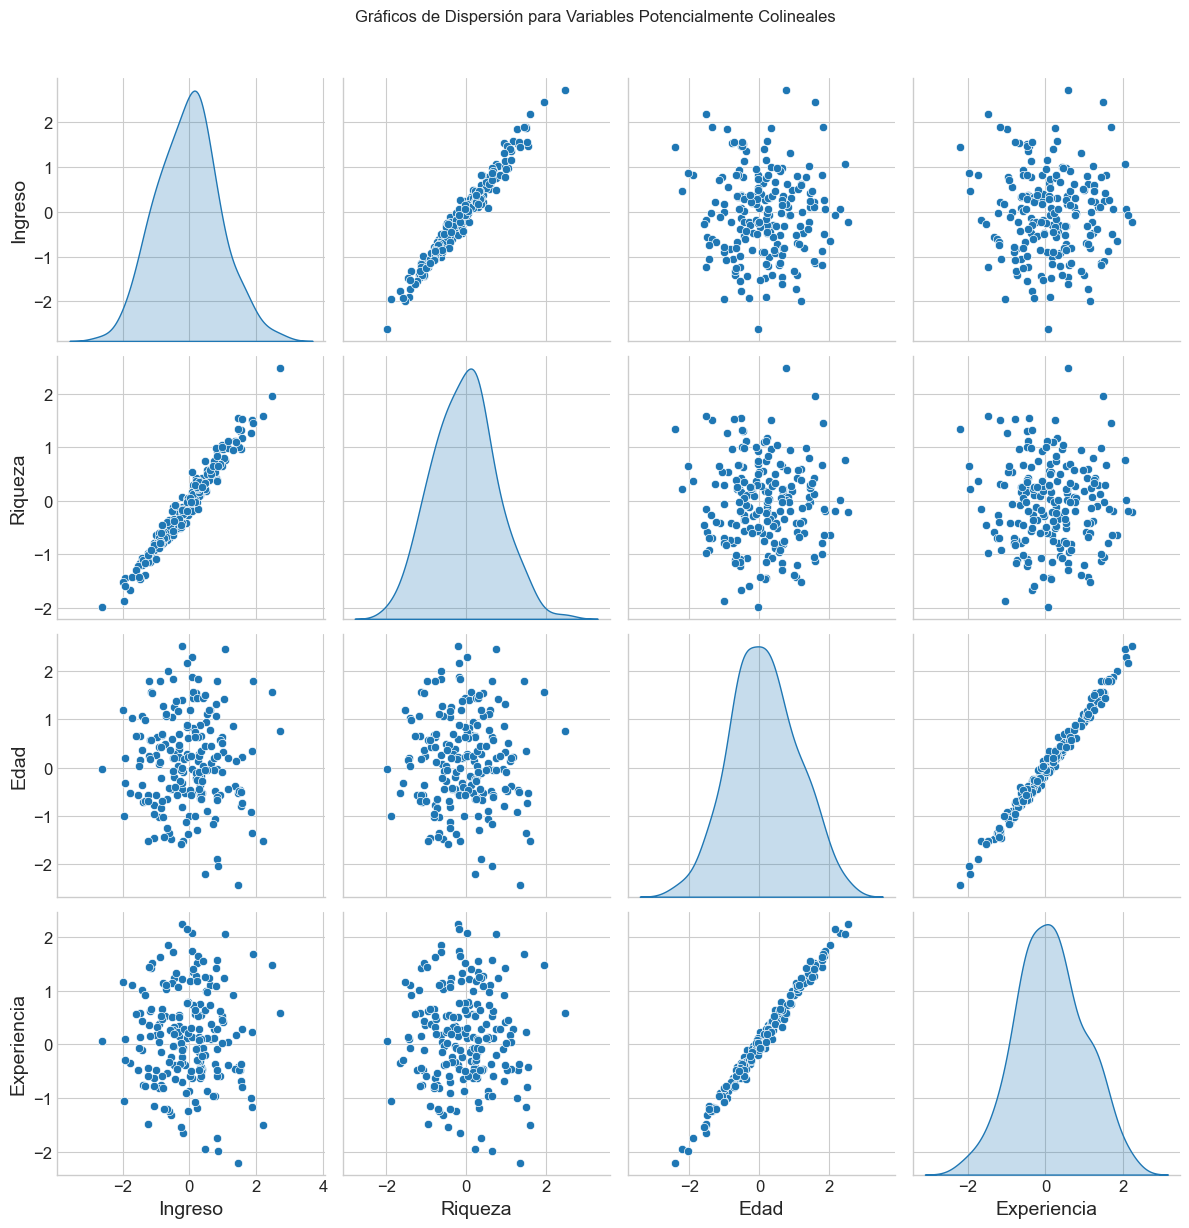

In [4]:
def visualizar_correlaciones(X, umbral=0.7, metodo='pearson'):
    """
    Crea visualizaciones mejoradas de la matriz de correlación para identificar multicolinealidad.

    Parámetros:
    -----------
    X : pandas.DataFrame
        DataFrame con las variables a analizar
    umbral : float, default=0.7
        Umbral para destacar correlaciones altas
    metodo : str, default='pearson'
        Método de correlación ('pearson', 'spearman', o 'kendall')

    Retorna:
    --------
    pandas.DataFrame
        Matriz de correlación
    """
    # Calcular matriz de correlación
    corr = X.corr(method=metodo)

    # Crear máscara para el triángulo superior
    mascara = np.triu(np.ones_like(corr, dtype=bool))

    # Crear figura con dos subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    # 1. Mapa de calor estándar
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', 
                mask=mascara, ax=ax1, cbar_kws={"shrink": .8})
    ax1.set_title('Matriz de Correlación', fontsize=16)

    # 2. Mapa de calor con umbral
    # Crear máscara para correlaciones bajas
    mascara_umbral = (np.abs(corr) < umbral) | mascara

    # Mapa de calor con umbral
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', 
                mask=mascara_umbral, ax=ax2, cbar_kws={"shrink": .8})
    ax2.set_title(f'Correlaciones Altas (|r| ≥ {umbral})', fontsize=16)

    plt.tight_layout()
    plt.show()

    # Identificar pares de variables con alta correlación
    pares_alta_corr = []
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i, j]) >= umbral:
                pares_alta_corr.append((corr.columns[i], corr.columns[j], corr.iloc[i, j]))

    # Mostrar pares con alta correlación
    if pares_alta_corr:
        print("Pares de variables con alta correlación:")
        for var1, var2, corr_val in pares_alta_corr:
            print(f"{var1} - {var2}: {corr_val:.3f}")
    else:
        print(f"No se encontraron pares de variables con correlación ≥ {umbral}")

    return corr

# Ejemplo de uso con datos simulados más complejos
np.random.seed(42)

# Crear variables con diferentes patrones de correlación
n = 200
X1 = np.random.normal(0, 1, n)
X2 = np.random.normal(0, 1, n)
X3 = 0.85 * X1 + 0.15 * np.random.normal(0, 1, n)  # Alta correlación con X1
X4 = 0.5 * X1 + 0.5 * X2 + 0.2 * np.random.normal(0, 1, n)  # Correlación moderada con X1 y X2
X5 = np.random.normal(0, 1, n)  # Independiente
X6 = 0.9 * X5 + 0.1 * np.random.normal(0, 1, n)  # Alta correlación con X5

# Crear DataFrame
df_complex = pd.DataFrame({
    'Ingreso': X1,
    'Educación': X2,
    'Riqueza': X3,
    'Estatus_Social': X4,
    'Edad': X5,
    'Experiencia': X6
})

# Visualizar correlaciones
matriz_corr = visualizar_correlaciones(df_complex, umbral=0.6)

# Visualización adicional: Pares de dispersión para variables altamente correlacionadas
sns.pairplot(df_complex, vars=['Ingreso', 'Riqueza', 'Edad', 'Experiencia'], 
             diag_kind='kde', height=3)
plt.suptitle('Gráficos de Dispersión para Variables Potencialmente Colineales', y=1.02)
plt.tight_layout()
plt.show()

### Análisis mediante SVD

La Descomposición en Valores Singulares (SVD) es una herramienta poderosa para analizar la estructura de multicolinealidad en los datos. A continuación, implementaremos una función para realizar este análisis y visualizar los resultados.

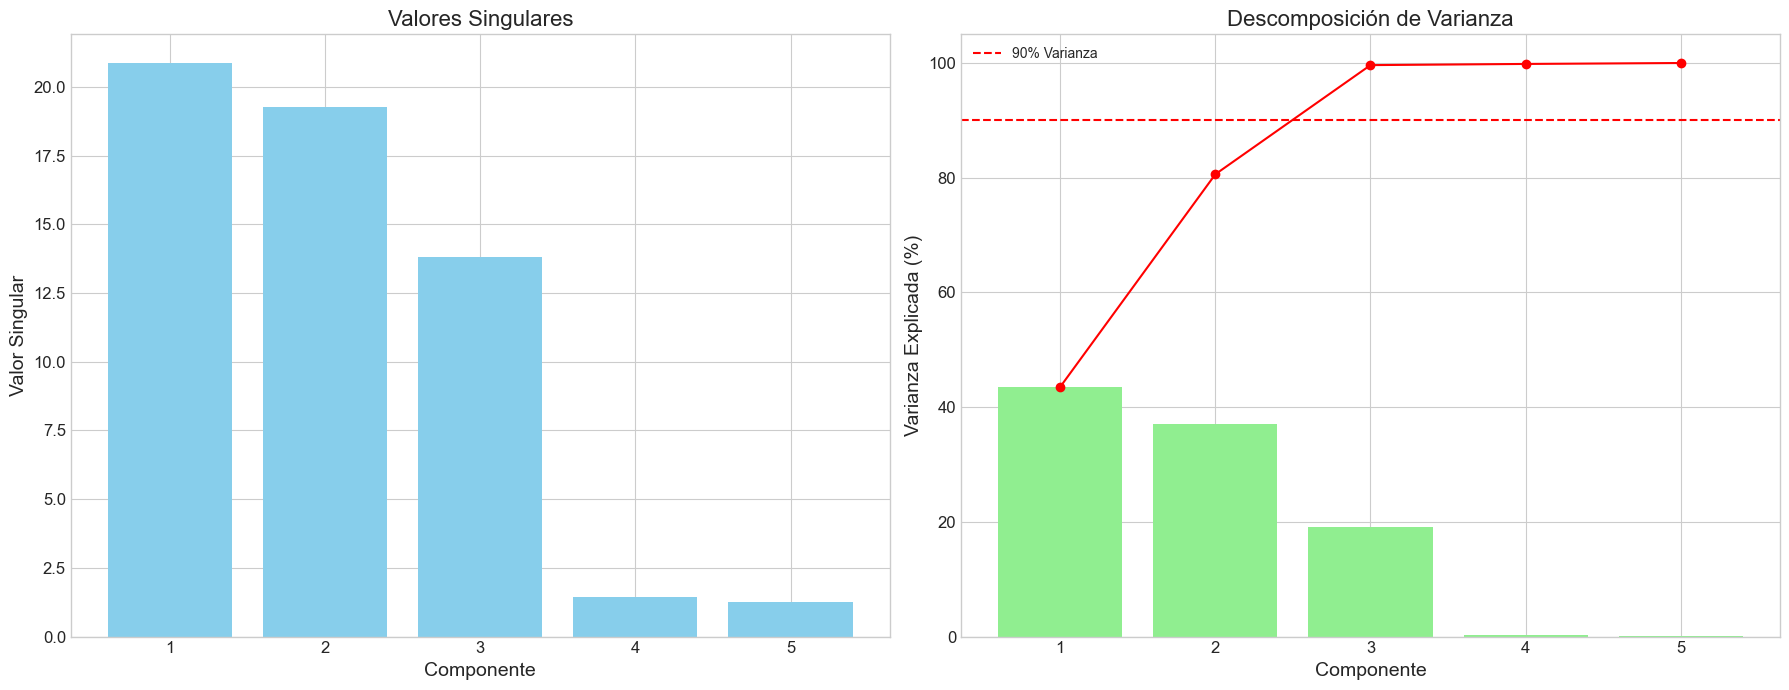

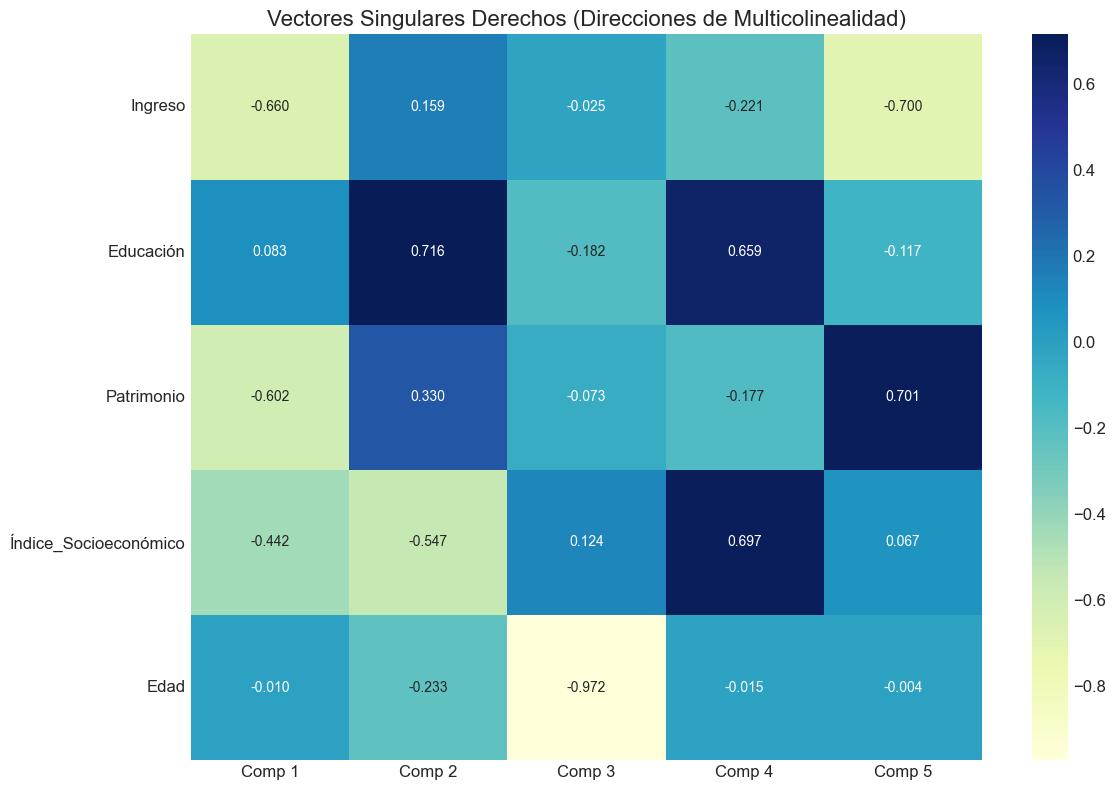

Número de condición: 16.36
Componentes que indican multicolinealidad:
Componente 4 (Valor singular: 1.4298, 0.0685 del máximo):
  Índice_Socioeconómico: 0.697
  Educación: 0.659
  Ingreso: -0.221
  Relación lineal aproximada: -0.221 × Ingreso + 0.659 × Educación + 0.697 × Índice_Socioeconómico ≈ 0
Componente 5 (Valor singular: 1.2758, 0.0611 del máximo):
  Patrimonio: 0.701
  Ingreso: -0.700
  Relación lineal aproximada: -0.700 × Ingreso + 0.701 × Patrimonio ≈ 0
Valores Singulares y Descomposición de Varianza:
   Índice  Valor Singular  Valor Singular Normalizado  Varianza Explicada (%)  \
0       1       20.866629                    1.000000               43.541621   
1       2       19.252550                    0.922648               37.066068   
2       3       13.793156                    0.661015               19.025114   
3       4        1.429824                    0.068522                0.204440   
4       5        1.275765                    0.061139                0.162758  

In [5]:
def analizar_svd(X, nombres_variables=None, estandarizar=True):
    """
    Realiza un análisis detallado mediante SVD para diagnosticar multicolinealidad.

    Parámetros:
    -----------
    X : numpy.ndarray o pandas.DataFrame
        Matriz de variables independientes (sin intercepto)
    nombres_variables : list, opcional
        Nombres de las variables. Si X es un DataFrame, se usan sus columnas.
    estandarizar : bool, default=True
        Si es True, estandariza las variables antes del análisis

    Retorna:
    --------
    tuple
        (valores singulares, vectores singulares izquierdos, vectores singulares derechos)
    """
    # Convertir a numpy array si es un DataFrame
    if isinstance(X, pd.DataFrame):
        if nombres_variables is None:
            nombres_variables = X.columns.tolist()
        X = X.values
    elif nombres_variables is None:
        nombres_variables = [f'X{i+1}' for i in range(X.shape[1])]

    # Estandarizar si se especifica
    if estandarizar:
        scaler = StandardScaler()
        X = scaler.fit_transform(X)

    # Realizar la descomposición SVD
    U, s, Vt = np.linalg.svd(X, full_matrices=False)
    V = Vt.T  # Convertir Vt a V (transpuesta)

    # Número de variables
    p = X.shape[1]

    # Calcular el número de condición
    numero_condicion = s[0] / s[-1]

    # Crear DataFrame con valores singulares
    df_valores_singulares = pd.DataFrame({
        'Índice': range(1, len(s) + 1),
        'Valor Singular': s,
        'Valor Singular Normalizado': s / s[0],
        'Varianza Explicada (%)': (s**2 / sum(s**2)) * 100,
        'Varianza Acumulada (%)': np.cumsum((s**2 / sum(s**2)) * 100)
    })

    # Crear DataFrame con vectores singulares derechos (direcciones de multicolinealidad)
    df_vectores_derechos = pd.DataFrame(V, columns=[f'Componente {i+1}' for i in range(p)])
    df_vectores_derechos['Variable'] = nombres_variables

    # Visualizaciones
    # 1. Valores singulares y descomposición de varianza
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

    # Valores singulares
    ax1.bar(range(1, len(s) + 1), s, color='skyblue')
    ax1.set_title('Valores Singulares', fontsize=16)
    ax1.set_xlabel('Componente')
    ax1.set_ylabel('Valor Singular')
    ax1.set_xticks(range(1, len(s) + 1))

    # Descomposición de varianza
    ax2.bar(range(1, len(s) + 1), (s**2 / sum(s**2)) * 100, color='lightgreen')
    ax2.plot(range(1, len(s) + 1), np.cumsum((s**2 / sum(s**2)) * 100), 'ro-')
    ax2.set_title('Descomposición de Varianza', fontsize=16)
    ax2.set_xlabel('Componente')
    ax2.set_ylabel('Varianza Explicada (%)')
    ax2.set_xticks(range(1, len(s) + 1))
    ax2.axhline(y=90, color='red', linestyle='--', label='90% Varianza')
    ax2.legend()

    plt.tight_layout()
    plt.show()

    # 2. Mapa de calor para vectores singulares derechos
    plt.figure(figsize=(12, 8))
    sns.heatmap(V, annot=True, fmt='.3f', cmap='YlGnBu',
                xticklabels=[f'Comp {i+1}' for i in range(p)],
                yticklabels=nombres_variables)
    plt.title('Vectores Singulares Derechos (Direcciones de Multicolinealidad)', fontsize=16)
    plt.tight_layout()
    plt.show()

    # Identificar direcciones de multicolinealidad (componentes con valores singulares pequeños)
    if len(s) > 1:
        print(f"Número de condición: {numero_condicion:.2f}")

        # Identificar componentes problemáticos
        componentes_problematicos = np.where(s / s[0] < 0.1)[0]
        if len(componentes_problematicos) > 0:
            print("Componentes que indican multicolinealidad:")
            for comp in componentes_problematicos:
                print(f"Componente {comp+1} (Valor singular: {s[comp]:.4f}, {s[comp]/s[0]:.4f} del máximo):")
                # Ordenar variables por magnitud absoluta de su contribución
                contribuciones = [(abs(V[i, comp]), nombres_variables[i], V[i, comp]) for i in range(p)]
                contribuciones.sort(reverse=True)

                for abs_contrib, var, contrib in contribuciones:
                    if abs_contrib > 0.2:  # Mostrar solo contribuciones significativas
                        print(f"  {var}: {contrib:.3f}")

                # Interpretar la relación lineal aproximada
                coefs = V[:, comp]
                formula = " + ".join([f"{coefs[i]:.3f} × {nombres_variables[i]}" for i in range(p) if abs(coefs[i]) > 0.2])
                print(f"  Relación lineal aproximada: {formula} ≈ 0")
        else:
            print("No se detectaron componentes que indiquen multicolinealidad severa.")

    return s, U, V, df_valores_singulares, df_vectores_derechos

# Ejemplo de uso con datos simulados
np.random.seed(42)

# Crear variables con multicolinealidad controlada
n = 200
X1 = np.random.normal(0, 1, n)
X2 = np.random.normal(0, 1, n)
X3 = 0.8 * X1 + 0.2 * X2 + 0.1 * np.random.normal(0, 1, n)  # Combinación lineal de X1 y X2
X4 = 0.4 * X1 - 0.6 * X2 + 0.1 * np.random.normal(0, 1, n)  # Otra combinación lineal
X5 = np.random.normal(0, 1, n)  # Independiente

# Crear DataFrame
df_svd = pd.DataFrame({
    'Ingreso': X1,
    'Educación': X2,
    'Patrimonio': X3,
    'Índice_Socioeconómico': X4,
    'Edad': X5
})

# Realizar análisis SVD
s, U, V, df_valores, df_vectores = analizar_svd(df_svd)

# Mostrar resultados detallados
print("Valores Singulares y Descomposición de Varianza:")
print(df_valores)

print("Vectores Singulares Derechos (contribución de variables a componentes):")
print(df_vectores)

### Visualización del Impacto en Coeficientes

Una de las consecuencias más importantes de la multicolinealidad es la inestabilidad de los coeficientes estimados. A continuación, implementaremos simulaciones para visualizar este impacto.

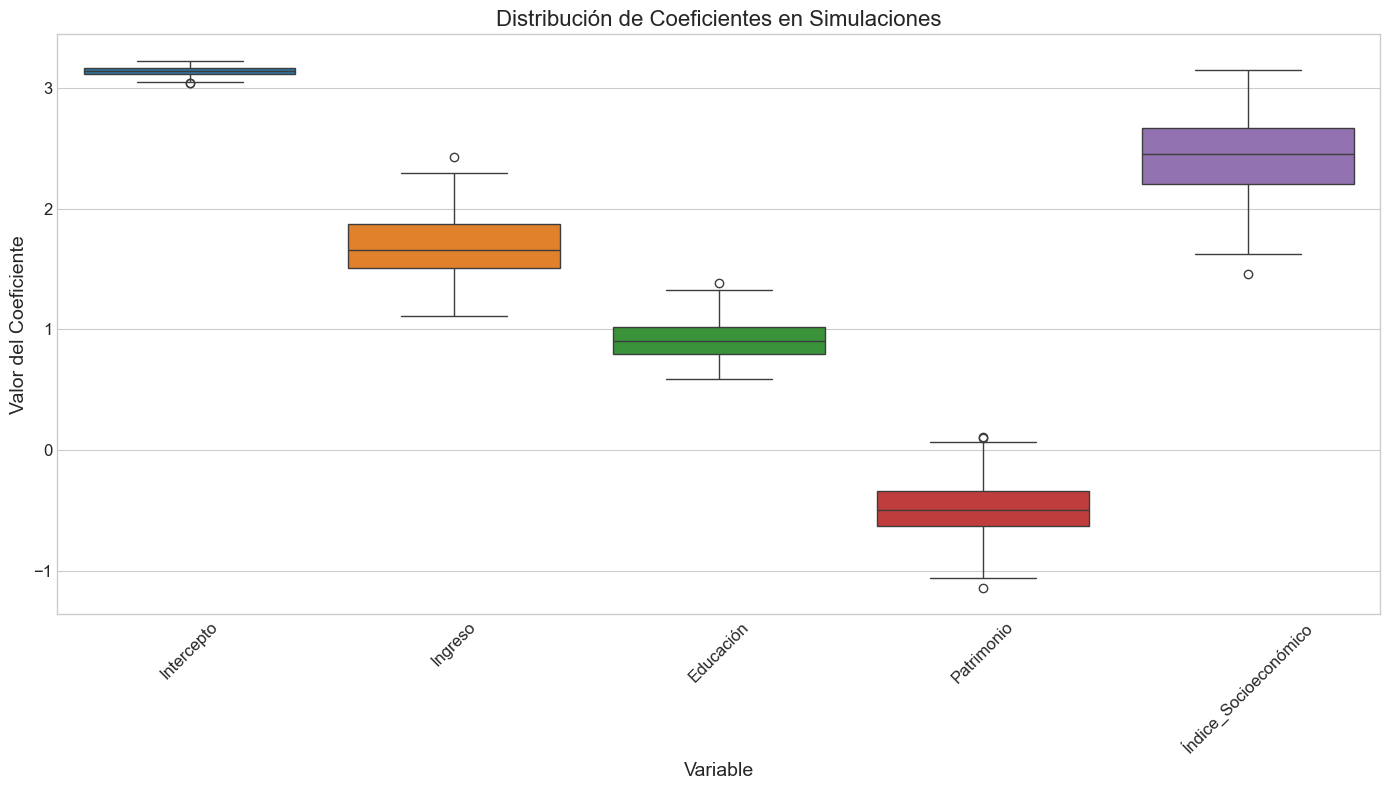

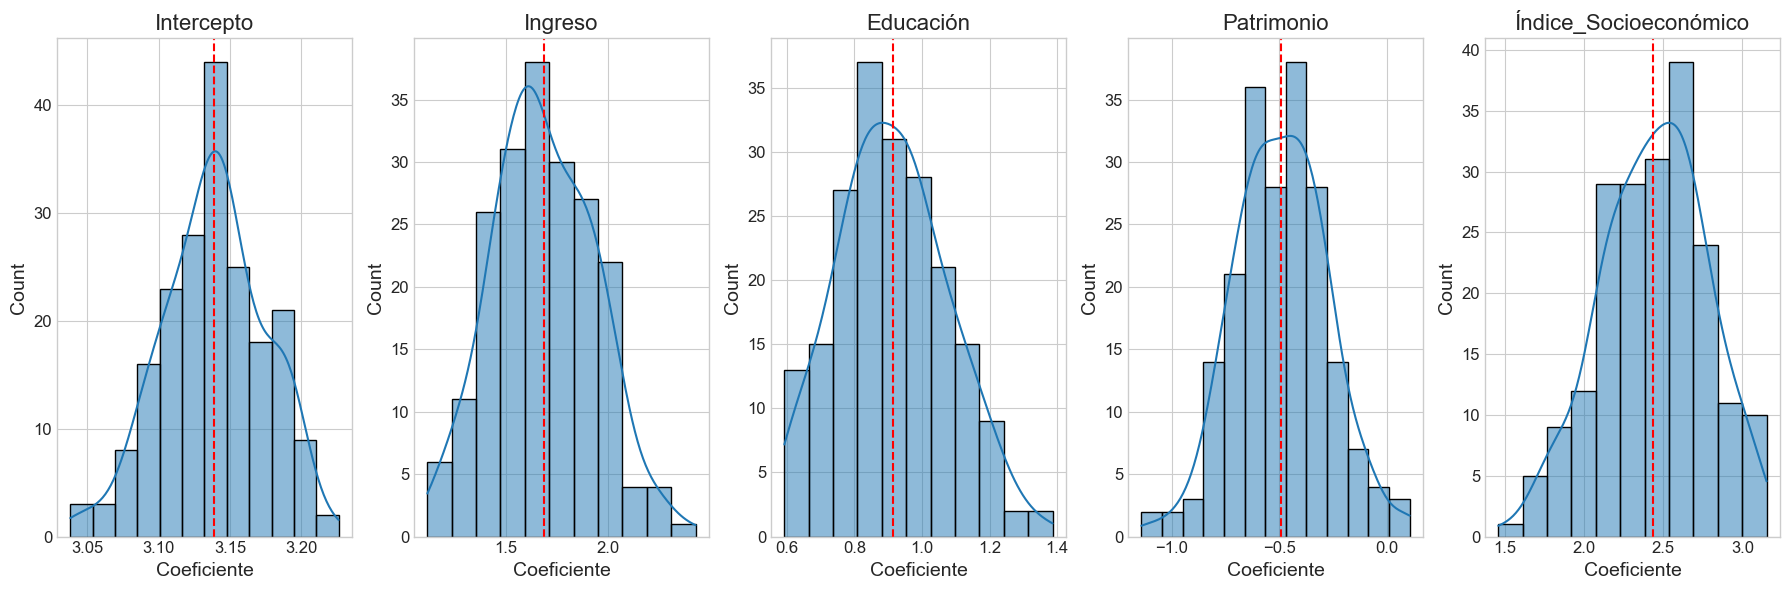

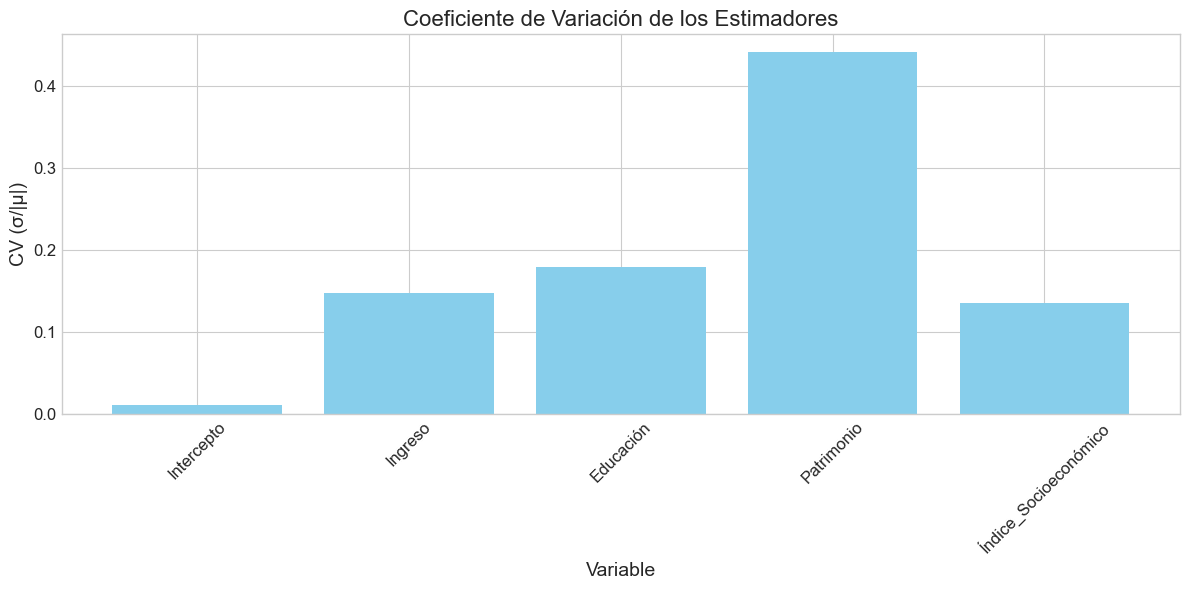

Estadísticas de los coeficientes estimados:
                           mean       std       min       max        CV
Intercepto             3.138674  0.035872  3.038241  3.226128  0.011429
Ingreso                1.687394  0.249738  1.114243  2.431836  0.148002
Educación              0.913063  0.164174  0.592517  1.386474  0.179806
Patrimonio            -0.489374  0.215479 -1.140877  0.107374  0.440316
Índice_Socioeconómico  2.438204  0.331364  1.459694  3.152071  0.135905
Modelo con todos los datos:
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.1359      0.067     46.559      0.000       3.003       3.269
Ingreso                   1.7121      0.483      3.547      0.000       0.760       2.664
Educación                 0.9282      0.332      2.792      0.006       0.273       1.584
Patrimonio               -0.4948      0.456   

In [6]:
def simular_inestabilidad_coeficientes(X, y, n_simulaciones=100, porcentaje_datos=0.8):
    """
    Simula la inestabilidad de coeficientes causada por multicolinealidad mediante remuestreo.

    Parámetros:
    -----------
    X : pandas.DataFrame
        DataFrame con variables independientes
    y : numpy.ndarray o pandas.Series
        Variable dependiente
    n_simulaciones : int, default=100
        Número de simulaciones a realizar
    porcentaje_datos : float, default=0.8
        Fracción de datos a usar en cada simulación

    Retorna:
    --------
    pandas.DataFrame
        DataFrame con los coeficientes estimados en cada simulación
    """
    # Convertir a arrays si son DataFrames/Series
    if isinstance(X, pd.DataFrame):
        nombres_variables = X.columns.tolist()
        X = X.values
    else:
        nombres_variables = [f'X{i+1}' for i in range(X.shape[1])]

    if isinstance(y, pd.Series):
        y = y.values

    # Número de observaciones a seleccionar en cada simulación
    n_observaciones = int(porcentaje_datos * X.shape[0])

    # Inicializar matriz para almacenar coeficientes
    coeficientes = np.zeros((n_simulaciones, X.shape[1] + 1))  # +1 para el intercepto

    # Realizar simulaciones
    for i in range(n_simulaciones):
        # Seleccionar subconjunto aleatorio de observaciones
        indices = np.random.choice(X.shape[0], n_observaciones, replace=False)
        X_subset = X[indices]
        y_subset = y[indices]

        # Ajustar modelo
        X_subset_con_intercepto = sm.add_constant(X_subset)
        modelo = sm.OLS(y_subset, X_subset_con_intercepto).fit()

        # Almacenar coeficientes
        coeficientes[i] = modelo.params

    # Crear DataFrame con resultados
    nombres_completos = ['Intercepto'] + nombres_variables
    df_coeficientes = pd.DataFrame(coeficientes, columns=nombres_completos)

    # Calcular estadísticas descriptivas
    estadisticas = df_coeficientes.describe().T
    estadisticas['CV'] = estadisticas['std'] / abs(estadisticas['mean'])  # Coeficiente de variación

    # Visualizaciones
    # 1. Boxplots de coeficientes
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df_coeficientes)
    plt.title('Distribución de Coeficientes en Simulaciones', fontsize=16)
    plt.xlabel('Variable')
    plt.ylabel('Valor del Coeficiente')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 2. Histogramas para cada coeficiente
    fig, axes = plt.subplots(1, len(nombres_completos), figsize=(18, 6))
    for i, nombre in enumerate(nombres_completos):
        sns.histplot(df_coeficientes[nombre], kde=True, ax=axes[i])
        axes[i].set_title(nombre)
        axes[i].set_xlabel('Coeficiente')
        # Añadir línea vertical para la media
        axes[i].axvline(df_coeficientes[nombre].mean(), color='red', linestyle='--')
    plt.tight_layout()
    plt.show()

    # 3. Gráfico de variabilidad (coeficiente de variación)
    plt.figure(figsize=(12, 6))
    barras = plt.bar(estadisticas.index, estadisticas['CV'], color='skyblue')
    plt.title('Coeficiente de Variación de los Estimadores', fontsize=16)
    plt.xlabel('Variable')
    plt.ylabel('CV (σ/|μ|)')
    plt.xticks(rotation=45)

    # Colorear barras según nivel de variabilidad
    for i, bar in enumerate(barras):
        if estadisticas['CV'].iloc[i] > 1.0:
            bar.set_color('red')
        elif estadisticas['CV'].iloc[i] > 0.5:
            bar.set_color('orange')

    plt.tight_layout()
    plt.show()

    print("Estadísticas de los coeficientes estimados:")
    print(estadisticas[['mean', 'std', 'min', 'max', 'CV']])

    return df_coeficientes, estadisticas

# Ejemplo de uso
np.random.seed(42)

# Generar datos con multicolinealidad para la simulación
n = 200
X1 = np.random.normal(0, 1, n)
X2 = np.random.normal(0, 1, n)
X3 = 0.85 * X1 + 0.15 * np.random.normal(0, 1, n)  # Alta correlación con X1
X4 = 0.5 * X1 + 0.5 * X2 + 0.1 * np.random.normal(0, 1, n)  # Correlación con X1 y X2

# Crear verdaderos coeficientes y generar y
beta_true = np.array([2.5, 1.8, -0.5, 0.9])
y = 3.0 + beta_true[0] * X1 + beta_true[1] * X2 + beta_true[2] * X3 + beta_true[3] * X4 + np.random.normal(0, 1, n)

# Crear DataFrame
X_sim = pd.DataFrame({
    'Ingreso': X1,
    'Educación': X2,
    'Patrimonio': X3,
    'Índice_Socioeconómico': X4
})

# Simular inestabilidad de coeficientes
coefs, stats = simular_inestabilidad_coeficientes(X_sim, y, n_simulaciones=200)

# Ajustar modelo con todos los datos para comparar
X_completo = sm.add_constant(X_sim)
modelo_completo = sm.OLS(y, X_completo).fit()
print("Modelo con todos los datos:")
print(modelo_completo.summary().tables[1])

## Enlace con la Siguiente Sección

En esta sección hemos implementado y analizado las principales métricas y técnicas para diagnosticar la multicolinealidad:

1. **Factor de Inflación de Varianza (VIF)**: Cuantifica cuánto se infla la varianza de un coeficiente debido a su correlación con otras variables.

2. **Número de Condición e Índices**: Basados en la descomposición SVD, proporcionan una medida general de la severidad de la multicolinealidad y ayudan a identificar las variables involucradas.

3. **Análisis de Correlaciones**: Aunque limitado a relaciones bivariadas, ofrece una primera aproximación para identificar posibles problemas.

4. **Análisis mediante SVD**: Permite identificar las combinaciones lineales específicas de variables que causan multicolinealidad y cuantificar su impacto.

5. **Simulación de Inestabilidad**: Demuestra visualmente cómo la multicolinealidad afecta la estabilidad de los coeficientes estimados.

En la siguiente sección, desarrollaremos funciones para generar datos con diferentes niveles de multicolinealidad controlada, lo que nos permitirá estudiar su impacto de manera sistemática.

## Sección 3: Generación de Datos con Multicolinealidad Controlada

En esta sección desarrollaremos funciones para generar conjuntos de datos sintéticos con diferentes niveles y tipos de multicolinealidad. Esto nos permitirá:

1. Estudiar sistemáticamente el impacto de la multicolinealidad en los modelos
2. Probar la efectividad de diferentes métodos de diagnóstico
3. Crear ejemplos ilustrativos para fines pedagógicos
4. Proporcionar datos para los ejercicios prácticos

A continuación, implementaremos una función principal que permite generar datos con multicolinealidad controlada.

=== MULTICOLINEALIDAD MODERADA ===
Conjunto de datos generado con multicolinealidad moderada
Número de observaciones: 200
Número de condición: 2.72
Factores de Inflación de Varianza (VIF):
              Variable       VIF
0  Estatus_Ocupacional  2.080070
1              Ingreso  2.075870
2           Patrimonio  1.978279
3            Educación  1.835979
4                 Edad  1.032297


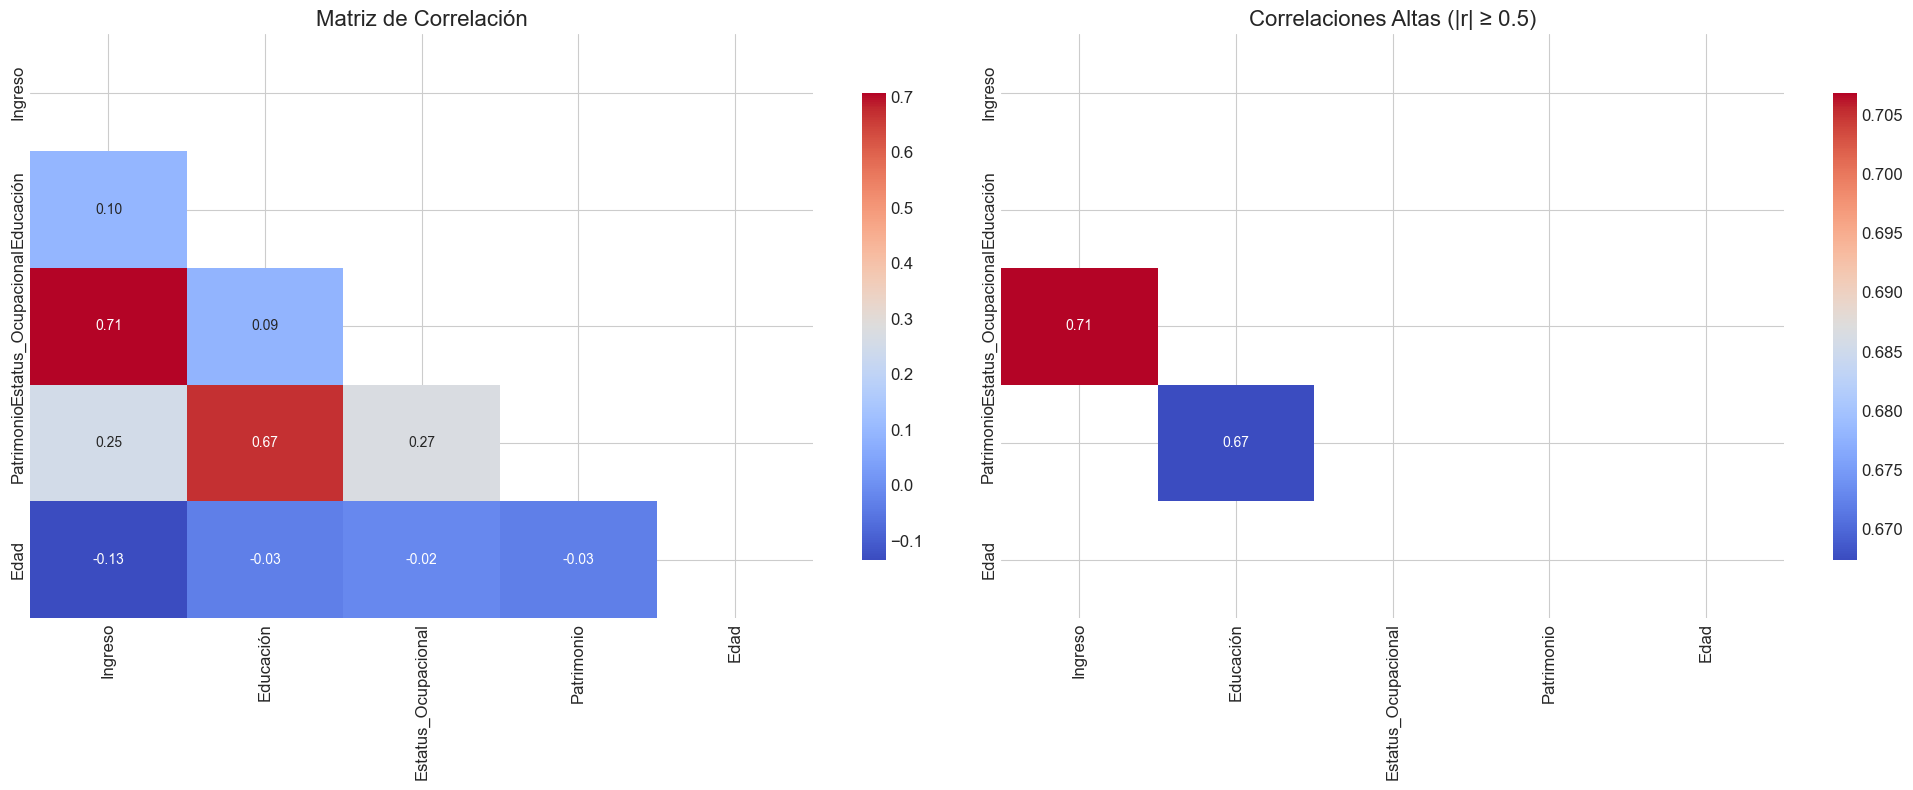

Pares de variables con alta correlación:
Estatus_Ocupacional - Ingreso: 0.707
Patrimonio - Educación: 0.667
Resumen del modelo con multicolinealidad moderada:
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.1099      0.074     41.833      0.000       2.963       3.256
Ingreso                 2.3642      0.113     20.915      0.000       2.141       2.587
Educación               1.6682      0.100     16.636      0.000       1.470       1.866
Estatus_Ocupacional    -0.5036      0.105     -4.787      0.000      -0.711      -0.296
Patrimonio              1.0628      0.112      9.510      0.000       0.842       1.283
Edad                    1.1250      0.075     15.068      0.000       0.978       1.272
=== MULTICOLINEALIDAD ALTA ===
Conjunto de datos generado con multicolinealidad alta
Número de observaciones: 200
Número de condición: 42

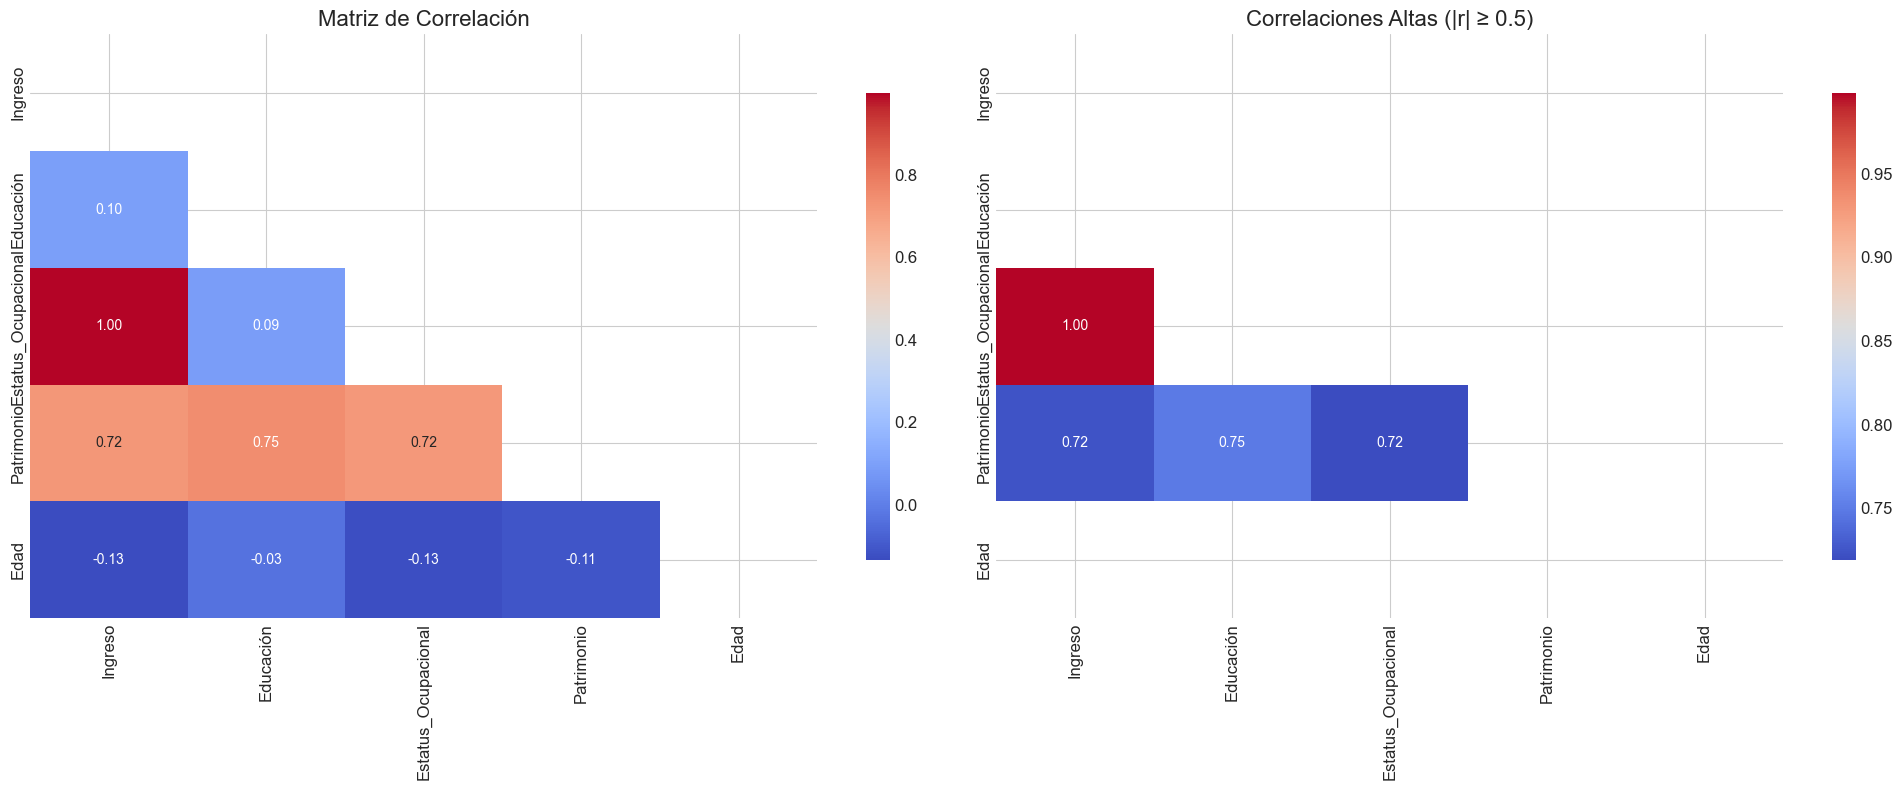

Pares de variables con alta correlación:
Estatus_Ocupacional - Ingreso: 0.998
Patrimonio - Ingreso: 0.724
Patrimonio - Educación: 0.749
Patrimonio - Estatus_Ocupacional: 0.719
Resumen del modelo con multicolinealidad alta:
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.1099      0.074     41.833      0.000       2.963       3.256
Ingreso                 1.1443      1.427      0.802      0.424      -1.671       3.960
Educación               0.6842      0.543      1.259      0.210      -0.388       1.756
Estatus_Ocupacional     0.9498      1.473      0.645      0.520      -1.955       3.855
Patrimonio              0.6394      0.782      0.817      0.415      -0.903       2.182
Edad                    0.6250      0.075      8.371      0.000       0.478       0.772


In [7]:
def generar_datos_multicolinealidad(n_observaciones=200, tipo='moderada', seed=None):
    """
    Genera un conjunto de datos sintético con multicolinealidad controlada.

    Parámetros:
    -----------
    n_observaciones : int, default=200
        Número de observaciones a generar
    tipo : str, default='moderada'
        Tipo de multicolinealidad: 'baja', 'moderada', 'alta', 'perfecta' o 'estructural'
    seed : int, opcional
        Semilla para reproducibilidad

    Retorna:
    --------
    tuple
        (X, y, beta_verdadero) donde X es un DataFrame, y es una Series, 
        y beta_verdadero son los coeficientes reales usados para generar y
    """
    # Establecer semilla si se proporciona
    if seed is not None:
        np.random.seed(seed)

    # Generar predictores base independientes
    X1 = np.random.normal(0, 1, n_observaciones)
    X2 = np.random.normal(0, 1, n_observaciones)
    X5 = np.random.normal(0, 1, n_observaciones)  # Variable independiente adicional

    # Configurar parámetros según el tipo de multicolinealidad
    if tipo == 'baja':
        # Baja multicolinealidad: correlaciones < 0.5
        X3 = 0.3 * X1 + 0.2 * X2 + 0.9 * np.random.normal(0, 1, n_observaciones)
        X4 = 0.2 * X1 + 0.3 * X2 + 0.9 * np.random.normal(0, 1, n_observaciones)

        # Coeficientes verdaderos
        beta_true = np.array([3.0, 2.0, 1.5, -1.0, 0.8])

    elif tipo == 'moderada':
        # Multicolinealidad moderada: correlaciones ~ 0.7
        X3 = 0.7 * X1 + 0.1 * X2 + 0.7 * np.random.normal(0, 1, n_observaciones)
        X4 = 0.2 * X1 + 0.7 * X2 + 0.7 * np.random.normal(0, 1, n_observaciones)

        # Coeficientes verdaderos
        beta_true = np.array([2.5, 1.8, -0.5, 0.9, 1.2])

    elif tipo == 'alta':
        # Alta multicolinealidad: correlaciones > 0.9
        X3 = 0.95 * X1 + 0.05 * np.random.normal(0, 1, n_observaciones)
        X4 = 0.7 * X1 + 0.7 * X2 + 0.1 * np.random.normal(0, 1, n_observaciones)

        # Coeficientes verdaderos
        beta_true = np.array([2.0, 1.5, 1.0, -0.5, 0.7])

    elif tipo == 'perfecta':
        # Multicolinealidad perfecta: X3 es combinación lineal exacta
        X3 = 0.5 * X1 + 0.5 * X2  # Combinación lineal exacta
        X4 = 0.7 * X1 + 0.2 * X2 + 0.5 * np.random.normal(0, 1, n_observaciones)

        # Coeficientes verdaderos (X3 no tiene coeficiente ya que es redundante)
        beta_true = np.array([2.0, 1.5, 0.0, -0.5, 0.7])

    elif tipo == 'estructural':
        # Multicolinealidad estructural: incluye términos cuadráticos y de interacción
        X3 = X1**2  # Término cuadrático
        X4 = X1 * X2  # Interacción

        # Coeficientes verdaderos
        beta_true = np.array([1.0, 2.0, 0.5, -1.0, 0.8])

    else:
        raise ValueError("Tipo de multicolinealidad no válido. Opciones: 'baja', 'moderada', 'alta', 'perfecta', 'estructural'")

    # Crear matriz X
    X = np.column_stack((X1, X2, X3, X4, X5))

    # Crear DataFrame
    df = pd.DataFrame(X, columns=['X1', 'X2', 'X3', 'X4', 'X5'])

    # Generar variable dependiente: y = intercepto + X*beta + ruido
    intercepto = 3.0
    y = intercepto + np.dot(X, beta_true) + np.random.normal(0, 1, n_observaciones)

    # Convertir a Series
    y_series = pd.Series(y, name='y')

    # Renombrar variables para mayor claridad según el contexto
    if tipo == 'estructural':
        df.columns = ['X1', 'X2', 'X1_cuadrado', 'X1_X2_interaccion', 'X5']
    else:
        df.columns = ['Ingreso', 'Educación', 'Estatus_Ocupacional', 'Patrimonio', 'Edad']

    # Calcular y mostrar diagnósticos de multicolinealidad
    vif_resultado = calcular_vif(df)
    numero_condicion, _ = calcular_indices_condicion(df)

    print(f"Conjunto de datos generado con multicolinealidad {tipo}")
    print(f"Número de observaciones: {n_observaciones}")
    print(f"Número de condición: {numero_condicion:.2f}")
    print("Factores de Inflación de Varianza (VIF):")
    print(vif_resultado)

    # Visualizar correlaciones
    visualizar_correlaciones(df, umbral=0.5)

    return df, y_series, beta_true

# Ejemplo de uso: generar y analizar conjuntos de datos con diferentes niveles de multicolinealidad
np.random.seed(42)

# Generar conjunto de datos con multicolinealidad moderada
print("=== MULTICOLINEALIDAD MODERADA ===")
X_moderada, y_moderada, beta_moderada = generar_datos_multicolinealidad(
    n_observaciones=200, tipo='moderada', seed=42)

# Ajustar modelo de regresión para ver el impacto
X_moderada_const = sm.add_constant(X_moderada)
modelo_moderado = sm.OLS(y_moderada, X_moderada_const).fit()
print("Resumen del modelo con multicolinealidad moderada:")
print(modelo_moderado.summary().tables[1])  # Solo la tabla de coeficientes

# Generar conjunto de datos con multicolinealidad alta
print("=== MULTICOLINEALIDAD ALTA ===")
X_alta, y_alta, beta_alta = generar_datos_multicolinealidad(
    n_observaciones=200, tipo='alta', seed=42)

# Ajustar modelo de regresión para ver el impacto
X_alta_const = sm.add_constant(X_alta)
modelo_alto = sm.OLS(y_alta, X_alta_const).fit()
print("Resumen del modelo con multicolinealidad alta:")
print(modelo_alto.summary().tables[1])  # Solo la tabla de coeficientes

Caso: Trampa de Variables Dummy

        Este caso ilustra la 'trampa de las variables dummy', donde incluir todas las variables dummy 
        para todas las categorías junto con un término constante crea multicolinealidad perfecta.

        En este caso, tenemos una variable categórica con 3 niveles (A, B, C) y hemos creado 
        variables dummy para cada uno, además de incluir una columna de intercepto (constante). 

        La relación lineal es: Cat_A + Cat_B + Cat_C = Intercepto

        Para resolver este problema, típicamente se omite una de las categorías (la categoría de referencia).
        
Número de condición: 4671619248409778.00
Factores de Inflación de Varianza (VIF):
  Variable  VIF
0       X1  inf
1       X2  inf
2    Cat_A  inf
3    Cat_B  inf
4    Cat_C  inf


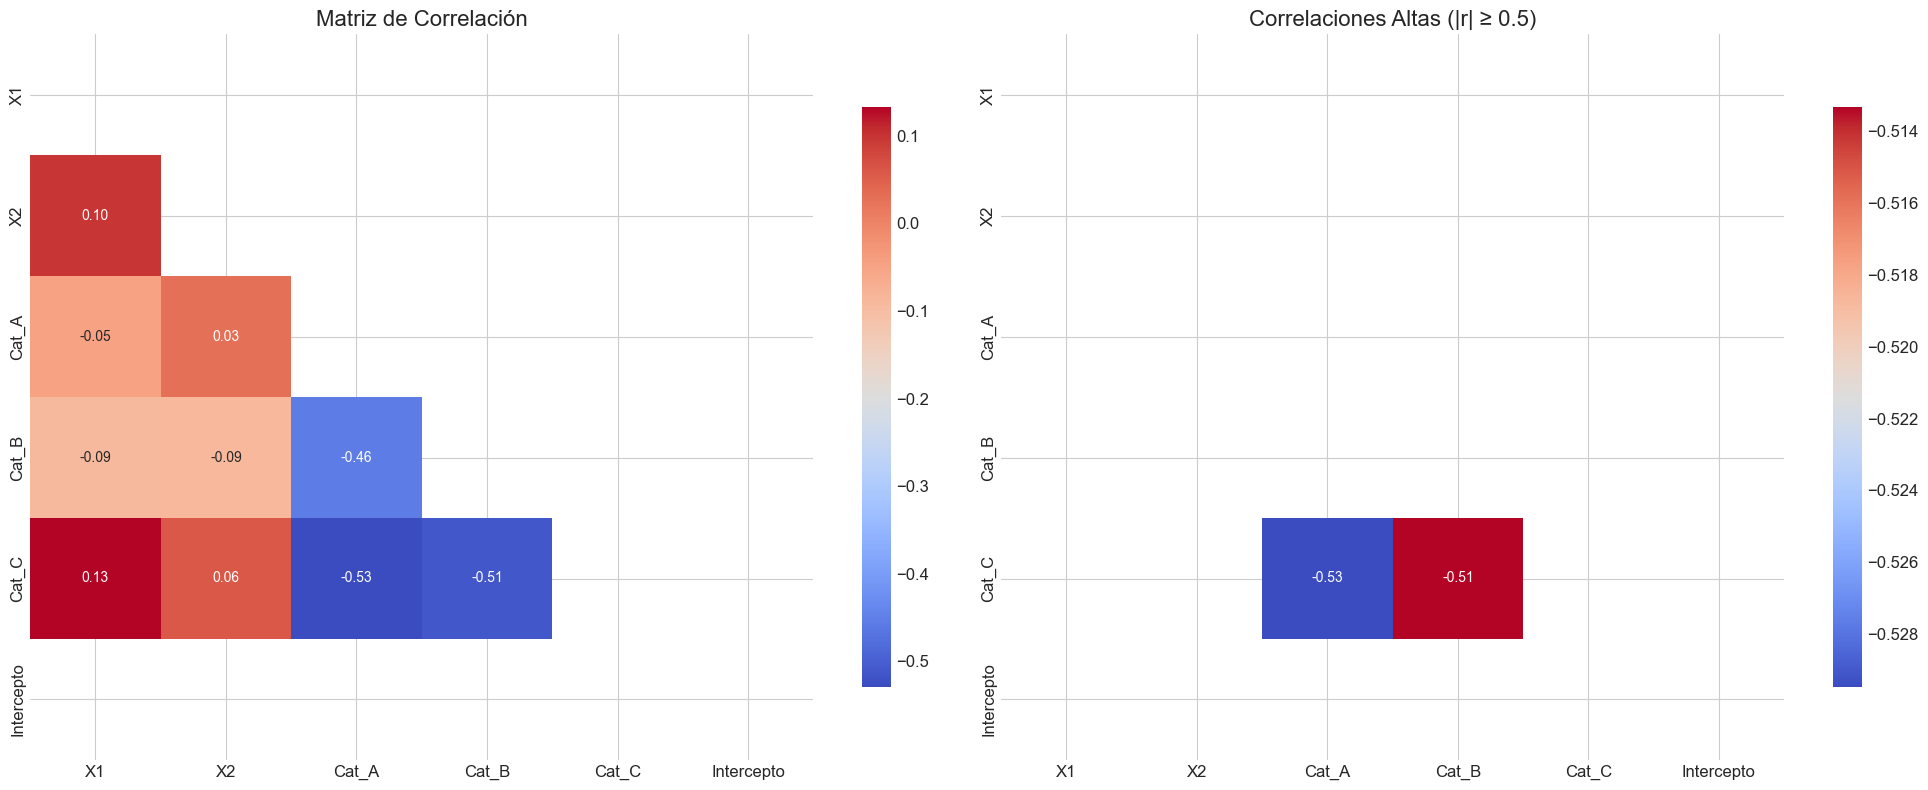

Pares de variables con alta correlación:
Cat_C - Cat_A: -0.529
Cat_C - Cat_B: -0.513
Resumen del modelo con todas las dummies (no debería funcionar):
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X1             1.2183      0.089     13.688      0.000       1.042       1.394
X2             0.7764      0.077     10.147      0.000       0.625       0.928
Cat_A          0.0489      0.116      0.421      0.674      -0.181       0.278
Cat_B          0.6377      0.118      5.394      0.000       0.404       0.871
Cat_C          1.2024      0.111     10.811      0.000       0.983       1.422
Intercepto     1.8890      0.061     31.167      0.000       1.769       2.009


In [8]:
def generar_caso_especifico(caso='dummy_trap', n_observaciones=200, seed=None):
    """
    Genera conjuntos de datos con casos específicos de multicolinealidad.

    Parámetros:
    -----------
    caso : str, default='dummy_trap'
        Tipo de caso específico:
        - 'dummy_trap': trampa de las variables dummy
        - 'serie_temporal': tendencia temporal común
        - 'polinomial': términos polinomiales
        - 'interacciones': términos de interacción
    n_observaciones : int, default=200
        Número de observaciones a generar
    seed : int, opcional
        Semilla para reproducibilidad

    Retorna:
    --------
    tuple
        (X, y) donde X es un DataFrame y y es una Series
    """
    # Establecer semilla si se proporciona
    if seed is not None:
        np.random.seed(seed)

    if caso == 'dummy_trap':
        # Generar categorías aleatorias
        categorias = np.random.choice(['A', 'B', 'C'], size=n_observaciones)

        # Crear variables dummy
        df = pd.DataFrame({
            'Categoría': categorias,
            'X1': np.random.normal(0, 1, n_observaciones),
            'X2': np.random.normal(0, 1, n_observaciones)
        })

        # Convertir a dummies
        df_dummies = pd.get_dummies(df, columns=['Categoría'], prefix='Cat')

        # Añadir intercepto (para demostrar la trampa)
        df_dummies['Intercepto'] = 1.0

        # Generar variable dependiente
        y = 2.0 + 1.5 * df_dummies['X1'] + 0.8 * df_dummies['X2'] +             0.5 * (df['Categoría'] == 'B').astype(float) +             1.0 * (df['Categoría'] == 'C').astype(float) +             np.random.normal(0, 1, n_observaciones)

        # Título del caso
        titulo = "Caso: Trampa de Variables Dummy"
        descripcion = """
        Este caso ilustra la 'trampa de las variables dummy', donde incluir todas las variables dummy 
        para todas las categorías junto con un término constante crea multicolinealidad perfecta.

        En este caso, tenemos una variable categórica con 3 niveles (A, B, C) y hemos creado 
        variables dummy para cada uno, además de incluir una columna de intercepto (constante). 

        La relación lineal es: Cat_A + Cat_B + Cat_C = Intercepto

        Para resolver este problema, típicamente se omite una de las categorías (la categoría de referencia).
        """

    elif caso == 'serie_temporal':
        # Generar tendencia temporal
        tiempo = np.arange(n_observaciones)

        # Variables con tendencia común
        tendencia = 0.1 * tiempo + np.random.normal(0, 1, n_observaciones)
        X1 = tendencia + 0.5 * np.random.normal(0, 1, n_observaciones)
        X2 = tendencia + 0.5 * np.random.normal(0, 1, n_observaciones)
        X3 = 0.7 * tendencia + 0.7 * np.random.normal(0, 1, n_observaciones)

        # DataFrame
        df_dummies = pd.DataFrame({
            'Tiempo': tiempo,
            'X1': X1,
            'X2': X2,
            'X3': X3
        })

        # Generar variable dependiente
        y = 2.0 + 1.5 * X1 + 0.8 * X2 - 0.5 * X3 + np.random.normal(0, 1, n_observaciones)

        # Título del caso
        titulo = "Caso: Multicolinealidad en Series Temporales"
        descripcion = """
        Este caso ilustra la multicolinealidad que surge en datos de series temporales 
        cuando múltiples variables comparten una tendencia temporal común.

        Las variables X1, X2 y X3 están todas basadas en la misma tendencia subyacente,
        lo que crea correlaciones altas entre ellas. Este tipo de multicolinealidad es 
        muy común en datos económicos y financieros.

        Técnicas como la diferenciación pueden ayudar a reducir este tipo de multicolinealidad.
        """

    elif caso == 'polinomial':
        # Variable base
        X1 = np.random.uniform(-3, 3, n_observaciones)

        # Términos polinomiales
        X1_squared = X1**2
        X1_cubed = X1**3

        # Variable adicional
        X2 = np.random.normal(0, 1, n_observaciones)

        # DataFrame
        df_dummies = pd.DataFrame({
            'X1': X1,
            'X1_squared': X1_squared,
            'X1_cubed': X1_cubed,
            'X2': X2
        })

        # Generar variable dependiente (relación cuadrática real)
        y = 1.0 + 0.5 * X1 + 2.0 * X1_squared + 0.0 * X1_cubed + 1.2 * X2 + np.random.normal(0, 1, n_observaciones)

        # Título del caso
        titulo = "Caso: Multicolinealidad con Términos Polinomiales"
        descripcion = """
        Este caso ilustra la multicolinealidad que surge al incluir términos polinomiales
        de la misma variable. X1, X1² y X1³ están correlacionados, especialmente para valores
        grandes de X1.

        Esta multicolinealidad es estructural, ya que es inherente a la especificación del modelo
        y no depende de las características particulares de los datos.

        El centrado de variables (X - media(X)) antes de crear términos polinomiales puede
        ayudar a reducir esta multicolinealidad.
        """

    elif caso == 'interacciones':
        # Variables base
        X1 = np.random.normal(0, 1, n_observaciones)
        X2 = np.random.normal(0, 1, n_observaciones)
        X3 = np.random.normal(0, 1, n_observaciones)

        # Términos de interacción
        X1_X2 = X1 * X2
        X1_X3 = X1 * X3
        X2_X3 = X2 * X3

        # DataFrame
        df_dummies = pd.DataFrame({
            'X1': X1,
            'X2': X2,
            'X3': X3,
            'X1_X2': X1_X2,
            'X1_X3': X1_X3,
            'X2_X3': X2_X3
        })

        # Generar variable dependiente
        y = 1.0 + 0.8 * X1 + 1.2 * X2 + 0.7 * X3 + 1.5 * X1_X2 + 0.0 * X1_X3 + 0.0 * X2_X3 + np.random.normal(0, 1, n_observaciones)

        # Título del caso
        titulo = "Caso: Multicolinealidad con Términos de Interacción"
        descripcion = """
        Este caso ilustra la multicolinealidad que surge al incluir términos de interacción
        entre variables. Las interacciones (X1*X2, X1*X3, X2*X3) están correlacionadas con
        las variables principales y entre sí.

        Esta multicolinealidad es estructural y es común en modelos con interacciones múltiples.

        El centrado de variables antes de crear interacciones y la selección cuidadosa de qué
        interacciones incluir puede ayudar a reducir este problema.
        """

    else:
        raise ValueError("Caso no válido. Opciones: 'dummy_trap', 'serie_temporal', 'polinomial', 'interacciones'")

    # Mostrar información del caso
    print(f"{'='*80}")
    print(f"{titulo}")
    print(f"{'='*80}")
    print(descripcion)

    # Calcular y mostrar diagnósticos de multicolinealidad
    vif_resultado = calcular_vif(df_dummies.drop('Intercepto', axis=1, errors='ignore'))
    numero_condicion, _ = calcular_indices_condicion(df_dummies.drop('Intercepto', axis=1, errors='ignore'))

    print(f"Número de condición: {numero_condicion:.2f}")
    print("Factores de Inflación de Varianza (VIF):")
    print(vif_resultado)

    # Visualizar correlaciones
    visualizar_correlaciones(df_dummies, umbral=0.5)

    return df_dummies, pd.Series(y, name='y')

# Ejemplo de uso: generar y analizar un caso específico de multicolinealidad
np.random.seed(42)

# Generar el caso de la trampa de variables dummy
X_dummy, y_dummy = generar_caso_especifico(caso='dummy_trap', n_observaciones=150, seed=42)

# Intentar ajustar modelo de regresión (debe fallar debido a multicolinealidad perfecta)
try:
    # Intentar ajustar el modelo con todas las dummies
    modelo_dummy = sm.OLS(y_dummy, X_dummy.astype(float)).fit()

    print("Resumen del modelo con todas las dummies (no debería funcionar):")
    print(modelo_dummy.summary().tables[1])
except np.linalg.LinAlgError:
    print("ERROR: No se pudo ajustar el modelo debido a multicolinealidad perfecta (matriz singular)")
    print("Esto es exactamente lo que esperábamos en la trampa de variables dummy.")

    # Intentar de nuevo eliminando una dummy
    X_dummy_corregido = X_dummy.drop('Cat_A', axis=1)
    modelo_dummy_corregido = sm.OLS(y_dummy, X_dummy_corregido).fit()
    print("Resumen del modelo eliminando una dummy (solución estándar):")
    print(modelo_dummy_corregido.summary().tables[1])

## Sección 4: Aplicación - Análisis de Casos con Multicolinealidad

En esta sección, analizaremos en profundidad cómo la multicolinealidad afecta a la estimación e inferencia en modelos lineales. Utilizaremos los conjuntos de datos generados con diferentes niveles de multicolinealidad para:

1. Comparar estimaciones con los valores verdaderos
2. Evaluar el impacto en errores estándar e intervalos de confianza
3. Analizar la estabilidad de las estimaciones
4. Visualizar las direcciones principales de multicolinealidad

Empezaremos con un análisis completo del caso de multicolinealidad baja como referencia.

ANÁLISIS COMPLETO: MULTICOLINEALIDAD BAJA
Conjunto de datos generado con multicolinealidad baja
Número de observaciones: 500
Número de condición: 1.77
Factores de Inflación de Varianza (VIF):
              Variable       VIF
0              Ingreso  1.229548
1            Educación  1.204333
2  Estatus_Ocupacional  1.196064
3           Patrimonio  1.181648
4                 Edad  1.011173


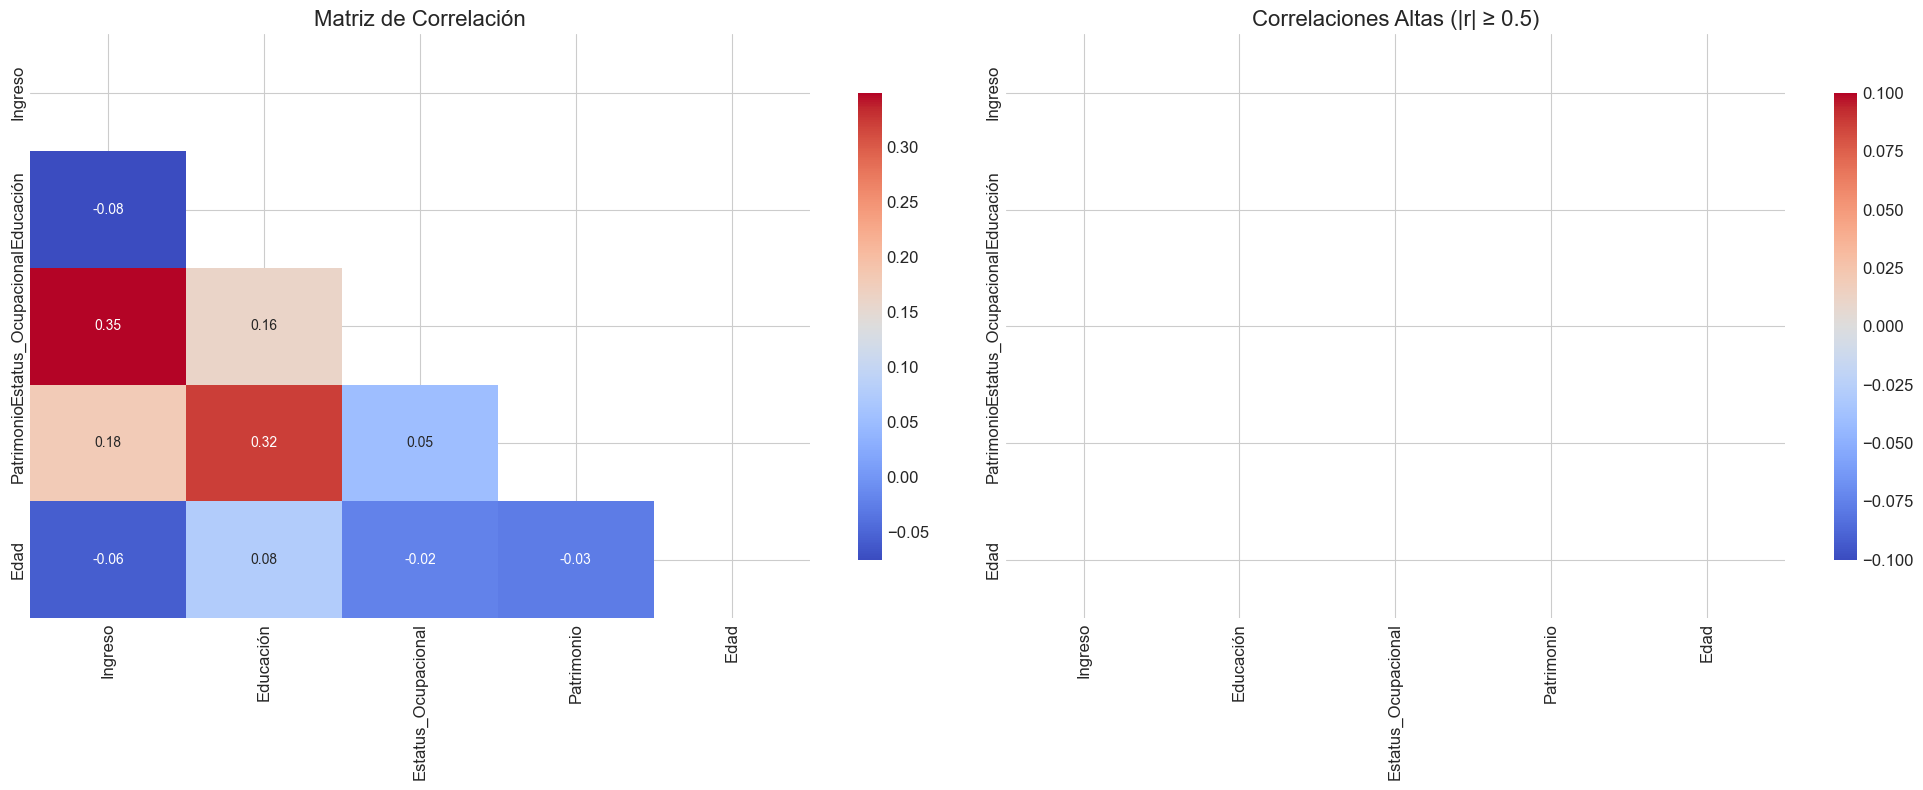

No se encontraron pares de variables con correlación ≥ 0.5
1. ESTIMACIÓN DEL MODELO
-----------------------
                                Variable  Coeficiente Real  \
const                         Intercepto               3.0   
Ingreso                          Ingreso               3.0   
Educación                      Educación               2.0   
Estatus_Ocupacional  Estatus_Ocupacional               1.5   
Patrimonio                    Patrimonio              -1.0   
Edad                                Edad               0.8   

                     Coeficiente Estimado  Error Estándar        Valor p  \
const                            3.019325        0.045480  2.629547e-248   
Ingreso                          3.034500        0.051097  4.656043e-227   
Educación                        2.058583        0.050739  2.211286e-159   
Estatus_Ocupacional              1.521412        0.051374  1.421076e-111   
Patrimonio                      -1.025153        0.052636   4.124174e-63   
E

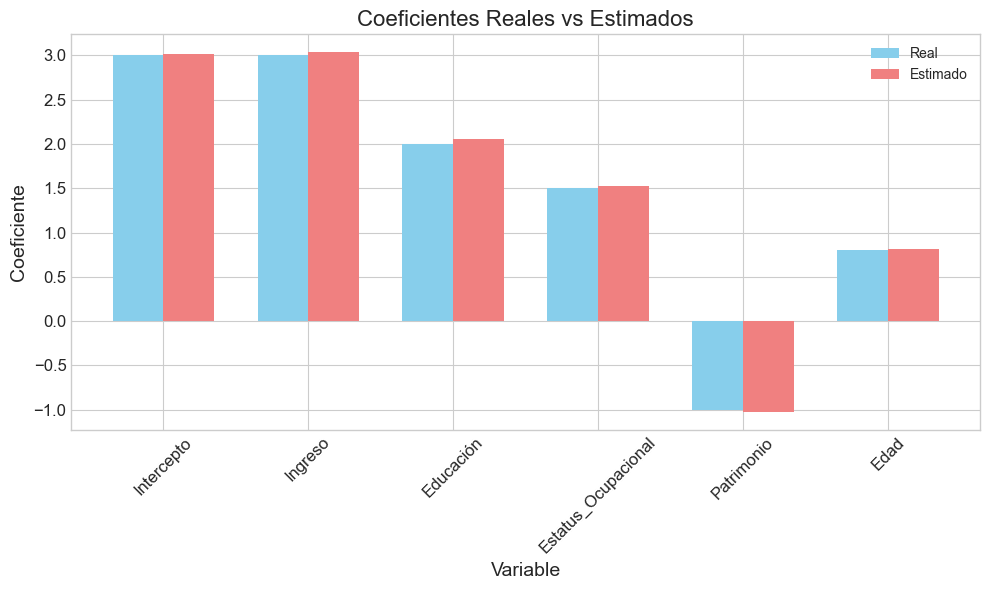

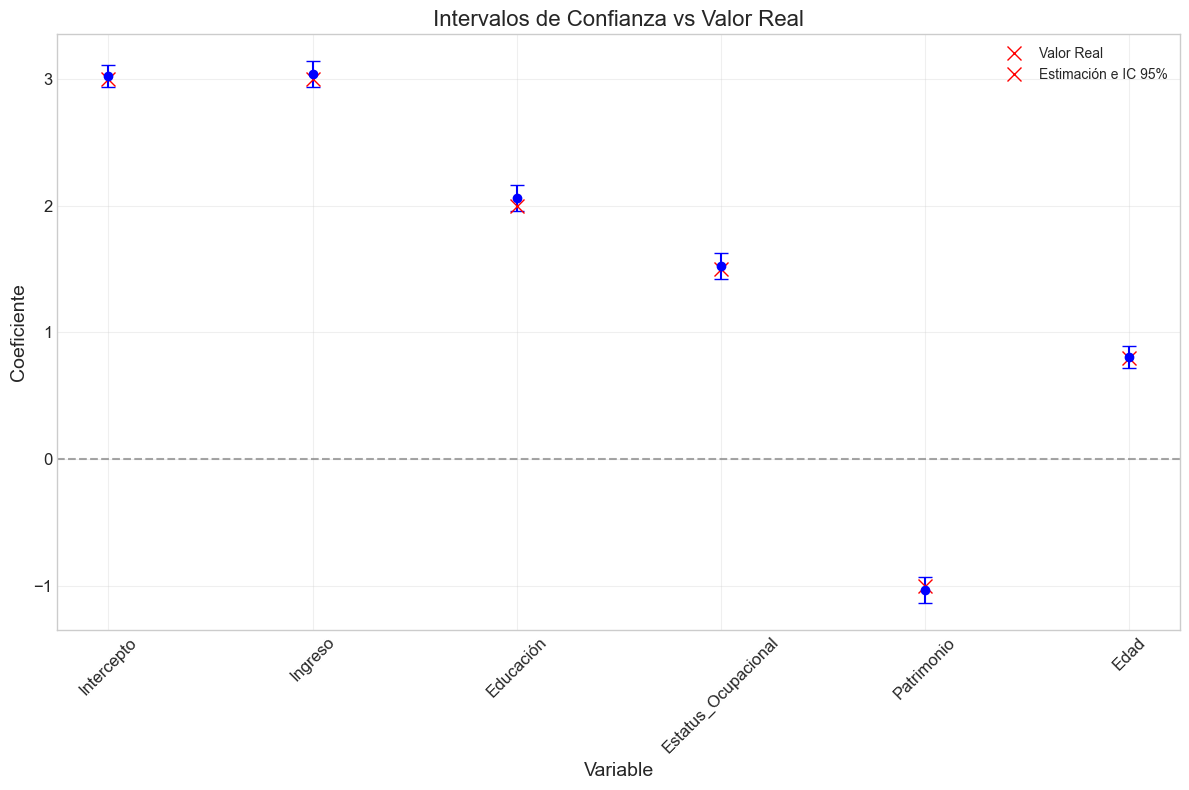

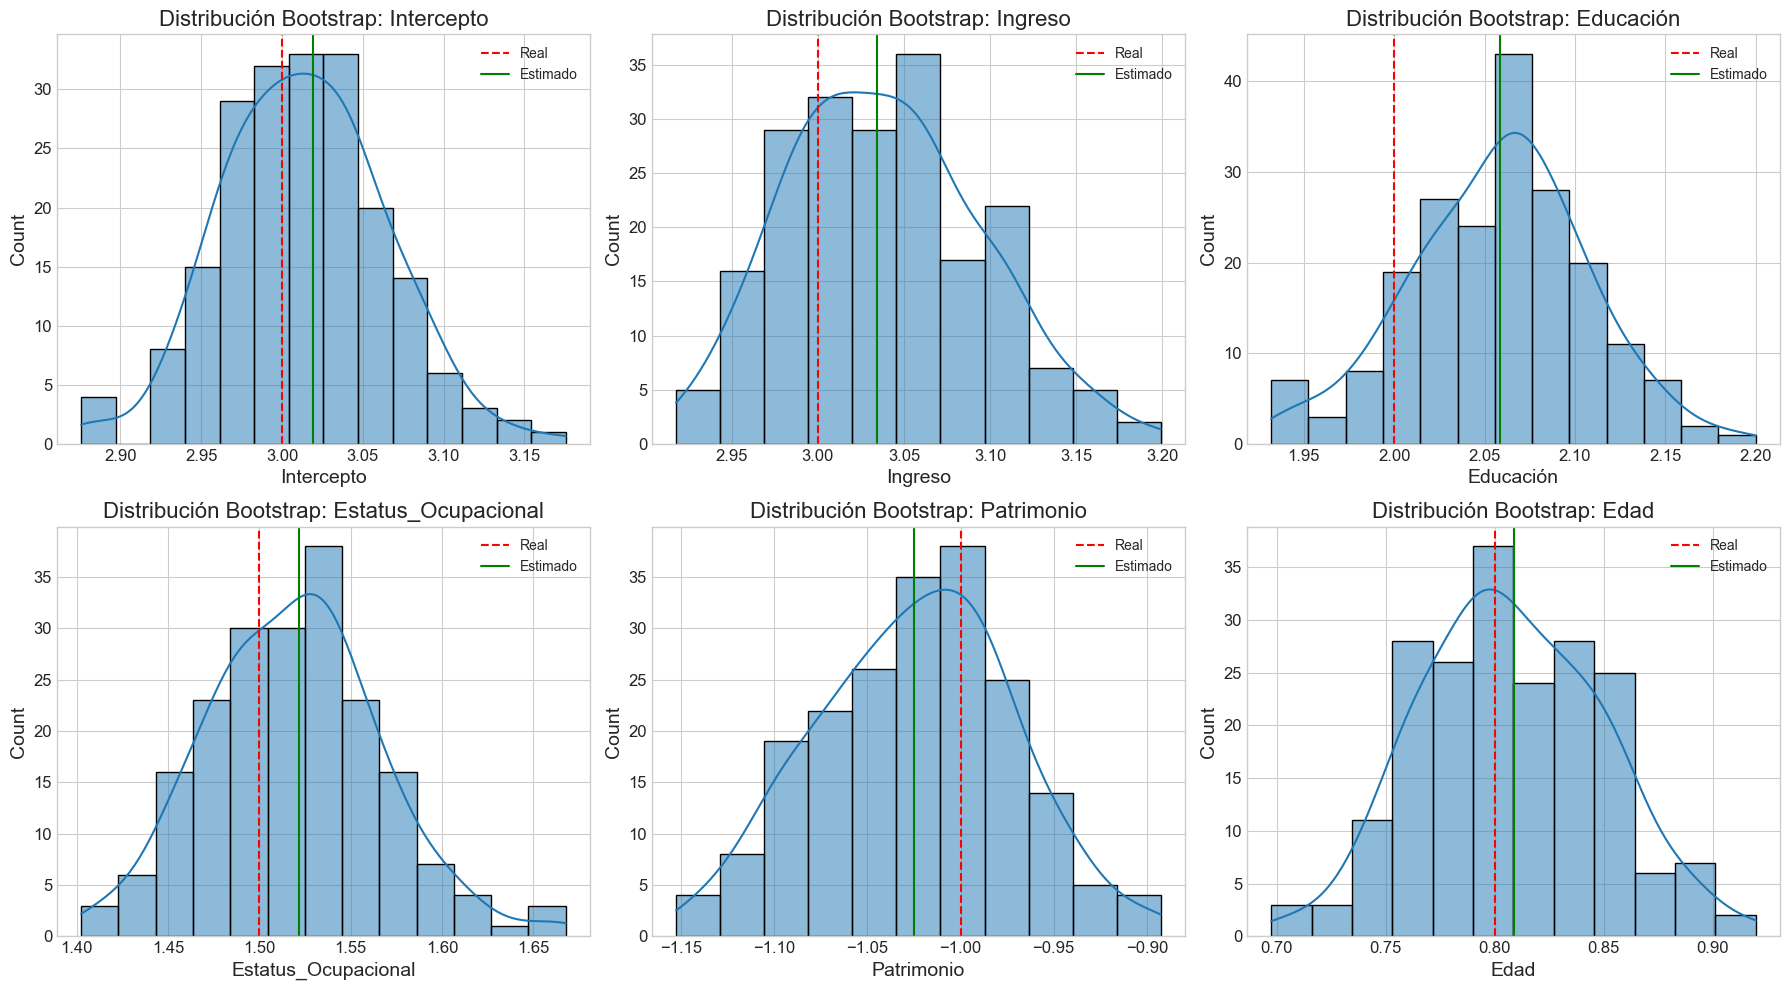

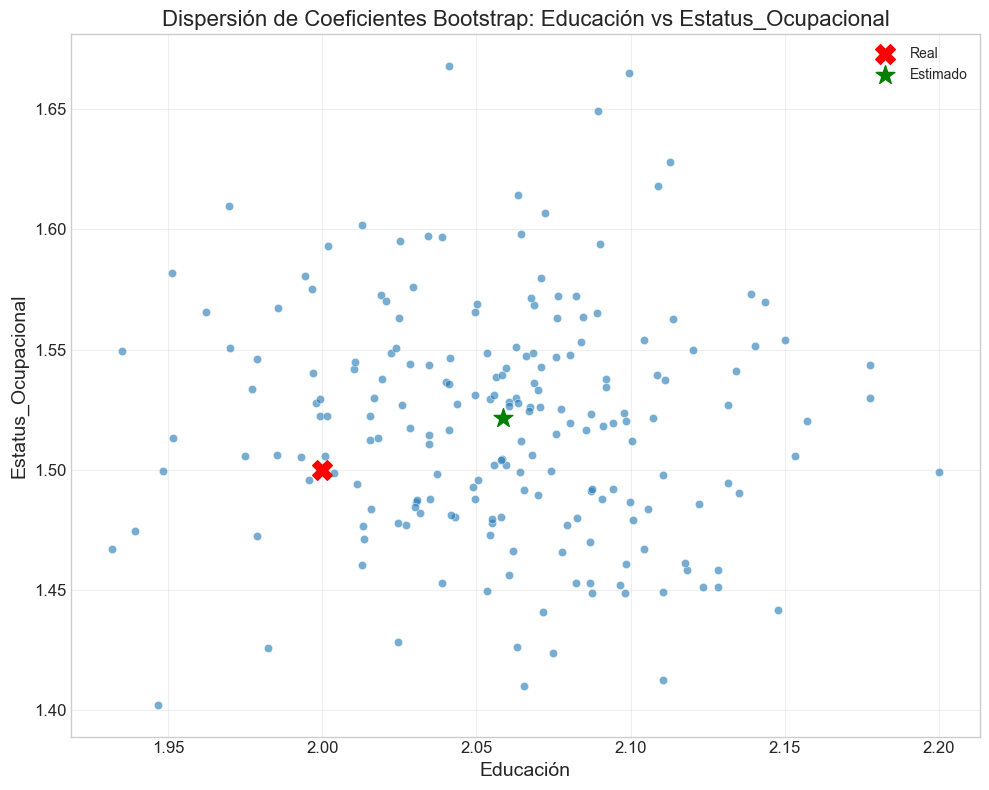

5. RESUMEN DEL IMPACTO DE LA MULTICOLINEALIDAD
-------------------------------------------
Error promedio en estimación: 1.63%
Máxima inflación de varianza: 1.16x
Máxima inestabilidad (CV): 5.17%
Coeficientes reales fuera del IC 95%: 0 de 6
Evaluación general del impacto: Bajo: La multicolinealidad no afecta significativamente la estimación.


In [10]:
def analizar_caso_completo(tipo_multicolinealidad='baja', n_observaciones=500, seed=42,
                      n_bootstraps=100, n_perturbaciones=50):
    """
    Realiza un análisis completo de un caso de multicolinealidad.

    Parámetros:
    -----------
    tipo_multicolinealidad : str
        Tipo de multicolinealidad ('baja', 'moderada', 'alta', 'perfecta', 'estructural')
    n_observaciones : int
        Número de observaciones
    seed : int
        Semilla para reproducibilidad
    n_bootstraps : int
        Número de remuestreos bootstrap
    n_perturbaciones : int
        Número de perturbaciones para estabilidad

    Retorna:
    --------
    dict
        Resultados del análisis
    """
    print(f"{'='*80}")
    print(f"ANÁLISIS COMPLETO: MULTICOLINEALIDAD {tipo_multicolinealidad.upper()}")
    print(f"{'='*80}")

    # Generar datos
    X, y, beta_true = generar_datos_multicolinealidad(
        n_observaciones=n_observaciones, tipo=tipo_multicolinealidad, seed=seed)

    # 1. Ajustar modelo
    X_const = sm.add_constant(X)
    modelo = sm.OLS(y, X_const).fit()

    print("1. ESTIMACIÓN DEL MODELO")
    print("-----------------------")

    # Crear tabla comparativa de coeficientes
    coef_compare = pd.DataFrame({
        'Variable': ['Intercepto'] + X.columns.tolist(),
        'Coeficiente Real': [3.0] + beta_true.tolist(),
        'Coeficiente Estimado': modelo.params,
        'Error Estándar': modelo.bse,
        'Valor p': modelo.pvalues,
        'Intervalo Inferior': modelo.conf_int()[0],
        'Intervalo Superior': modelo.conf_int()[1]
    })

    # Calcular error porcentual
    coef_compare['Error (%)'] = 100 * np.abs(coef_compare['Coeficiente Estimado'] - 
                                          coef_compare['Coeficiente Real']) / np.abs(coef_compare['Coeficiente Real'])

    # Calcular amplitud del intervalo de confianza normalizada
    coef_compare['Amplitud IC Normalizada'] = (coef_compare['Intervalo Superior'] - 
                                            coef_compare['Intervalo Inferior']) / np.abs(coef_compare['Coeficiente Real'])

    print(coef_compare)

    # 2. Análisis de Varianza Inflada
    print("2. ANÁLISIS DE VARIANZA INFLADA")
    print("-----------------------------")

    # Calcular razón de varianza real/sin multicolinealidad
    # Crear predictores ortogonales (sin correlación)
    np.random.seed(seed)
    Z = np.random.normal(0, 1, (n_observaciones, X.shape[1]))
    Z = pd.DataFrame(Z, columns=X.columns)

    # Ajustar modelo ortogonal
    Z_const = sm.add_constant(Z)
    modelo_ortogonal = sm.OLS(3.0 + np.dot(Z, beta_true) + np.random.normal(0, 1, n_observaciones), 
                             Z_const).fit()

    # Comparar errores estándar
    varianza_compare = pd.DataFrame({
        'Variable': ['Intercepto'] + X.columns.tolist(),
        'Error Estándar (Multicolinealidad)': modelo.bse,
        'Error Estándar (Ortogonal)': modelo_ortogonal.bse,
        'Razón de Varianza': modelo.bse / modelo_ortogonal.bse
    })

    print(varianza_compare)

    # 3. Estabilidad de Coeficientes (Bootstrap)
    print("3. ANÁLISIS DE ESTABILIDAD (BOOTSTRAP)")
    print("------------------------------------")

    # Inicializar matriz para coeficientes bootstrap
    coef_bootstrap = np.zeros((n_bootstraps, X.shape[1] + 1))

    # Realizar bootstrap
    np.random.seed(seed)
    indices = np.arange(n_observaciones)

    for i in range(n_bootstraps):
        # Seleccionar muestra bootstrap
        bootstrap_indices = np.random.choice(indices, n_observaciones, replace=True)
        X_boot = X.iloc[bootstrap_indices]
        y_boot = y.iloc[bootstrap_indices]

        # Ajustar modelo
        X_boot_const = sm.add_constant(X_boot)
        modelo_boot = sm.OLS(y_boot, X_boot_const).fit()

        # Almacenar coeficientes
        coef_bootstrap[i] = modelo_boot.params

    # Calcular estadísticas de estabilidad
    coef_bootstrap_df = pd.DataFrame(coef_bootstrap, 
                                   columns=['Intercepto'] + X.columns.tolist())

    estabilidad = pd.DataFrame({
        'Variable': ['Intercepto'] + X.columns.tolist(),
        'Media Bootstrap': coef_bootstrap_df.mean(),
        'Desv. Estándar Bootstrap': coef_bootstrap_df.std(),
        'CV (%)': (coef_bootstrap_df.std() / abs(coef_bootstrap_df.mean())) * 100,
        'Percentil 2.5': coef_bootstrap_df.quantile(0.025),
        'Percentil 97.5': coef_bootstrap_df.quantile(0.975)
    })

    print(estabilidad)

    # 4. Visualizaciones
    print("4. VISUALIZACIONES")
    print("----------------")

    # 4.1 Comparación de coeficientes reales vs estimados
    plt.figure(figsize=(10, 6))
    variables = ['Intercepto'] + X.columns.tolist()
    x = np.arange(len(variables))
    width = 0.35

    plt.bar(x - width/2, coef_compare['Coeficiente Real'], width, label='Real', color='skyblue')
    plt.bar(x + width/2, coef_compare['Coeficiente Estimado'], width, label='Estimado', color='lightcoral')

    plt.xlabel('Variable')
    plt.ylabel('Coeficiente')
    plt.title('Coeficientes Reales vs Estimados')
    plt.xticks(x, variables, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 4.2 Intervalos de confianza vs valor real
    plt.figure(figsize=(12, 8))

    for i, var in enumerate(variables):
        plt.errorbar(
            x=i,
            y=coef_compare.iloc[i]['Coeficiente Estimado'],
            yerr=[[coef_compare.iloc[i]['Coeficiente Estimado'] - coef_compare.iloc[i]['Intervalo Inferior']],
                [coef_compare.iloc[i]['Intervalo Superior'] - coef_compare.iloc[i]['Coeficiente Estimado']]],
            fmt='o', color='blue', ecolor='blue', capsize=5
        )
        plt.plot(i, coef_compare.iloc[i]['Coeficiente Real'], 'rx', markersize=10)


    plt.axhline(y=0, color='grey', linestyle='--', alpha=0.7)
    plt.xlabel('Variable')
    plt.ylabel('Coeficiente')
    plt.title('Intervalos de Confianza vs Valor Real')
    plt.xticks(range(len(variables)), variables, rotation=45)
    plt.grid(True, alpha=0.3)
    plt.legend(['Valor Real', 'Estimación e IC 95%'], loc='best')
    plt.tight_layout()
    plt.show()

    # 4.3 Distribución bootstrap de coeficientes
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
    axes = axes.flatten()

    for i, var in enumerate(variables):
        if i < len(axes):
            sns.histplot(coef_bootstrap_df[var], kde=True, ax=axes[i])
            axes[i].axvline(x=coef_compare.iloc[i]['Coeficiente Real'], color='red', linestyle='--', label='Real')
            axes[i].axvline(x=coef_compare.iloc[i]['Coeficiente Estimado'], color='green', linestyle='-', label='Estimado')

            axes[i].set_title(f'Distribución Bootstrap: {var}')
            axes[i].legend()

    plt.tight_layout()
    plt.show()

    # 4.4 Gráfico de dispersión de coeficientes bootstrap para pares clave
    if X.shape[1] >= 4:  # Si hay suficientes variables
        plt.figure(figsize=(10, 8))
        sns.scatterplot(x=coef_bootstrap_df.iloc[:, 2], y=coef_bootstrap_df.iloc[:, 3],
                       alpha=0.6)
        plt.scatter(coef_compare.iloc[2]['Coeficiente Real'], coef_compare.iloc[3]['Coeficiente Real'], 
                   color='red', marker='X', s=200, label='Real')
        plt.scatter(coef_compare.iloc[2]['Coeficiente Estimado'], coef_compare.iloc[3]['Coeficiente Estimado'],
                   color='green', marker='*', s=200, label='Estimado')
        plt.xlabel(variables[2])
        plt.ylabel(variables[3])
        plt.title(f'Dispersión de Coeficientes Bootstrap: {variables[2]} vs {variables[3]}')
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()

    # 5. Resumen del impacto
    print("5. RESUMEN DEL IMPACTO DE LA MULTICOLINEALIDAD")
    print("-------------------------------------------")

    # Calcular métricas de impacto
    error_promedio = coef_compare['Error (%)'].mean()
    max_razon_varianza = varianza_compare['Razón de Varianza'].max()
    max_cv = estabilidad['CV (%)'].max()
    n_fuera_ic = sum(~((coef_compare['Intervalo Inferior'] <= coef_compare['Coeficiente Real']) & 
                     (coef_compare['Coeficiente Real'] <= coef_compare['Intervalo Superior'])))

    print(f"Error promedio en estimación: {error_promedio:.2f}%")
    print(f"Máxima inflación de varianza: {max_razon_varianza:.2f}x")
    print(f"Máxima inestabilidad (CV): {max_cv:.2f}%")
    print(f"Coeficientes reales fuera del IC 95%: {n_fuera_ic} de {len(variables)}")

    # Evaluación cualitativa
    if error_promedio < 10 and max_razon_varianza < 2 and max_cv < 20 and n_fuera_ic == 0:
        impacto = "Bajo: La multicolinealidad no afecta significativamente la estimación."
    elif error_promedio < 20 and max_razon_varianza < 5 and max_cv < 50 and n_fuera_ic <= 1:
        impacto = "Moderado: La multicolinealidad causa algunos problemas de precisión."
    else:
        impacto = "Alto: La multicolinealidad compromete seriamente la estimación e inferencia."

    print(f"Evaluación general del impacto: {impacto}")

    return {
        'modelo': modelo,
        'coef_compare': coef_compare,
        'varianza_compare': varianza_compare,
        'estabilidad': estabilidad,
        'coef_bootstrap': coef_bootstrap_df,
        'X': X,
        'y': y,
        'beta_true': beta_true
    }

# Analizar caso de multicolinealidad baja
np.random.seed(42)
resultados_baja = analizar_caso_completo(tipo_multicolinealidad='baja', 
                                        n_observaciones=500, 
                                        seed=42,
                                        n_bootstraps=200)

ANÁLISIS COMPLETO: MULTICOLINEALIDAD ALTA
Conjunto de datos generado con multicolinealidad alta
Número de observaciones: 500
Número de condición: 45.78
Factores de Inflación de Varianza (VIF):
              Variable         VIF
0              Ingreso  442.663063
1  Estatus_Ocupacional  366.914225
2           Patrimonio   96.680225
3            Educación   52.848574
4                 Edad    1.011173


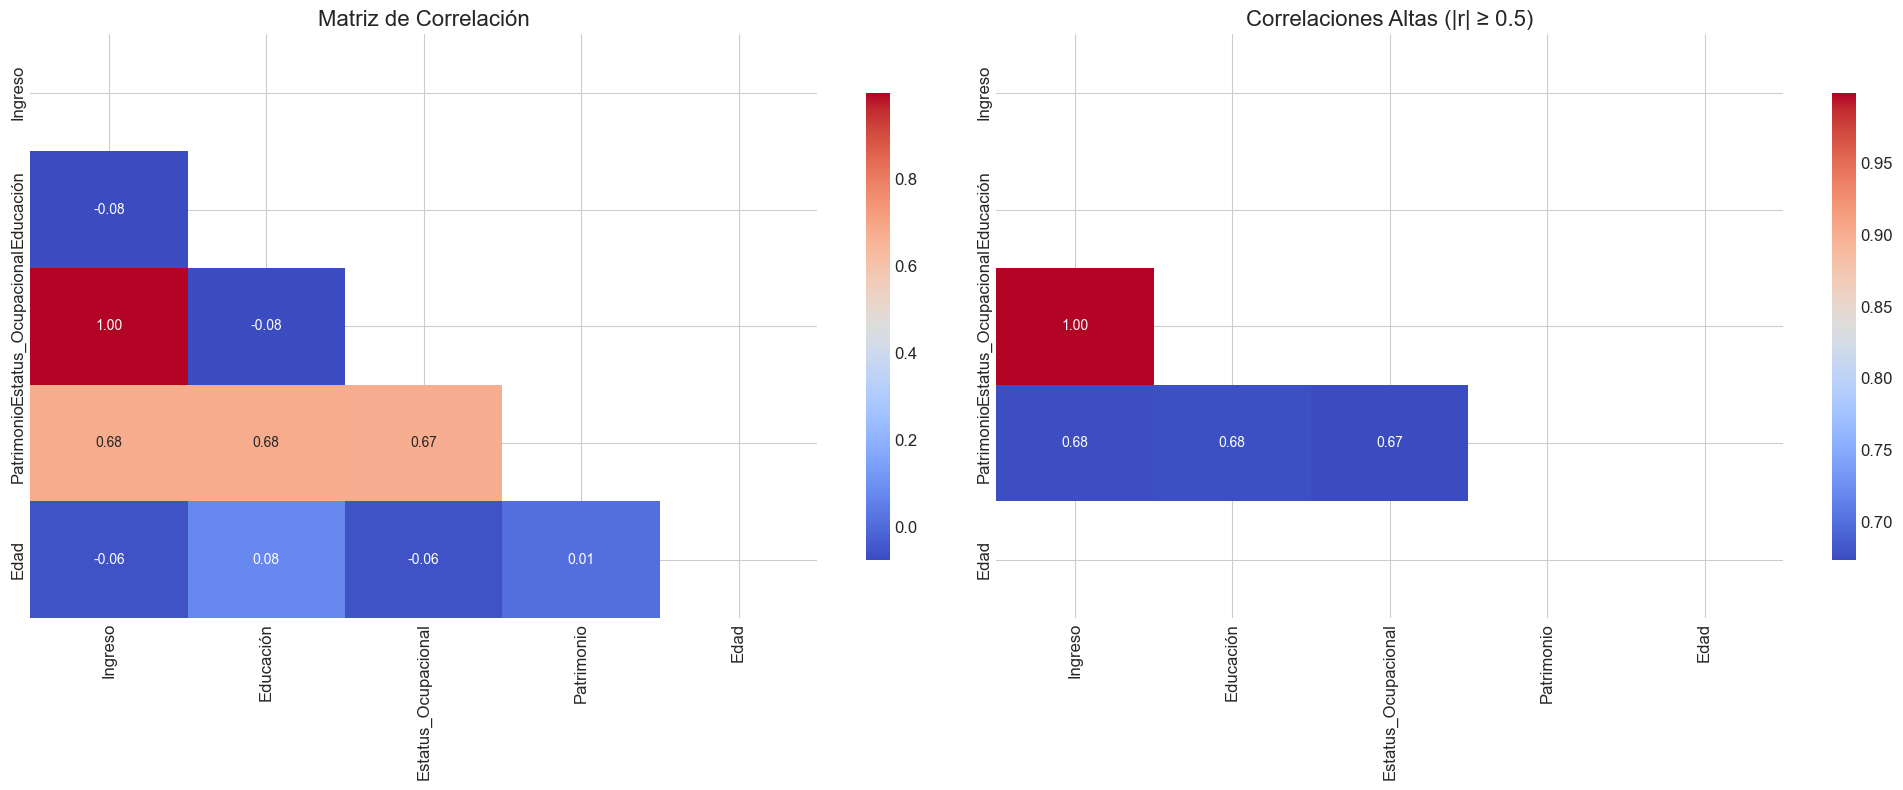

Pares de variables con alta correlación:
Estatus_Ocupacional - Ingreso: 0.999
Patrimonio - Ingreso: 0.676
Patrimonio - Educación: 0.677
Patrimonio - Estatus_Ocupacional: 0.674
1. ESTIMACIÓN DEL MODELO
-----------------------
                                Variable  Coeficiente Real  \
const                         Intercepto               3.0   
Ingreso                          Ingreso               2.0   
Educación                      Educación               1.5   
Estatus_Ocupacional  Estatus_Ocupacional               1.0   
Patrimonio                    Patrimonio              -0.5   
Edad                                Edad               0.7   

                     Coeficiente Estimado  Error Estándar        Valor p  \
const                            3.019325        0.045480  2.629547e-248   
Ingreso                          1.828215        0.969526   5.992466e-02   
Educación                        1.713783        0.336111   4.877194e-07   
Estatus_Ocupacional              1.3

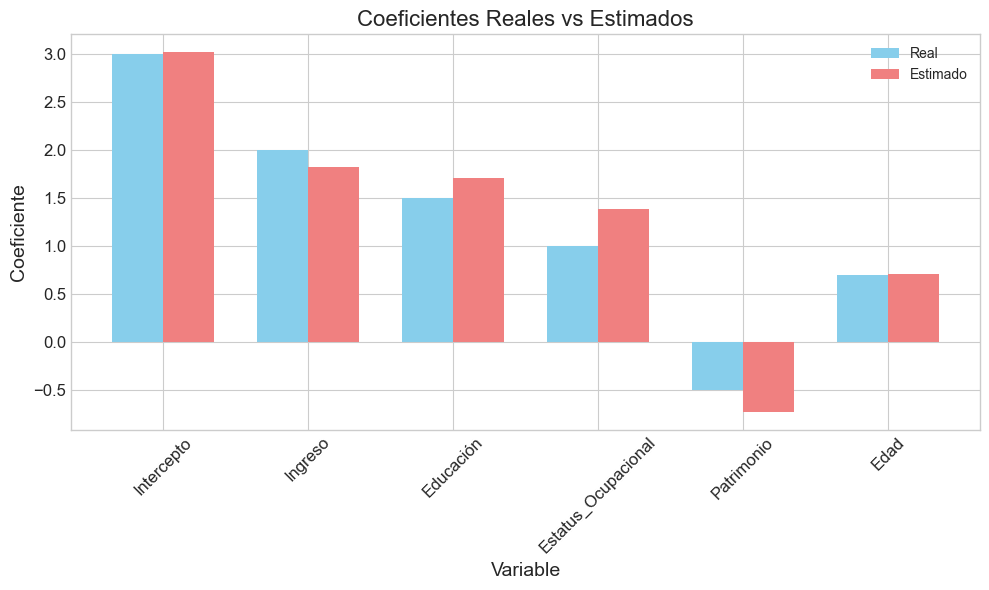

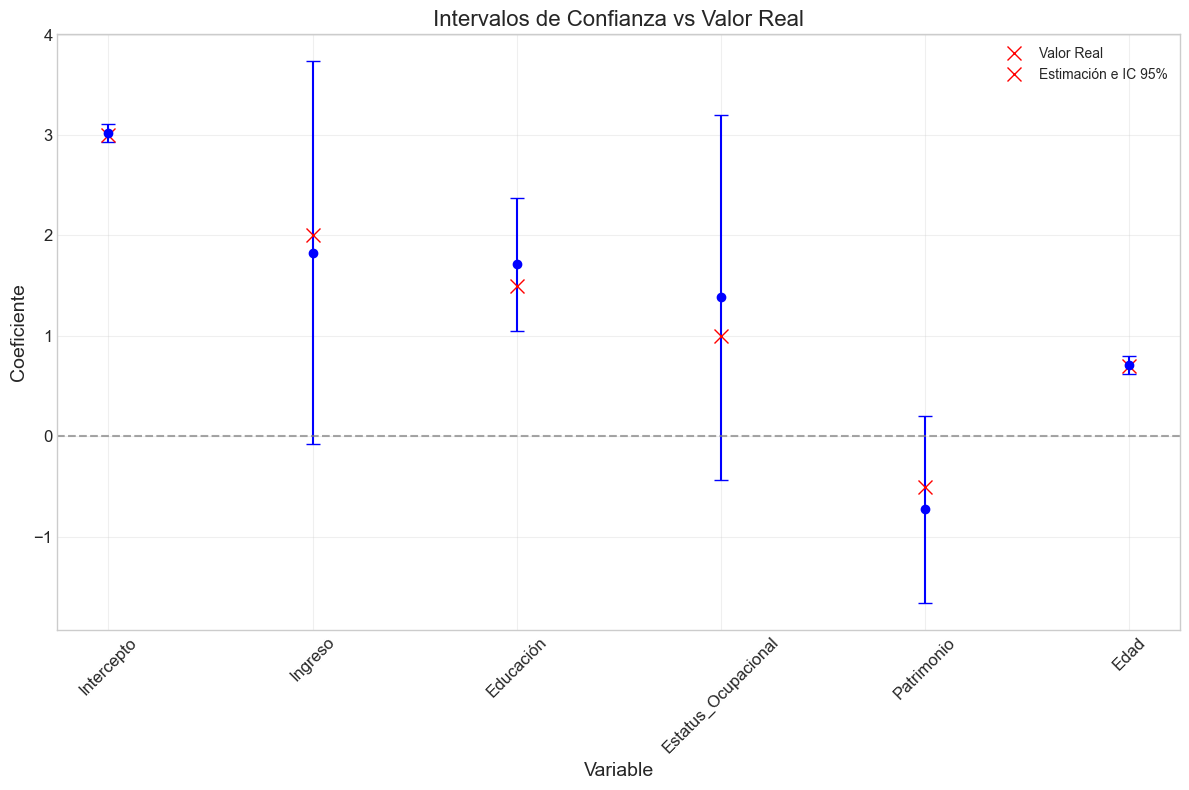

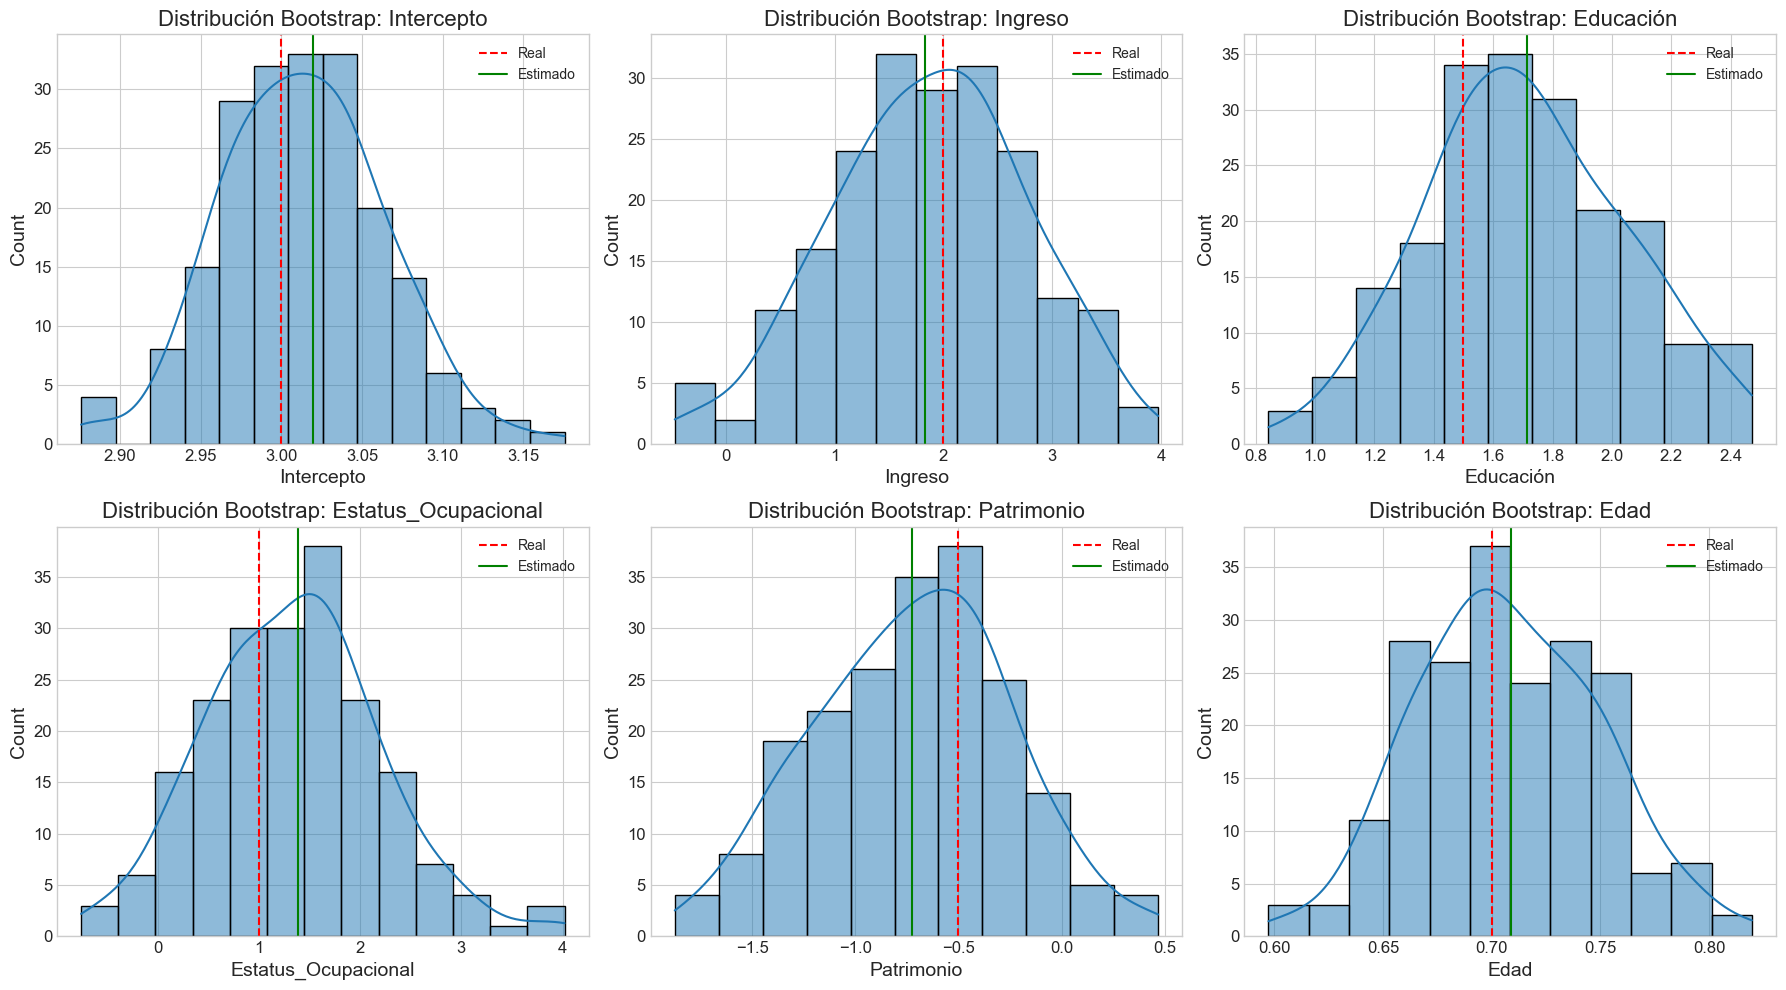

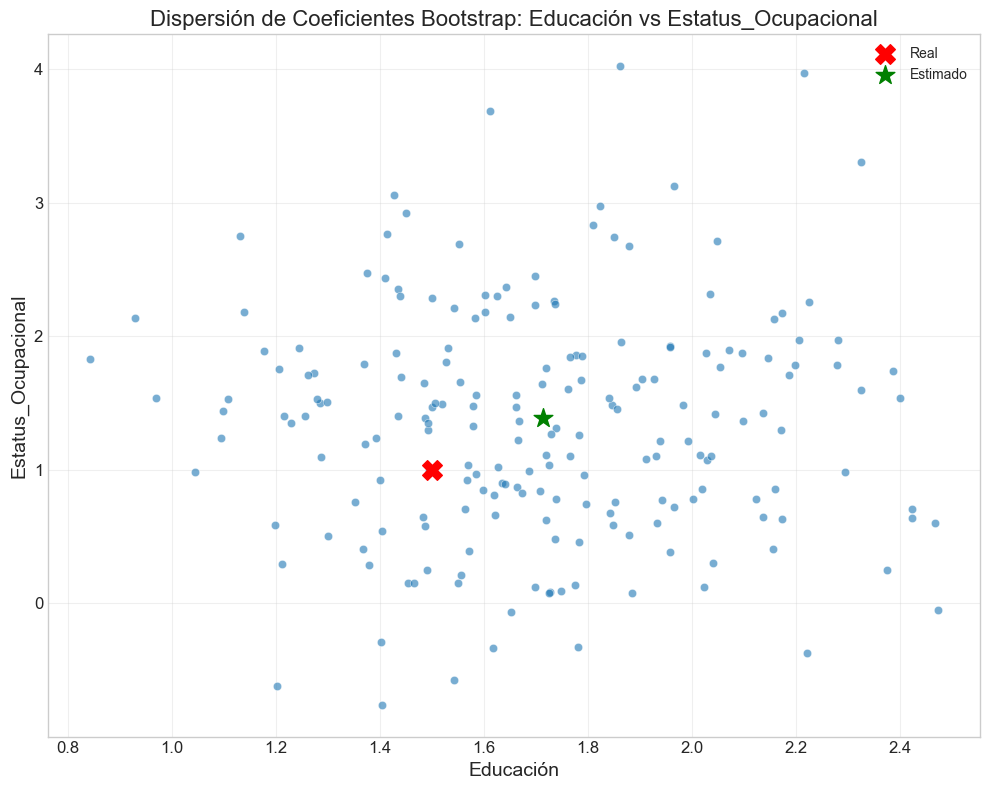

5. RESUMEN DEL IMPACTO DE LA MULTICOLINEALIDAD
-------------------------------------------
Error promedio en estimación: 18.09%
Máxima inflación de varianza: 20.72x
Máxima inestabilidad (CV): 65.01%
Coeficientes reales fuera del IC 95%: 0 de 6
Evaluación general del impacto: Alto: La multicolinealidad compromete seriamente la estimación e inferencia.
COMPARACIÓN DIRECTA: MULTICOLINEALIDAD BAJA VS ALTA
                                Variable  Error Baja (%)  Error Alta (%)  \
Edad                                Edad        1.098206        1.255092   
Educación                      Educación        2.929150       14.252180   
Estatus_Ocupacional  Estatus_Ocupacional        1.427451       38.541190   
Ingreso                          Ingreso        1.150012        8.589239   
Intercepto                           NaN             NaN             NaN   
Patrimonio                    Patrimonio        2.515289       45.275204   
const                         Intercepto        0.644180       

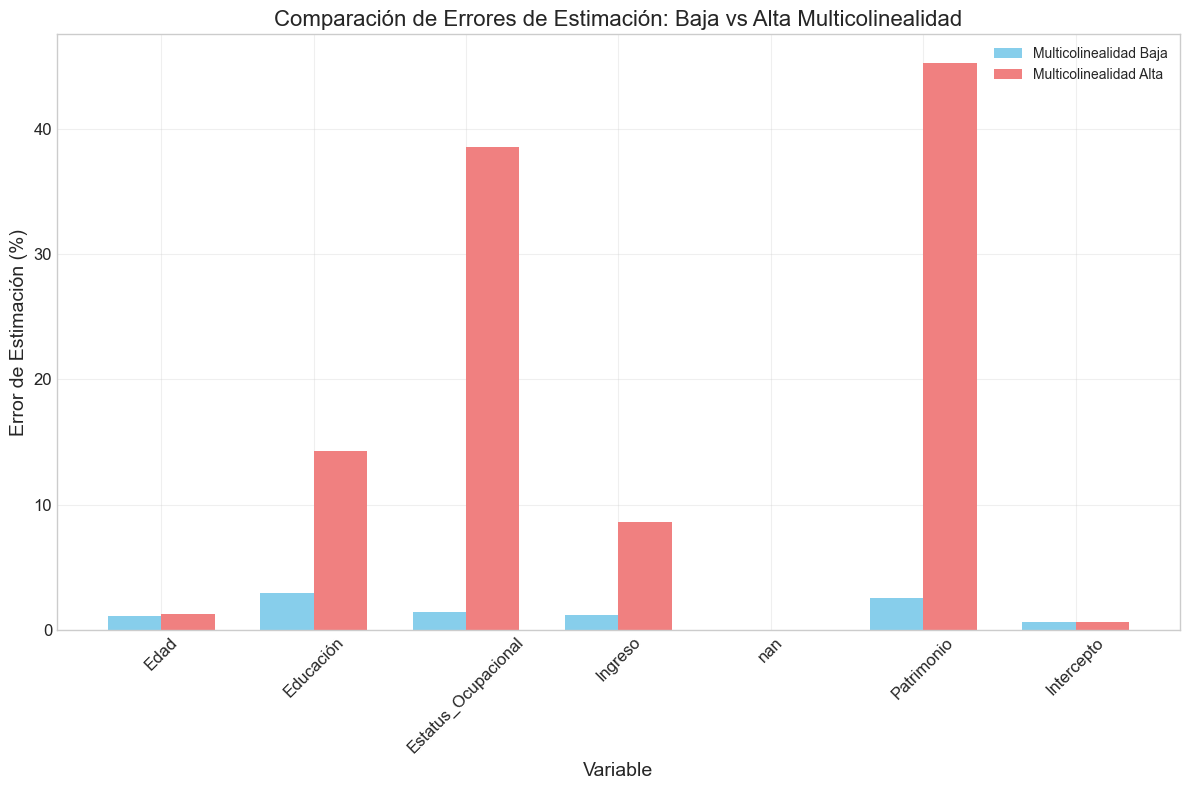

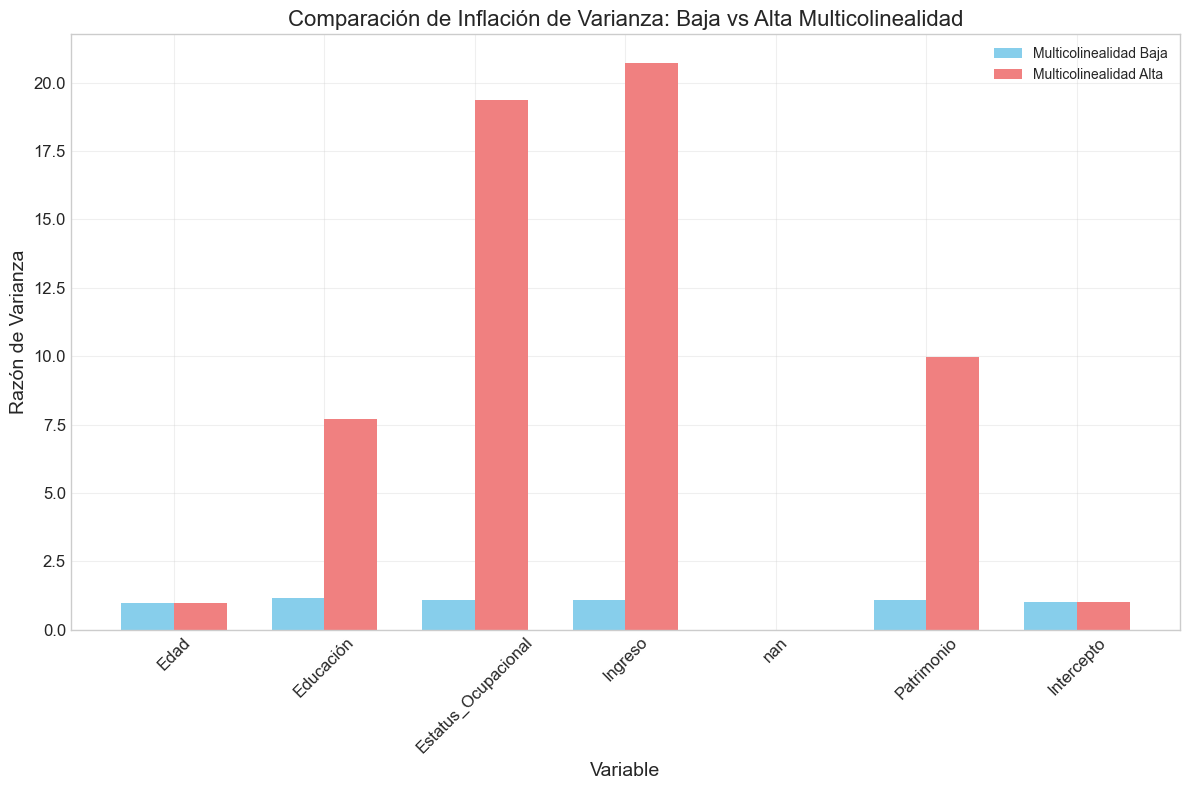

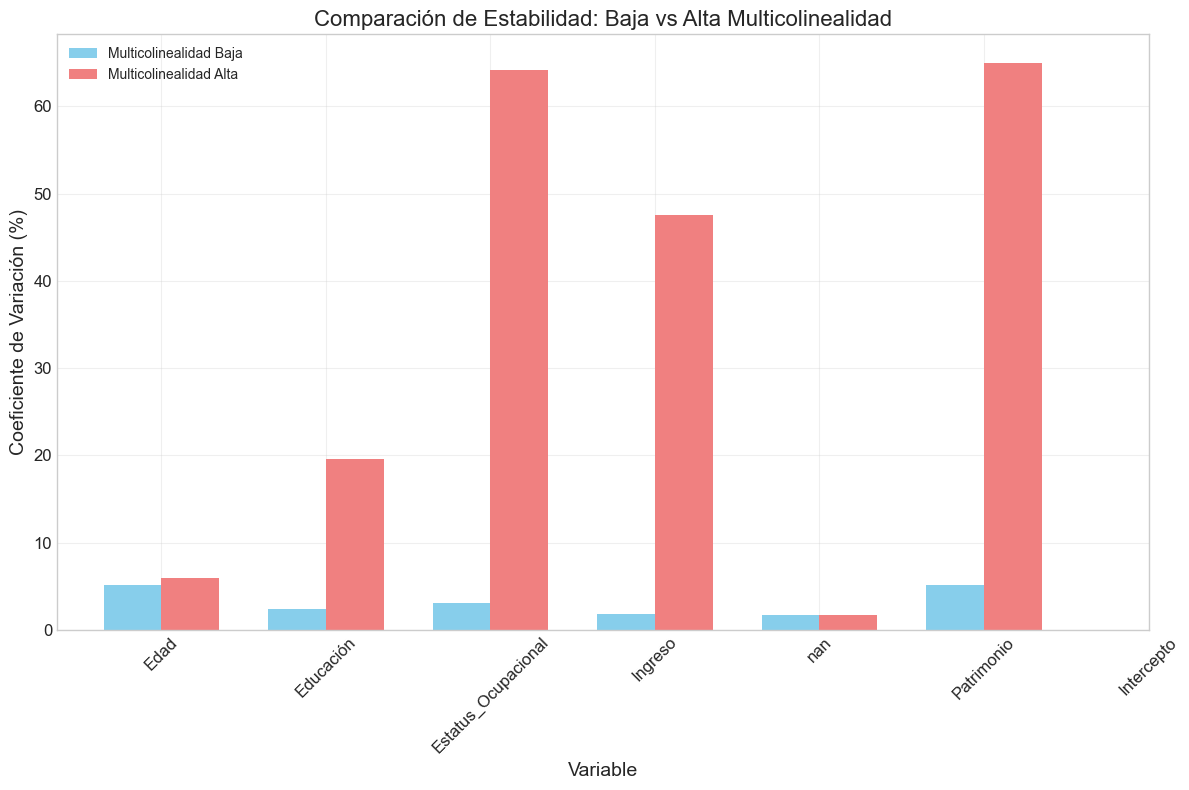

Análisis SVD - Multicolinealidad Baja:


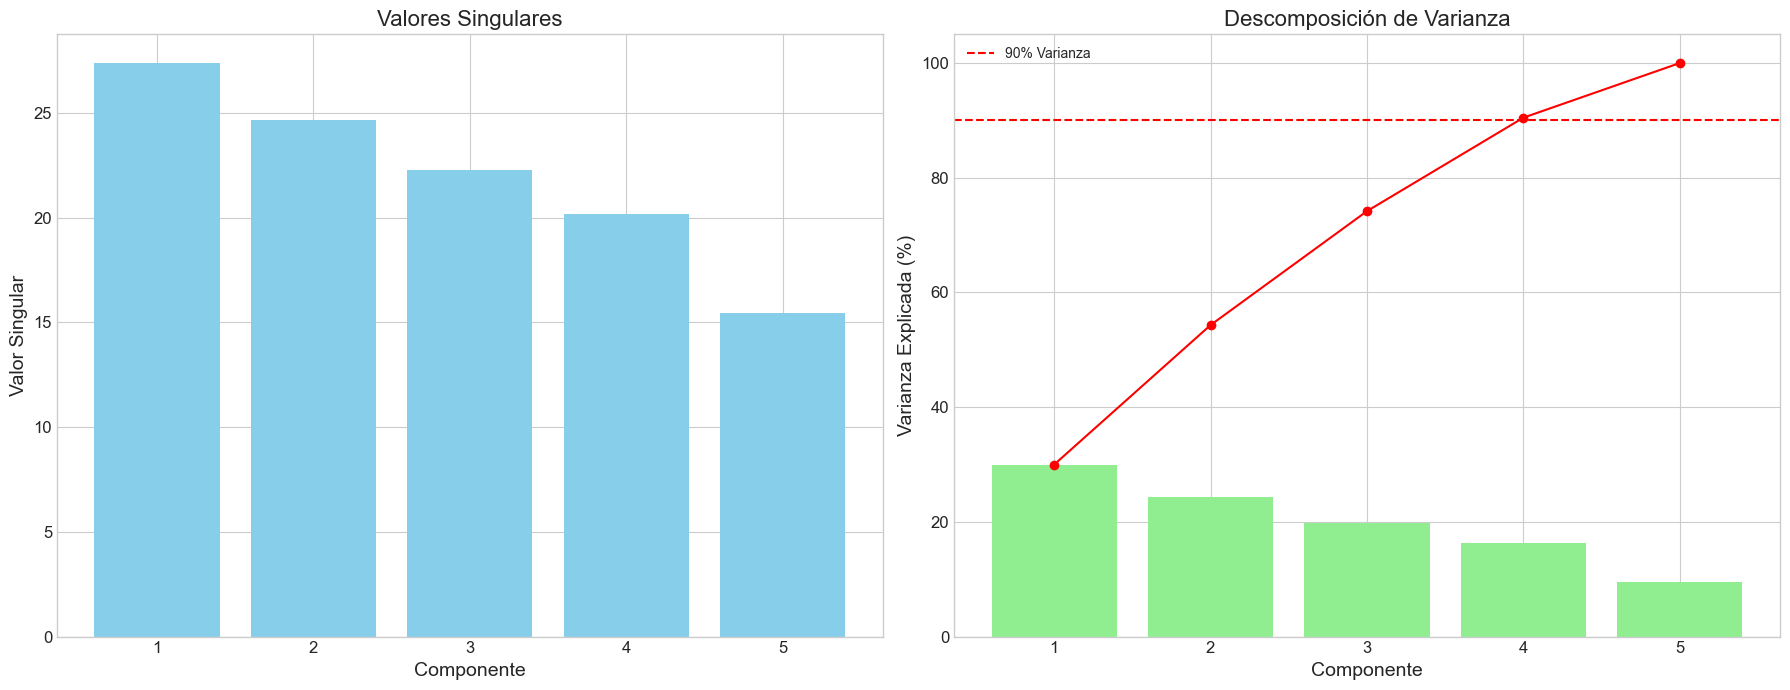

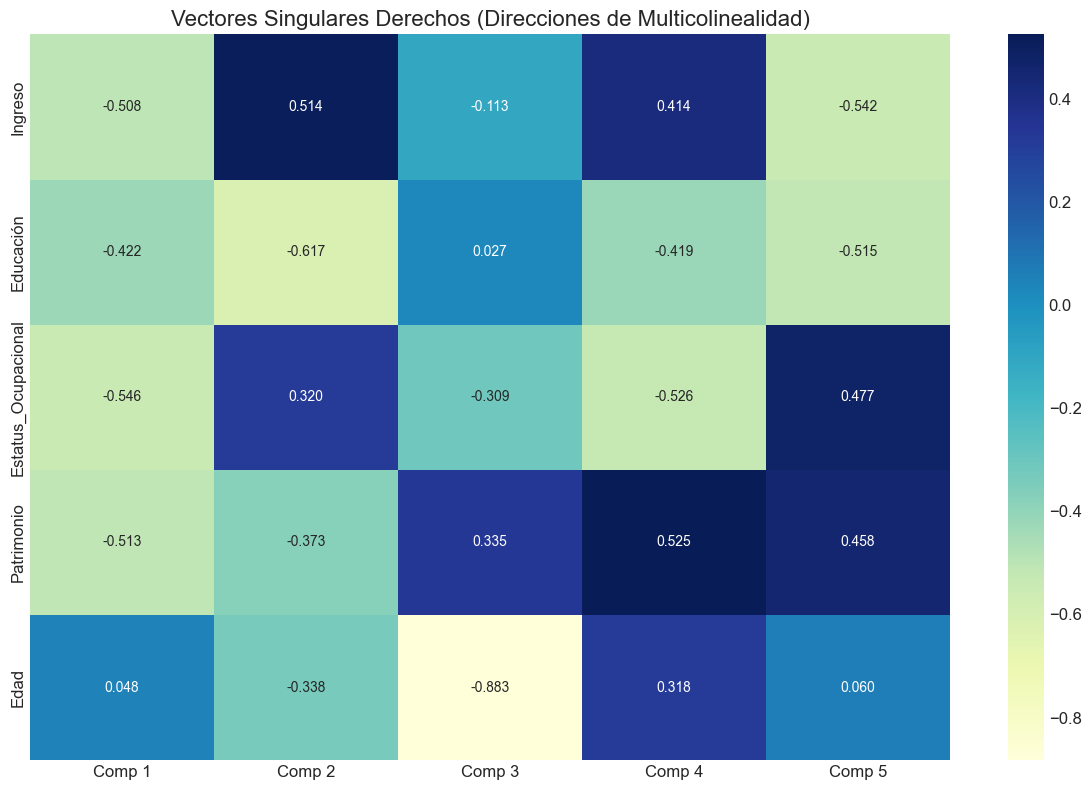

Número de condición: 1.77
No se detectaron componentes que indiquen multicolinealidad severa.
Análisis SVD - Multicolinealidad Alta:


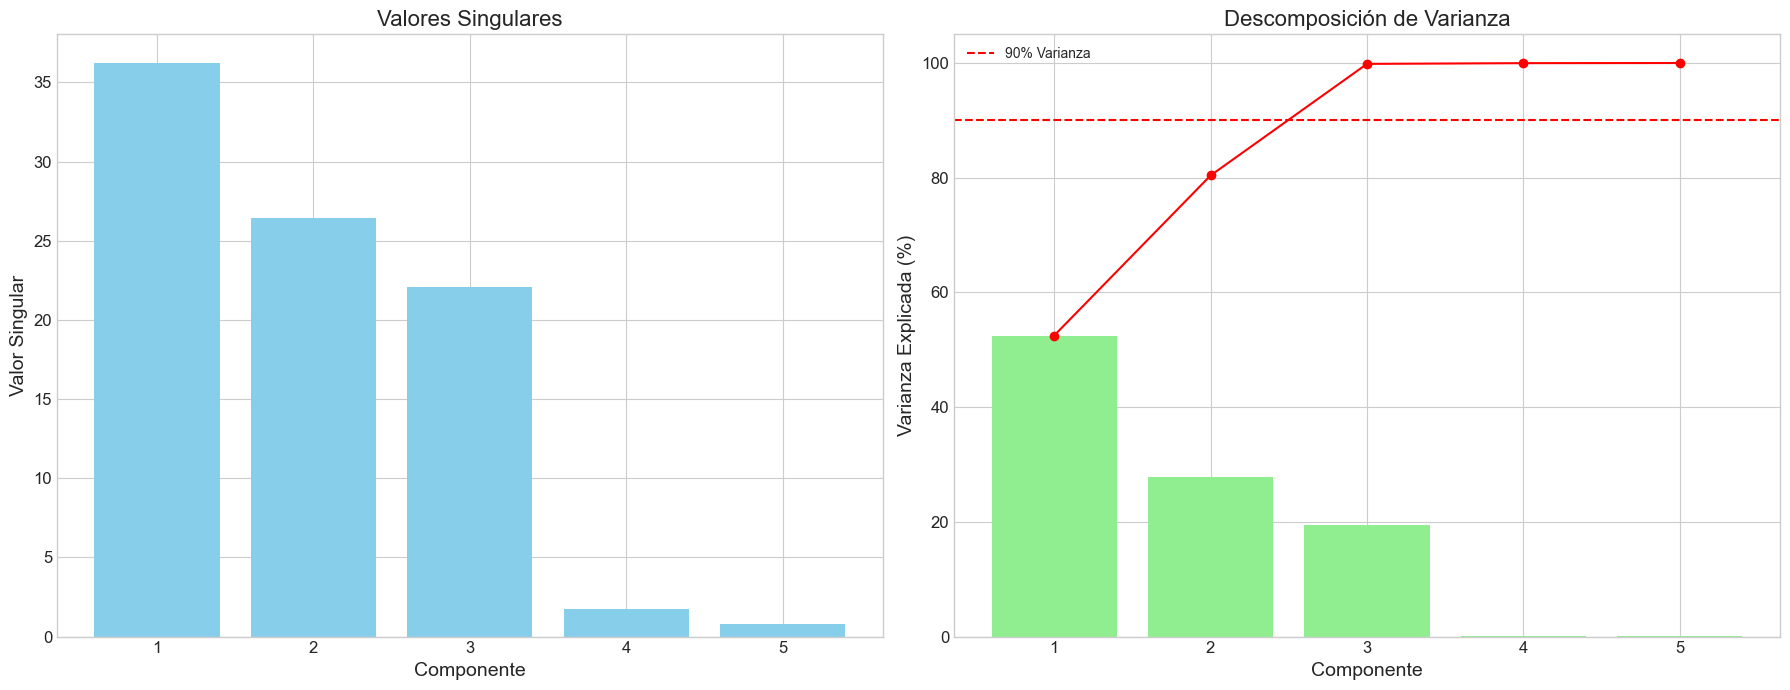

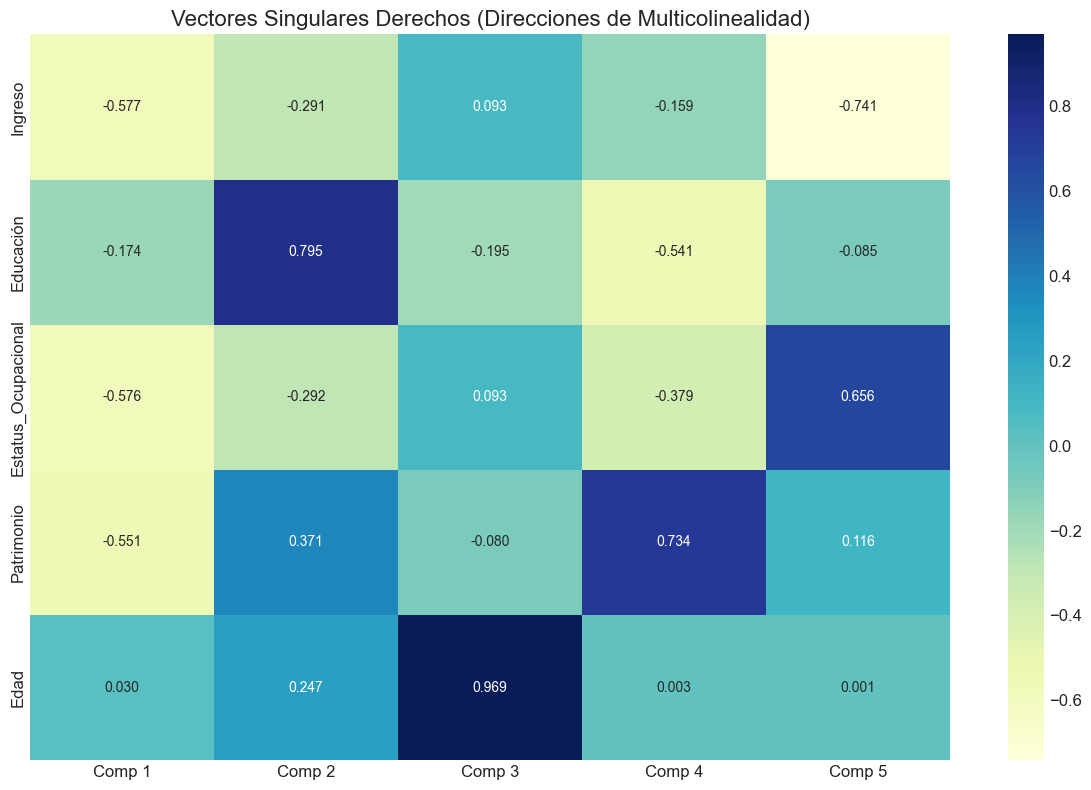

Número de condición: 45.78
Componentes que indican multicolinealidad:
Componente 4 (Valor singular: 1.7720, 0.0489 del máximo):
  Patrimonio: 0.734
  Educación: -0.541
  Estatus_Ocupacional: -0.379
  Relación lineal aproximada: -0.541 × Educación + -0.379 × Estatus_Ocupacional + 0.734 × Patrimonio ≈ 0
Componente 5 (Valor singular: 0.7912, 0.0218 del máximo):
  Ingreso: -0.741
  Estatus_Ocupacional: 0.656
  Relación lineal aproximada: -0.741 × Ingreso + 0.656 × Estatus_Ocupacional ≈ 0
CONCLUSIONES
-----------

1. Impacto en Estimación:
   - Con multicolinealidad baja, las estimaciones son cercanas a los valores reales.
   - Con multicolinealidad alta, algunos coeficientes muestran errores sustanciales.

2. Impacto en Varianza:
   - La multicolinealidad alta aumenta significativamente los errores estándar.
   - Esto se traduce en intervalos de confianza más amplios y menor poder estadístico.

3. Impacto en Estabilidad:
   - Los coeficientes son mucho más inestables con multicolinealidad 

In [13]:
# Analizar caso de multicolinealidad alta
np.random.seed(42)
resultados_alta = analizar_caso_completo(tipo_multicolinealidad='alta', 
                                        n_observaciones=500, 
                                        seed=42,
                                        n_bootstraps=200)

# Comparación directa entre casos
print("==================================================================")
print("COMPARACIÓN DIRECTA: MULTICOLINEALIDAD BAJA VS ALTA")
print("==================================================================")

# Crear tabla comparativa
comparacion = pd.DataFrame({
    'Variable': resultados_baja['coef_compare']['Variable'],
    'Error Baja (%)': resultados_baja['coef_compare']['Error (%)'],
    'Error Alta (%)': resultados_alta['coef_compare']['Error (%)'],
    'Razón Varianza Baja': resultados_baja['varianza_compare']['Razón de Varianza'],
    'Razón Varianza Alta': resultados_alta['varianza_compare']['Razón de Varianza'],
    'CV Baja (%)': resultados_baja['estabilidad']['CV (%)'],
    'CV Alta (%)': resultados_alta['estabilidad']['CV (%)']
})

print(comparacion)

# Visualizar comparación de errores
plt.figure(figsize=(12, 8))
x = np.arange(len(comparacion['Variable']))
width = 0.35

plt.bar(x - width/2, comparacion['Error Baja (%)'], width, label='Multicolinealidad Baja', color='skyblue')
plt.bar(x + width/2, comparacion['Error Alta (%)'], width, label='Multicolinealidad Alta', color='lightcoral')

plt.xlabel('Variable')
plt.ylabel('Error de Estimación (%)')
plt.title('Comparación de Errores de Estimación: Baja vs Alta Multicolinealidad')
plt.xticks(x, comparacion['Variable'], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Visualizar comparación de inflación de varianza
plt.figure(figsize=(12, 8))

plt.bar(x - width/2, comparacion['Razón Varianza Baja'], width, label='Multicolinealidad Baja', color='skyblue')
plt.bar(x + width/2, comparacion['Razón Varianza Alta'], width, label='Multicolinealidad Alta', color='lightcoral')

plt.xlabel('Variable')
plt.ylabel('Razón de Varianza')
plt.title('Comparación de Inflación de Varianza: Baja vs Alta Multicolinealidad')
plt.xticks(x, comparacion['Variable'], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Visualizar comparación de estabilidad (CV)
plt.figure(figsize=(12, 8))

plt.bar(x - width/2, comparacion['CV Baja (%)'], width, label='Multicolinealidad Baja', color='skyblue')
plt.bar(x + width/2, comparacion['CV Alta (%)'], width, label='Multicolinealidad Alta', color='lightcoral')

plt.xlabel('Variable')
plt.ylabel('Coeficiente de Variación (%)')
plt.title('Comparación de Estabilidad: Baja vs Alta Multicolinealidad')
plt.xticks(x, comparacion['Variable'], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Realizar análisis SVD para ambos casos
print("Análisis SVD - Multicolinealidad Baja:")
s_baja, U_baja, V_baja, df_valores_baja, df_vectores_baja = analizar_svd(resultados_baja['X'])

print("Análisis SVD - Multicolinealidad Alta:")
s_alta, U_alta, V_alta, df_valores_alta, df_vectores_alta = analizar_svd(resultados_alta['X'])

# Conclusiones
print("CONCLUSIONES")
print("-----------")
print("""
1. Impacto en Estimación:
   - Con multicolinealidad baja, las estimaciones son cercanas a los valores reales.
   - Con multicolinealidad alta, algunos coeficientes muestran errores sustanciales.

2. Impacto en Varianza:
   - La multicolinealidad alta aumenta significativamente los errores estándar.
   - Esto se traduce en intervalos de confianza más amplios y menor poder estadístico.

3. Impacto en Estabilidad:
   - Los coeficientes son mucho más inestables con multicolinealidad alta.
   - Pequeñas perturbaciones en los datos pueden causar grandes cambios en las estimaciones.

4. Estructura de la Multicolinealidad:
   - El análisis SVD revela claramente las direcciones de multicolinealidad.
   - En el caso de alta multicolinealidad, los últimos componentes tienen valores singulares muy pequeños.

La multicolinealidad no necesariamente afecta la capacidad predictiva del modelo como un todo,
pero compromete seriamente la inferencia sobre coeficientes individuales y la estabilidad del modelo.
""")

## Sección 5: Ejercicios Prácticos

En esta sección, se proporcionan ejercicios prácticos para aplicar los conceptos y técnicas estudiadas sobre multicolinealidad. Estos ejercicios están diseñados para fortalecer la comprensión y desarrollar habilidades en la detección y análisis de la multicolinealidad en contextos reales.

Los ejercicios siguen una secuencia de dificultad progresiva, desde la detección básica hasta análisis más avanzados.

### Ejercicio 1: Detección de Multicolinealidad en Datos de Viviendas

En este ejercicio, trabajaremos con un conjunto de datos sintético que simula datos de precios de viviendas. El objetivo es identificar la presencia y severidad de la multicolinealidad y comprender su impacto en el modelo.

#### Generación de Datos de Viviendas

In [ ]:
# Generar datos sintéticos de viviendas con multicolinealidad
np.random.seed(123)

# Número de observaciones
n = 200

# Variables independientes fundamentales
area_terreno = np.random.uniform(150, 1500, n)  # Área del terreno en m²
antiguedad = np.random.uniform(1, 50, n)  # Antigüedad en años

# Variables relacionadas (con multicolinealidad)
area_construccion = 0.7 * area_terreno + np.random.normal(0, 50, n)  # Área construida en m²
habitaciones = 0.005 * area_construccion + np.random.uniform(1, 3, n)  # Número de habitaciones
habitaciones = np.round(habitaciones)  # Redondear a número entero

# Variables adicionales
distancia_centro = np.random.uniform(1, 30, n)  # Distancia al centro en km
calidad_escuelas = 8 - 0.2 * distancia_centro + np.random.normal(0, 1, n)  # Calidad de escuelas cercanas (0-10)
calidad_escuelas = np.clip(calidad_escuelas, 0, 10)  # Limitar entre 0 y 10

# Generación de variable dependiente (precio)
precio = 50000 + 300 * area_construccion + 100 * area_terreno - 2000 * antiguedad +         15000 * habitaciones + 12000 * calidad_escuelas - 8000 * distancia_centro +         np.random.normal(0, 25000, n)

# Crear DataFrame
datos_viviendas = pd.DataFrame({
    'Precio': precio,
    'Area_Terreno': area_terreno,
    'Area_Construccion': area_construccion,
    'Antiguedad': antiguedad,
    'Habitaciones': habitaciones,
    'Distancia_Centro': distancia_centro,
    'Calidad_Escuelas': calidad_escuelas
})

# Mostrar las primeras filas
print("Datos de viviendas simulados:")
print(datos_viviendas.head())

# Estadísticas descriptivas
print("Estadísticas descriptivas:")
print(datos_viviendas.describe())

# Visualizar distribución de la variable dependiente
plt.figure(figsize=(10, 6))
sns.histplot(datos_viviendas['Precio'], kde=True)
plt.title('Distribución de Precios de Viviendas')
plt.xlabel('Precio ($)')
plt.ylabel('Frecuencia')
plt.show()

# Guardar el DataFrame para los ejercicios
# (Nota: en un entorno real, podría guardarse en un archivo o variable global)
df_viviendas = datos_viviendas.copy()

#### Instrucciones del Ejercicio 1

A continuación, realice las siguientes tareas:

1. Analice la matriz de correlación para identificar posibles problemas de multicolinealidad.
2. Calcule los Factores de Inflación de Varianza (VIF) para todas las variables independientes.
3. Determine el número de condición de la matriz de variables independientes.
4. Identifique qué variables están más afectadas por la multicolinealidad.
5. Basándose en su análisis, ¿cree que la multicolinealidad afectará significativamente el modelo? ¿Por qué?

Utilice las funciones que implementamos anteriormente para realizar este análisis.

In [ ]:
# Solución del Ejercicio 1

# Su código aquí:

# 1. Matriz de correlación
# visualizar_correlaciones(df_viviendas.drop('Precio', axis=1), umbral=0.5)

# 2. Cálculo de VIF
# vif_resultado = calcular_vif(df_viviendas.drop('Precio', axis=1))
# print(vif_resultado)

# 3. Número de condición
# numero_condicion, tabla_indices = calcular_indices_condicion(df_viviendas.drop('Precio', axis=1))
# print(f"Número de condición: {numero_condicion:.2f}")
# print("Índices de condición y proporciones de varianza:")
# print(tabla_indices)

# 4 y 5. Análisis e interpretación

# Nota: Descomente las líneas anteriores y complete el análisis

### Ejercicio 2: Efecto de la Multicolinealidad en las Estimaciones

En este ejercicio, analizaremos cómo la multicolinealidad afecta las estimaciones de los coeficientes y sus errores estándar. Utilizaremos el mismo conjunto de datos de viviendas, pero compararemos diferentes especificaciones del modelo.

#### Instrucciones del Ejercicio 2

Siga estos pasos:

1. Ajuste un modelo de regresión completo con todas las variables independientes.
2. Ajuste un modelo reducido eliminando las variables con mayor multicolinealidad (según su análisis del Ejercicio 1).
3. Compare los coeficientes, errores estándar y significancia estadística entre ambos modelos.
4. Realice un análisis de bootstrap para evaluar la estabilidad de los coeficientes en ambos modelos.
5. Concluya sobre el impacto de la multicolinealidad en las estimaciones y la inferencia estadística.

In [ ]:
# Solución del Ejercicio 2

# Su código aquí:

# 1. Modelo completo
# X_completo = df_viviendas.drop('Precio', axis=1)
# y = df_viviendas['Precio']
# X_completo_const = sm.add_constant(X_completo)
# modelo_completo = sm.OLS(y, X_completo_const).fit()
# print("Modelo completo:")
# print(modelo_completo.summary().tables[1])

# 2. Modelo reducido (eliminar variables con mayor multicolinealidad)
# Por ejemplo, si Area_Construccion tiene alta multicolinealidad con Area_Terreno:
# X_reducido = df_viviendas.drop(['Precio', 'Area_Construccion'], axis=1)
# X_reducido_const = sm.add_constant(X_reducido)
# modelo_reducido = sm.OLS(y, X_reducido_const).fit()
# print("Modelo reducido:")
# print(modelo_reducido.summary().tables[1])

# 3. Comparación de coeficientes y errores estándar

# 4. Análisis bootstrap
# Puede adaptar la función simular_inestabilidad_coeficientes() para este propósito

# 5. Conclusiones

# Nota: Descomente las líneas anteriores y complete el análisis

### Ejercicio 3: Simulación de Monte Carlo con Diferentes Niveles de Correlación

En este ejercicio más avanzado, realizaremos una simulación de Monte Carlo para estudiar sistemáticamente cómo diferentes niveles de correlación entre predictores afectan las estimaciones y la inferencia en modelos lineales.

#### Instrucciones del Ejercicio 3

1. Implemente una función que genere datos con un nivel controlado de correlación entre dos predictores.
2. Realice simulaciones para diferentes niveles de correlación: 0.0, 0.5, 0.9, 0.99.
3. Para cada nivel de correlación, genere 1000 conjuntos de datos y ajuste modelos lineales.
4. Analice cómo cambian los siguientes aspectos con el aumento de la correlación:
   - Distribución de los coeficientes estimados
   - Errores estándar
   - Tasas de rechazo de hipótesis nulas (potencia estadística)
   - Probabilidad de que los intervalos de confianza contengan el valor verdadero
5. Visualice los resultados y explique sus conclusiones.

In [ ]:
# Solución del Ejercicio 3

# Su código aquí:

# 1. Función para generar datos con correlación controlada
# def generar_datos_correlacionados(n, rho, beta_true, seed=None):
#     """
#     Genera datos con correlación controlada entre predictores.
#     
#     Parámetros:
#     -----------
#     n : int
#         Número de observaciones
#     rho : float
#         Correlación deseada entre X1 y X2 (-1 ≤ rho ≤ 1)
#     beta_true : array-like
#         Coeficientes verdaderos [beta_0, beta_1, beta_2]
#     seed : int, opcional
#         Semilla para reproducibilidad
#         
#     Retorna:
#     --------
#     tuple
#         (X, y, beta_true)
#     """
#     if seed is not None:
#         np.random.seed(seed)
#     
#     # Generar X1 y término de error para X2
#     X1 = np.random.normal(0, 1, n)
#     epsilon = np.random.normal(0, 1, n)
#     
#     # Generar X2 con la correlación deseada
#     X2 = rho * X1 + np.sqrt(1 - rho**2) * epsilon
#     
#     # Crear matriz X
#     X = np.column_stack((np.ones(n), X1, X2))
#     
#     # Generar variable dependiente
#     y = np.dot(X, beta_true) + np.random.normal(0, 1, n)
#     
#     return X, y, beta_true

# 2-4. Simulaciones para diferentes niveles de correlación
# correlaciones = [0.0, 0.5, 0.9, 0.99]
# n_sims = 1000
# n_obs = 100
# beta_true = np.array([1.0, 0.5, 0.8])
# 
# # Almacenar resultados
# resultados = {rho: {'betas': np.zeros((n_sims, 3)), 
#                    'se': np.zeros((n_sims, 3)),
#                    'pvalues': np.zeros((n_sims, 3)),
#                    'ic_contiene': np.zeros((n_sims, 3))} 
#              for rho in correlaciones}
# 
# # Ejecutar simulaciones
# np.random.seed(42)
# for rho in correlaciones:
#     for i in range(n_sims):
#         # Generar datos
#         X, y, beta = generar_datos_correlacionados(n_obs, rho, beta_true)
#         
#         # Ajustar modelo
#         modelo = sm.OLS(y, X).fit()
#         
#         # Almacenar resultados
#         resultados[rho]['betas'][i] = modelo.params
#         resultados[rho]['se'][i] = modelo.bse
#         resultados[rho]['pvalues'][i] = modelo.pvalues
#         
#         # Verificar si IC contiene el valor verdadero
#         ic_inf, ic_sup = modelo.conf_int().T
#         resultados[rho]['ic_contiene'][i] = (ic_inf <= beta_true) & (beta_true <= ic_sup)

# 5. Visualización y análisis de resultados

# Nota: Descomente y complete el código

## Sección 6: Conclusiones y Resumen

En este taller hemos explorado en profundidad el fenómeno de la multicolinealidad en modelos lineales, desde sus fundamentos teóricos hasta su implementación computacional y análisis práctico.

### Resumen de Conceptos Clave

1. **Definición y Causas de la Multicolinealidad**
   - Relación lineal aproximada entre variables predictoras
   - Puede ser estructural, por muestreo, o inherente a ciertos tipos de datos
   - Se manifiesta algebraicamente como valores singulares o propios cercanos a cero

2. **Efectos de la Multicolinealidad**
   - Inflación de la varianza de los estimadores
   - Estimaciones inestables y sensibles a pequeños cambios en los datos
   - Dificultad para interpretar coeficientes individuales
   - Problemas numéricos en la estimación

3. **Diagnóstico de Multicolinealidad**
   - Factor de Inflación de Varianza (VIF)
   - Número de condición e índices de condición
   - Análisis mediante SVD
   - Correlaciones bivariadas como primera aproximación

4. **Impacto en la Inferencia Estadística**
   - Intervalos de confianza más amplios
   - Menor poder estadístico
   - Posible inconsistencia entre significancia individual y conjunta

5. **Casos Especiales de Multicolinealidad**
   - Trampa de variables dummy
   - Términos polinomiales y de interacción
   - Tendencias compartidas en series temporales

### Lo que Viene en el Próximo Taller

En el Taller 2, exploraremos soluciones a la multicolinealidad, incluyendo:

1. **Transformaciones de Variables**
   - Centrado y estandarización
   - Ortogonalización

2. **Métodos de Regularización**
   - Ridge Regression
   - Lasso
   - Elastic Net

3. **Selección y Eliminación de Variables**
   - Métodos basados en VIF
   - Selección paso a paso (stepwise)
   - Criterios de información

4. **Reducción de Dimensionalidad**
   - Regresión en componentes principales
   - Mínimos cuadrados parciales

### Conclusiones Generales

La multicolinealidad es un desafío común en el modelado estadístico que puede comprometer seriamente la interpretación y estabilidad de los modelos. Un diagnóstico adecuado es el primer paso para abordar este problema.

Aunque la multicolinealidad no necesariamente afecta la capacidad predictiva global del modelo dentro del rango de los datos observados, sí compromete la inferencia sobre coeficientes individuales y hace que las extrapolaciones sean particularmente riesgosas.

El análisis cuidadoso de la estructura de multicolinealidad mediante SVD y otras técnicas proporciona información valiosa sobre qué variables o combinaciones de variables están causando el problema, lo que guía la selección de estrategias de mitigación adecuadas.

## Sección 7: Referencias y Recursos Adicionales

### Referencias Académicas

1. Belsley, D. A., Kuh, E., & Welsch, R. E. (1980). *Regression Diagnostics: Identifying Influential Data and Sources of Collinearity*. John Wiley & Sons.

2. Farrar, D. E., & Glauber, R. R. (1967). "Multicollinearity in Regression Analysis: The Problem Revisited." *The Review of Economics and Statistics*, 49(1), 92-107.

3. Marquardt, D. W. (1970). "Generalized Inverses, Ridge Regression, Biased Linear Estimation, and Nonlinear Estimation." *Technometrics*, 12(3), 591-612.

4. O'Brien, R. M. (2007). "A Caution Regarding Rules of Thumb for Variance Inflation Factors." *Quality & Quantity*, 41(5), 673-690.

5. Stewart, G. W. (1987). "Collinearity and Least Squares Regression." *Statistical Science*, 2(1), 68-84.

### Recursos en Línea

1. [Multicolinealidad en Wikipedia](https://es.wikipedia.org/wiki/Multicolinealidad) - Introducción general al concepto.

2. [Statistical Learning with Sparsity](https://web.stanford.edu/~hastie/StatLearnSparsity/) - Libro de Hastie, Tibshirani y Wainwright sobre métodos de regularización.

3. [Penalized Regression Methods (tutorial)](https://www.datacamp.com/community/tutorials/tutorial-ridge-lasso-elastic-net) - Tutorial práctico sobre métodos de regularización.

4. [Variance Inflation Factor (VIF) Explanation](https://statisticsbyjim.com/regression/variance-inflation-factors/) - Blog explicando el VIF en detalle.

5. [Ames Housing Dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) - Conjunto de datos real con multicolinealidad para práctica adicional.

### Bibliotecas Python para Análisis de Multicolinealidad

1. **statsmodels** - Proporciona funciones para diagnóstico de regresión, incluyendo VIF.
   ```python
   from statsmodels.stats.outliers_influence import variance_inflation_factor
   ```

2. **sklearn.linear_model** - Implementa varios métodos de regularización.
   ```python
   from sklearn.linear_model import Ridge, Lasso, ElasticNet
   ```

3. **yellowbrick** - Visualizadores para diagnóstico de regresión.
   ```python
   from yellowbrick.regressor import ResidualsPlot, PredictionError, AlphaSelection
   ```

4. **scipy.linalg** - Funciones para descomposición SVD y análisis de condicionamiento.
   ```python
   from scipy.linalg import svd, svdvals, condition
   ```

### Software Estadístico Alternativo

1. **R** - El paquete `car` proporciona excelentes herramientas para diagnóstico de multicolinealidad.

2. **Stata** - Ofrece comandos como `collin` y `vif` para análisis de multicolinealidad.

3. **SPSS** - Incluye diagnósticos de colinealidad en su procedimiento de regresión.

4. **SAS** - Proporciona diagnósticos completos a través de PROC REG con la opción COLLIN.